# **Saving At-Risk Buyers: Machine Learning Approach to Reduce Churn in E-Commerce**
**Data Scientist: Ahmad Faik Setiawan**
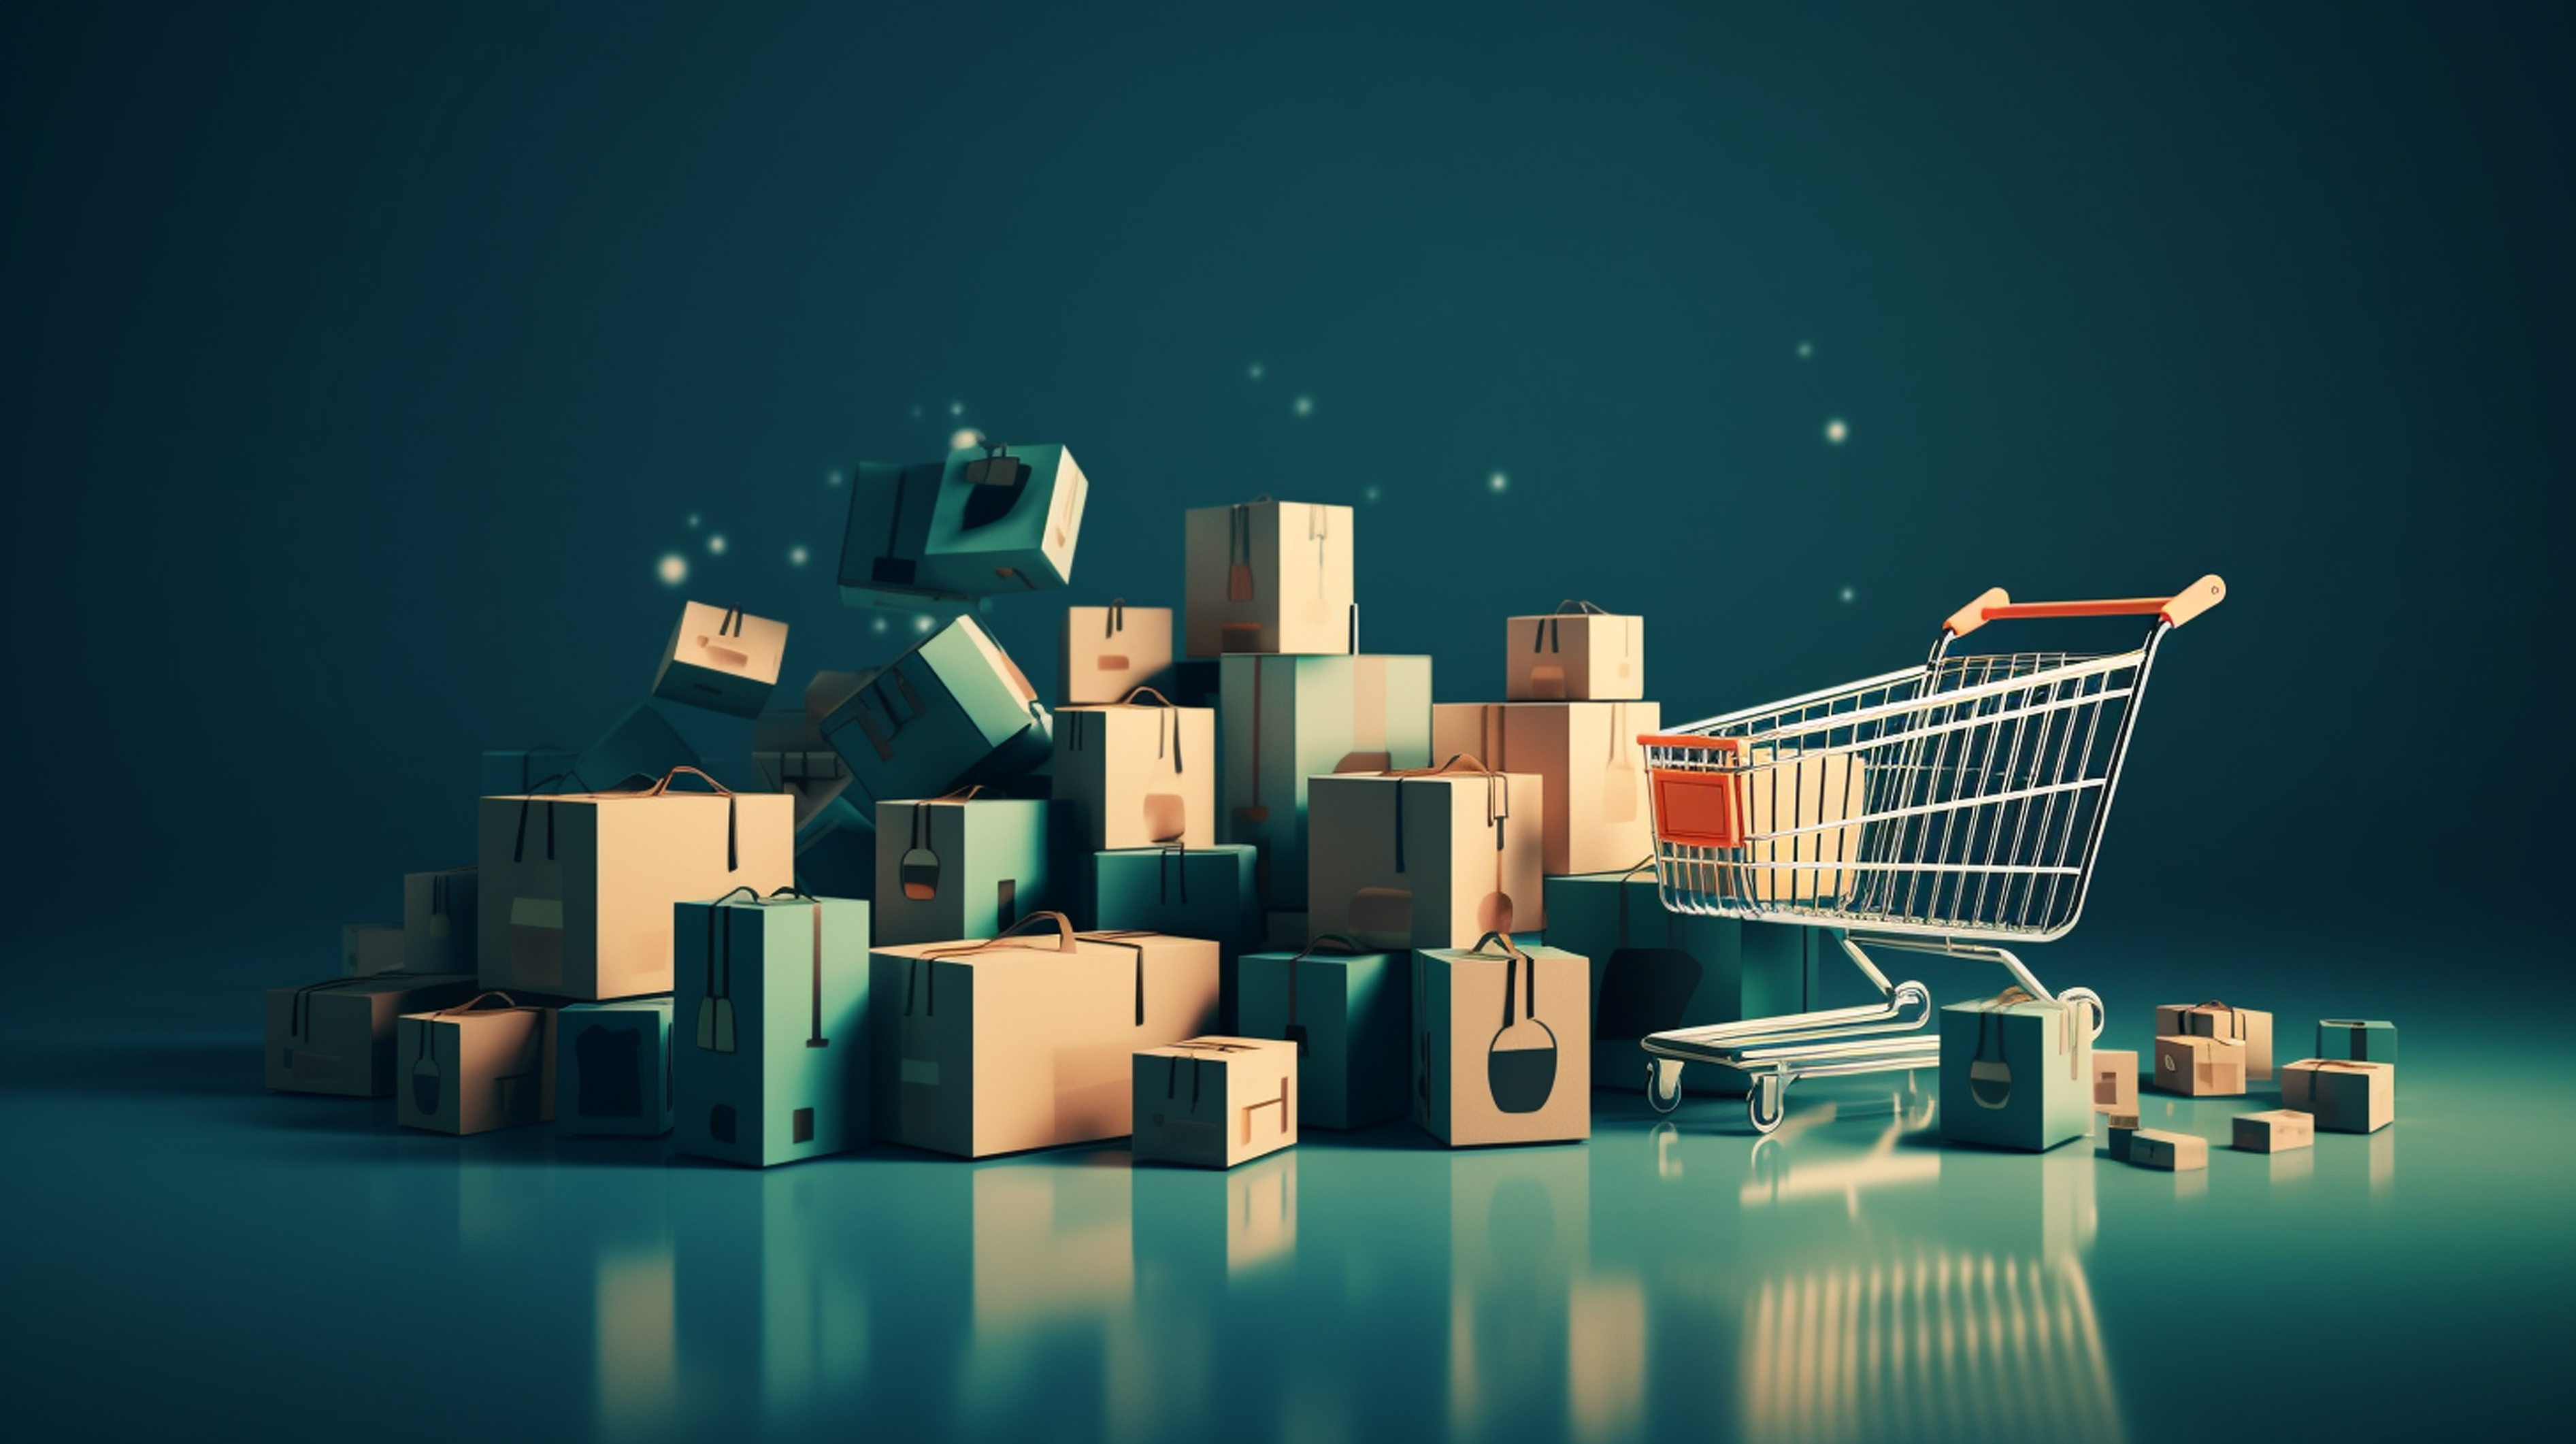

## I. Backgorund Context
In real e-commerce environments, a large portion of customers make their first purchases during flash sales, voucher campaigns, or free shipping promotions. However, many of these customers don’t return once the promotion ends, causing transaction volume to decline despite high acquisition traffic.

At the same time:
- Customer Acquisition Cost (CAC) keeps increasing, driven by paid ads, affiliate incentives, and marketplace promo fees.
- Competitors offer massively competitive pricing, vouchers, and fast delivery.
- As a result, e-commerce platforms often lose customers faster than they acquire new ones.

To remain profitable, companies must shift focus from acquiring more customers, to retaining the customers they already have—and this requires early churn detection powered by machine learning.

**Resources** :
* [Customer Retention Versus Customer Acquisition](https://www.forbes.com/councils/forbesbusinesscouncil/2022/12/12/customer-retention-versus-customer-acquisition)
* [Zero Defections: Quality Comes to Services](https://hbr.org/1990/09/zero-defections-quality-comes-to-services)

## II. Problem Statement
Without a churn prediction model, real e-commerce companies typically face:
- **No visibility on churn risk**
Marketing teams cannot identify customers who are about to stop buying.
- **Retention spend becomes wasteful**
Blanket promotions are given to all users—even those who would purchase anyway.
- **Churn strikes silently**

  Many customers disappear after:
  - The first promo expires
  - Delivery issues occur
  - Prices become less competitive
  - They switch to another marketplace

This leads to:
- Lower revenue
- Lower repeat rate
- Shorter customer lifetime value (CLV)
- Higher dependency on aggressive promotions

To break this cycle, the business needs a model that can **predict churn at the user level and trigger targeted retention actions before it happens.**

## III. Project Objectives
- **Predict which customers are likely to churn**, based on real behavioral signals such as order frequency, last purchase date, promo usage, product category preferences, and delivery experience.
- **Prioritize customers for retention campaigns**, ensuring promo budgets are spent on users who actually need them.
- **Increase repeat purchase rate and CLV**, especially among promo-sensitive and first-time buyers.
- **Provide actionable insights to stakeholders**, such as:
    - Which behavior changes signal churn risk?
    - Which segments need intervention?
    - What business levers can reduce churn effectively?

## IV. Analytical Approach
Multiple classification models will be trained to predict churn. The models will be evaluated using F2-score, which prioritizes recall to identify customers who are most likely to churn. Feature importance will guide strategic recommendations for targeted retention efforts.

## V. Metric Evaluation
| Actual \ Predicted | Predicted: Not Churn (0) | Predicted: Churn (1) |
| --- | --- | --- |
| Actual: Not Churn (0) | **True Negative (TN)**  Model predicts the customer will stay, and they do              | **False Positive (FP)**  Model predicts churn, but the customer actually stays |
| Actual: Churn (1)     | **False Negative (FN)**  Model predicts the customer will stay, but they actually churn | **True Positive (TP)** Model correctly predicts churn |

**Type 1 Error: False Positive (FP)**
**Meaning:**
The system predicts a customer **will churn**, but they actually continue buying and remain active.

**Business Impact in Real E-Commerce:**
- The company **spends marketing budget unnecessarily**, for example:
    - Sending special vouchers or retention discounts,
    - Triggering retargeting ads,
    - Prioritizing CRM workflows that were not needed.
- Lower campaign efficiency and reduced marketing ROI.
- Higher retention operating cost without improving revenue lift.

**Example Real Scenario:**
- A loyal monthly shopper receives a “We miss you, here’s a voucher” campaign—even though they were already planning to buy.
- Discounts and campaign spend are wasted on users who would have purchased anyway.

**Type 2 Error: False Negative (FN)**
**Meaning:**
The system predicts that a customer will **continue purchasing**, but in reality, the customer **stops buying and churns**.

**Business Impact in Real E-Commerce:**
- The company misses the opportunity to take retention action, such as:
    - Promo incentives,
    - App notification triggers,
    - Email or CRM lifecycle campaigns.
- Customer stops purchasing and revenue is lost.
- Customer acquisition cost (CAC) increases because new users must be acquired to replace lost ones.
- Revenue leakage goes unnoticed since the customer disappears silently.

**Example Real Scenario:**
- A user makes purchases during promo season, then lapses after the promotion ends.
- The model fails to flag them as “at risk,” so no intervention is triggered—and the customer moves to a competing marketplace (Shopee, Tokopedia, Lazada, TikTok Shop, etc.).

In this project, **false negative are considered the most dangerous**. Given these consequences, the model should focus on **minimizing false negative**. In other words, it’s more important to correctly **identify customers who are likely to churn**, even at the risk of a few false positive. Therefore, the primary metric for model evaluation is the **F2-Score**, which gives more weight to **recall** than **precision**.

## VI. Stakeholders
**Customer Marketing & CRM Team**

The Customer Marketing Team is the key stakeholder in this project, as they are directly responsible for developing and implementing strategic marketing plans to drive customer engagement and loyalty. This project empowers them to identify and target high-risk customers more precisely, reducing wasted marketing spend and improving the effectiveness of retention efforts.

### Import Libraries and Modules

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import sys
import warnings
import time

# Ignore Warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Display Settings
pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from IPython.display import display, Markdown
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Statistical Analysis
import scipy.stats as stats
from scipy.stats import chi2_contingency, mannwhitneyu

# Preprocessing & Encoding
from sklearn.experimental import enable_iterative_imputer  # Needed before using IterativeImputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import (
    OneHotEncoder, OrdinalEncoder, RobustScaler, FunctionTransformer
)
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline

# Feature Selection
from sklearn.feature_selection import (
    SelectKBest, SelectPercentile, SelectFromModel, f_classif
)


# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Model Selection & Evaluation
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_val_score, cross_validate,
    GridSearchCV, RandomizedSearchCV
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    fbeta_score, roc_curve, roc_auc_score, confusion_matrix,
    classification_report, make_scorer
)


# Imbalanced Learning
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler


# Hyperparameter Tuning Support
from scipy.stats import randint, uniform

#Save Model
import pickle

#Import streamlit
import streamlit as st

### Load Dataset

In [2]:
df = pd.read_csv("E_Comm.csv")
print(f"The number of rows and columns in dataset df is {df.shape[0]} rows and {df.shape[1]} columns")
display(df.head())

The number of rows and columns in dataset df is 5630 rows and 20 columns


CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

## Data Understanding
Data source : [Ecommerce Customer Churn Analysis and Prediction](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction)
#### Attribute Information
| **Attribute**                   | **Data Type** | **Description**                                                                |
|---------------------------------|---------------|--------------------------------------------------------------------------------|
| **CustomerID**                  | int64         | Unique identifier for each customer                                            |
| **Churn**                       | int64         | Indicates whether the customer has churned (1) or not (0)                      |
| **Tenure**                      | float64       | Duration (in months) the customer has been with the company           |
| **PreferredLoginDevice**        | object        | Device most frequently used by the customer to log in                          |
| **CityTier**                    | int64         | Tier classification of the customer's city                                     |
| **WarehouseToHome**             | float64       | Distance between the warehouse and the customer's home                         |
| **PreferredPaymentMode**        | object        | Customer's most preferred method of payment                                    |
| **Gender**                      | object        | Gender of the customer                                                         |
| **HourSpendOnApp**              | float64       | Number of hours the customer spends on the mobile app                          |
| **NumberOfDeviceRegistered**    | int64         | Total number of devices registered by the customer                             |
| **PreferedOrderCat**            | object        | Most frequently ordered product category                                       |
| **SatisfactionScore**           | int64         | Customer satisfaction score based on feedback                                  |
| **MaritalStatus**               | object        | Marital status of the customer                                                 |
| **NumberOfAddress**             | int64         | Total number of addresses added by the customer                                |
| **Complain**                    | int64         | Indicates whether the customer raised a complaint last month (1 = Yes, 0 = No) |
| **OrderAmountHikeFromlastYear** | float64       | Percentage increase in order amount compared to last year                      |
| **CouponUsed**                  | float64       | Number of coupons used in the last month                                       |
| **OrderCount**                  | float64       | Total number of orders placed in the last month                                |
| **DaySinceLastOrder**           | float64       | Number of days since the last order was placed                                 |
| **CashbackAmount**              | float64       | Average cashback received by the customer in last month                        |

In [3]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

Next, the columns in the DataFrame are grouped by similar types of information. This helps make the data easier to read and understand, and also makes the analysis process more efficient.

1. Customer Demographics
   These describe who the customer is : `CustomerID`, `CityTier`, `WarehouseToHome`, `Gender`, `NumberOfDeviceRegistered`, `MaritalStatus`,       `NumberOfAddress`.
2. Customer Behaviour/ App usage
   These describe how the customer interacts with the app : `PreferredLoginDevice`, `PreferredPaymentMode`, `PreferedOrderCat`, `HourSpendOnApp`, `Tenure`.
3. Customer Purchase History
   These reflect purchase patterns and order history : `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder`, `CashbackAmount`.
4. Customer Feedback/ Satisfaction
   These reflect the customer’s opinion, experience, and level of satisfaction with the service or product : `SatisfactionScore`, `Complain`.
5. Target Variable
   This reflect hether a customer has stopped using the service or remained active : `Churn`

#### Univariate Distribution Check for Quantitative Features

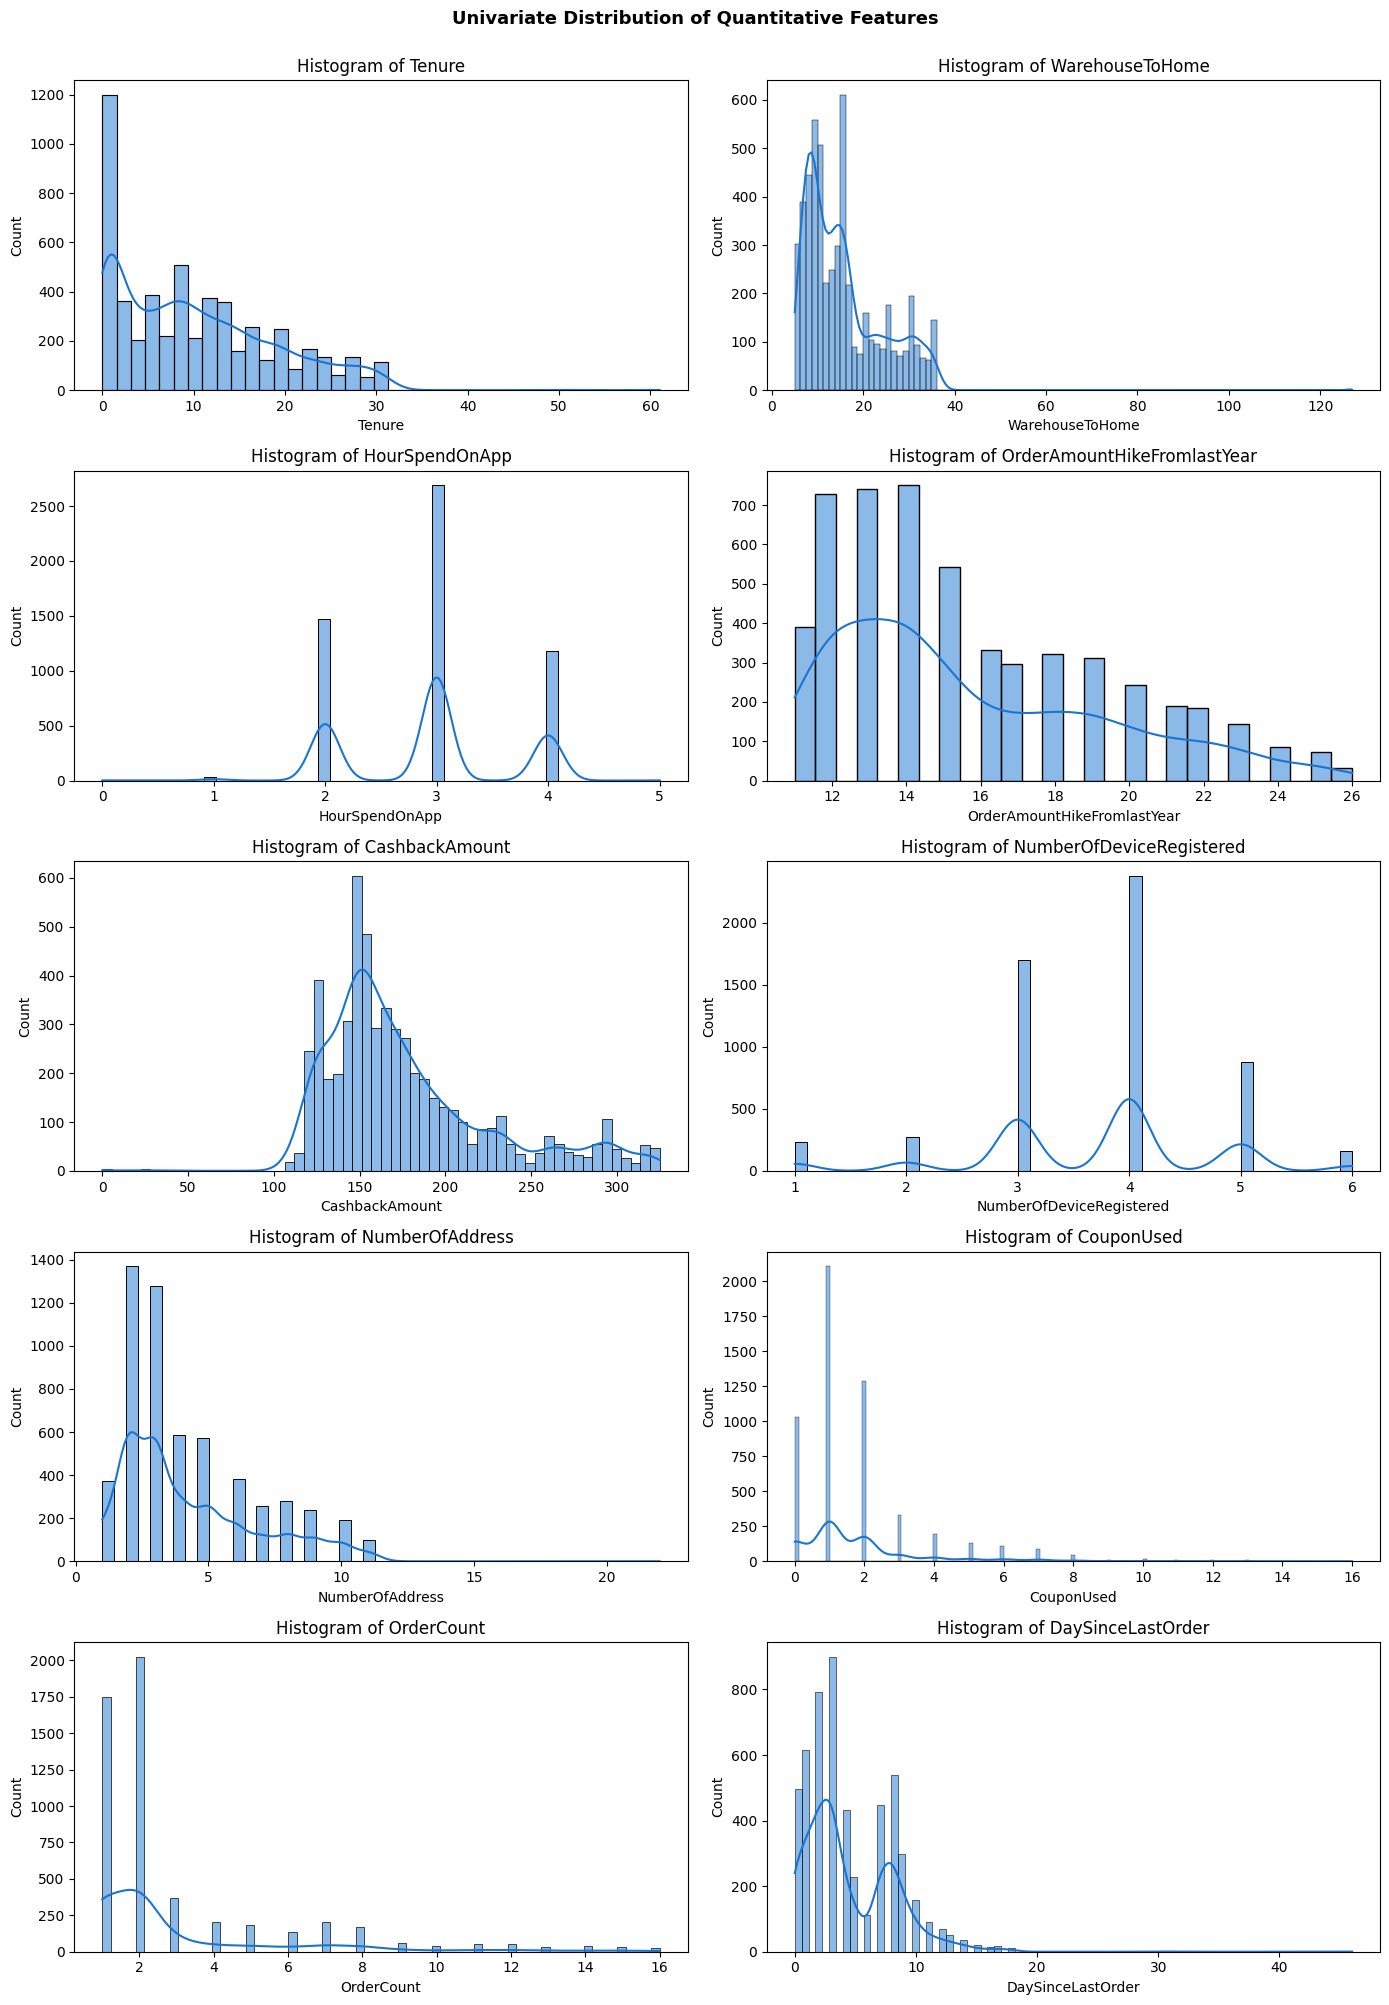

In [4]:
quantitative_features = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
    'OrderAmountHikeFromlastYear', 'CashbackAmount',
    'NumberOfDeviceRegistered', 'NumberOfAddress',
    'CouponUsed', 'OrderCount', 'DaySinceLastOrder'
]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
fig.suptitle('Univariate Distribution of Quantitative Features', fontsize=13, fontweight='bold', y=1.0)
axes = axes.flatten()  

for i, col in enumerate(quantitative_features):
    sns.histplot(df[col], kde=True, ax=axes[i], color= '#1974D2')
    axes[i].set_title(f'Histogram of {col}')  
    axes[i].set_xlabel(col)  
    axes[i].set_ylabel("Count")  

plt.tight_layout()  
plt.show()  

Most of the visual distributions observed in the dataset are **not normally distributed**. Many features exhibit skewed patterns, particularly right-skewed distributions, where the data has a long tail toward higher values. This suggests the need for further statistical normality tests to validate the distribution shape before applying parametric methods or models that assume normality.

#### Univariate Distribution Check for Qualitative Features

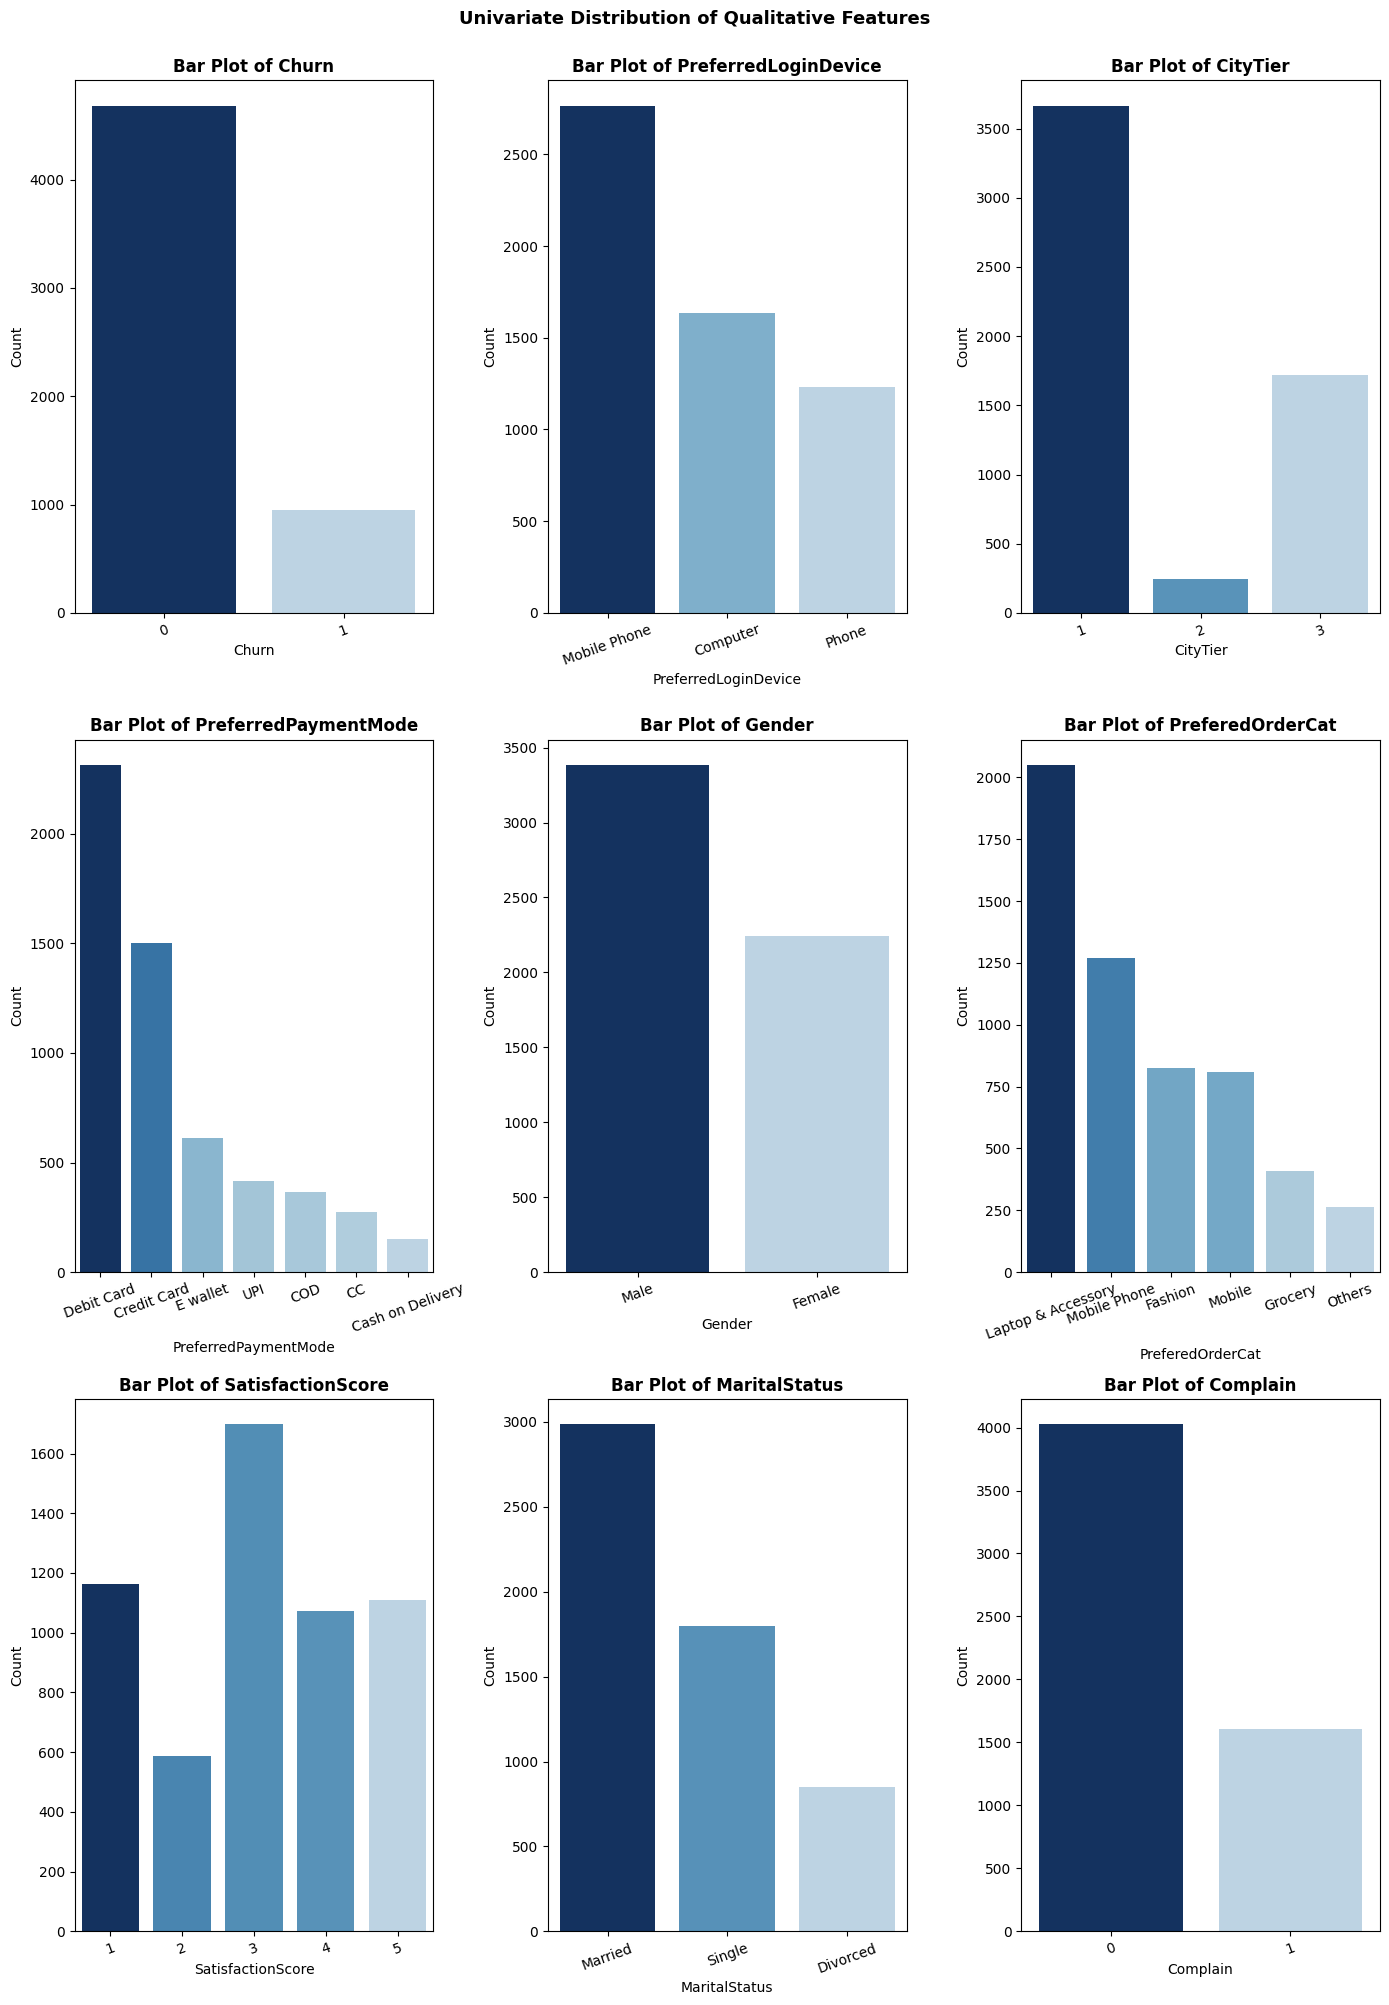

In [5]:
categorical_features = [
    'Churn',
    'PreferredLoginDevice',
    'CityTier',
    'PreferredPaymentMode',
    'Gender',
    'PreferedOrderCat',
    'SatisfactionScore',
    'MaritalStatus',
    'Complain'
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 20))
fig.suptitle('Univariate Distribution of Qualitative Features', fontsize=13, fontweight='bold', y=1.0)
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    counts = df[col].value_counts()

    norm = (counts - counts.min()) / (counts.max() - counts.min() + 1e-9)

    norm = 0.3 + 0.7 * norm   # 0.3 → 1.0

    cmap = plt.cm.Blues
    bar_colors = cmap(norm)

    ax = axes[i]
    sns.barplot(
        x=counts.index,
        y=counts.values,
        ax=ax,
        palette=bar_colors
    )

    ax.set_title(f'Bar Plot of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

From the bar plots above, we can observe the distribution of categories within each categorical feature. It allows us to identify dominant classes, detect imbalances, and understand how each feature is spread across the dataset.

### Data preprocessing
Data preprocessing is the process of cleaning, transforming, and organizing raw data into a usable format before applying machine learning models or conducting analysis.

#### Handling Data Duplicates

In [6]:
df.duplicated().sum()

0

There are no duplicate rows in dataset.

#### Missing Value

In [7]:
(df.isna().sum() / df.shape[0] * 100).round(2).astype(str) + '%'

CustomerID                      0.0%
Churn                           0.0%
Tenure                         4.69%
PreferredLoginDevice            0.0%
CityTier                        0.0%
WarehouseToHome                4.46%
PreferredPaymentMode            0.0%
Gender                          0.0%
HourSpendOnApp                 4.53%
NumberOfDeviceRegistered        0.0%
PreferedOrderCat                0.0%
SatisfactionScore               0.0%
MaritalStatus                   0.0%
NumberOfAddress                 0.0%
Complain                        0.0%
OrderAmountHikeFromlastYear    4.71%
CouponUsed                     4.55%
OrderCount                     4.58%
DaySinceLastOrder              5.45%
CashbackAmount                  0.0%
dtype: object

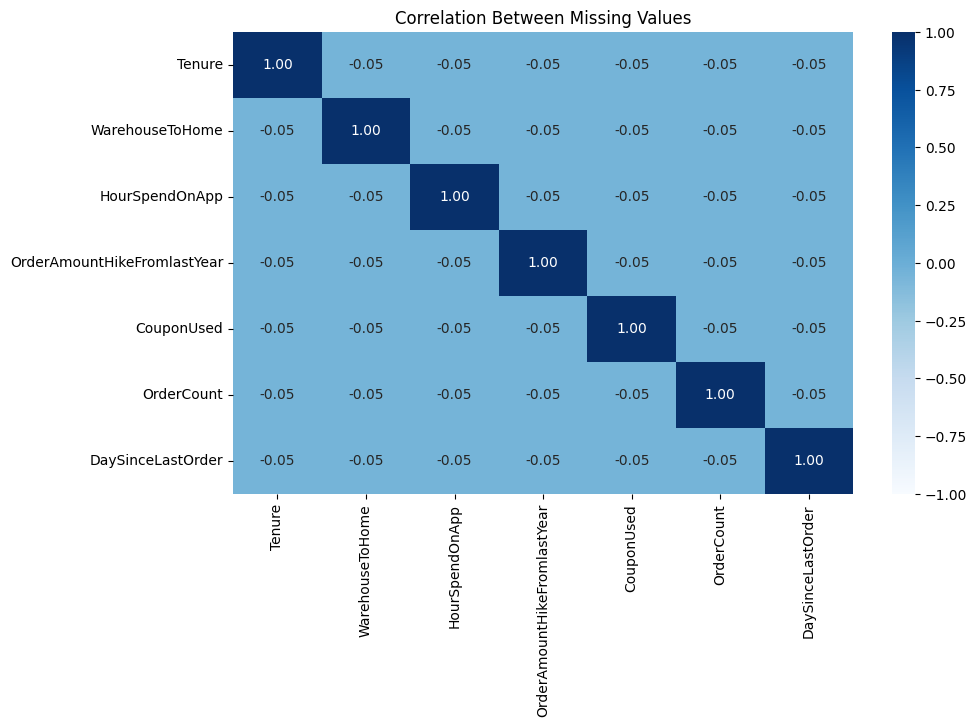

In [8]:
cols_with_missing = df.columns[df.isna().any()]

missing_df = df[cols_with_missing].isna().astype(int)

missing_corr = missing_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    missing_corr,
    annot=True,
    cmap='Blues',   
    fmt=".2f",
    vmin=-1,
    vmax=1
)
plt.title("Correlation Between Missing Values")
plt.show()

All features with missing value have correlation values -0.05. Their missingness is independent of other columns.

#### Casting Data Types

#### Categorization of Dataset Attributes by Data Type
| **Attribute**                   | **Statistical Type**      | **Explanation**                                                   |
| ------------------------------- | ------------------------- | ----------------------------------------------------------------- |
| **CustomerID**                  | Qualitative – Nominal     | Unique identifier, carries no numerical or ordinal meaning        |
| **Churn**                       | Qualitative – Nominal     | Binary category (1 = churned, 0 = not churned)      |
| **Tenure**                      | Quantitative – Continuous | Duration measured in time, can be fractional (e.g., 12.5 months)  |
| **PreferredLoginDevice**        | Qualitative – Nominal     | Device types like Mobile/Desktop, no inherent order               |
| **CityTier**                    | Qualitative – Ordinal     | City classification with inherent ranking (e.g., Tier 1 > Tier 3) |
| **WarehouseToHome**             | Quantitative – Continuous | Distance, measurable and can include decimals                     |
| **PreferredPaymentMode**        | Qualitative – Nominal     | Categories like Card, COD, etc., there are no ranking             |
| **Gender**                      | Qualitative – Nominal     | Categories (Male, Female), not ordered                            |
| **HourSpendOnApp**              | Quantitative – Continuous | Time in hours, can be fractional                                  |
| **NumberOfDeviceRegistered**    | Quantitative – Discrete   | Count of devices, whole numbers only                              |
| **PreferedOrderCat**            | Qualitative – Nominal     | Product category preference, no meaningful order                  |
| **SatisfactionScore**           | Qualitative – Ordinal     | Rating scale, ordered values (e.g., 1 to 5)                       |
| **MaritalStatus**               | Qualitative – Nominal     | Categories (Single, Married, etc.), no ranking                    |
| **NumberOfAddress**             | Quantitative – Discrete   | Count of addresses, integers only                                 |
| **Complain**                    | Qualitative – Nominal     | Binary indicator (1 = yes, 0 = no), no ordinal meaning            |
| **OrderAmountHikeFromlastYear** | Quantitative – Continuous | Percentage change, measurable and fractional                      |
| **CouponUsed**                  | Quantitative – Discrete   | Count of coupons used, integers only                              |
| **OrderCount**                  | Quantitative – Discrete   | Number of orders placed, count data                               |
| **DaySinceLastOrder**           | Quantitative – Discrete   | Number of days since last order, integers only                    |
| **CashbackAmount**              | Quantitative – Continuous | Average cashback, decimal values possible                         |

In [9]:
df['CustomerID'] = df['CustomerID'].astype(str)
df['Churn'] = df['Churn'].astype(str)
df['CityTier'] = df['CityTier'].astype(str)
df['Complain'] = df['Complain'].astype(str)
df['SatisfactionScore'] = df['SatisfactionScore'].astype(str)

- Although CustomerID is stored as a numeric type, it represents a unique identifier rather than a value for mathematical operations
- 'Churn' typically indicates whether a customer has left (Yes/No or 1/0). It's a categorical target variable, so convert it to 'category' type.
- Convert 'CityTier' to category because it represents discrete levels or segments (e.g., Tier 1, 2, 3)
- Convert 'Complain' to category, since it represents categories, not quantities.
- Convert 'SatisfactionScore' to category since it represents ordinal ratings (e.g., 1 to 5)

In [10]:
df.dtypes

CustomerID                      object
Churn                           object
Tenure                         float64
PreferredLoginDevice            object
CityTier                        object
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore               object
MaritalStatus                   object
NumberOfAddress                  int64
Complain                        object
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

#### Handling Inconsistent Variable

Inspect the unique values to detect inconsistencies.

In [11]:
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

In [12]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Phone': 'Mobile Phone'})

In [13]:
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64

In `PreferredLoginDevice` column, there were two labels that likely referred to the same category:

* **Mobile Phone** 
* **Phone** (likely meant to be the same as "Mobile Phone")

To ensure consistency, replaced **Phone** with **Mobile Phone**:

This operation merges the inconsistent label into a standardized one. After this step, `Mobile Phone` now includes all users who were previously labeled as **Phone**.

In [14]:
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [15]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'COD': 'Cash on Delivery'})
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'CC': 'Credit Card'})

In [16]:
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64

In the `PreferredPaymentMode` column, there were some labels that likely referred to the same category:

* **Cash on Delivery** 
* **COD** (likely meant to be the same as **Cash on Delivery**)

To ensure consistency, replaced **COD** with **Cash on Delivery**:

* **Credit Card**
* **CC** (likely meant to be the same as "Credit Card")

To ensure consistency, **CC** will be replace with **Credit Card**

In [17]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

In [18]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile': 'Mobile Phone'})

In [19]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64

In the `PreferedOrderCat` column, there were two labels that likely referred to the same category:

* **Mobile Phone**
* **Mobile** (likely meant to be the same as **Mobile Phone**)

To ensure consistency, **Mobile** will be replace with **Mobile Phone**. This operation merges the inconsistent label into a standardized one. After this step, **Mobile Phone** now includes all users who were previously labeled as **Mobile**.

#### Handling Outlier


Column: Tenure
Outlier: 4


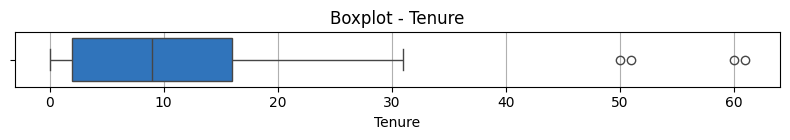


Column: WarehouseToHome
Outlier: 2


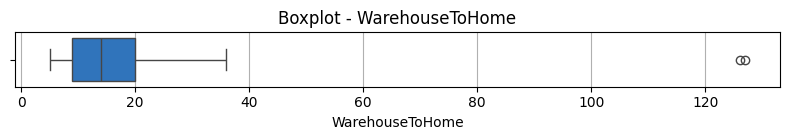


Column: HourSpendOnApp
Outlier: 6


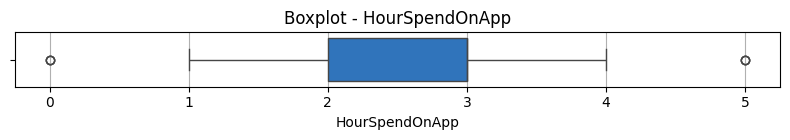


Column: NumberOfDeviceRegistered
Outlier: 397


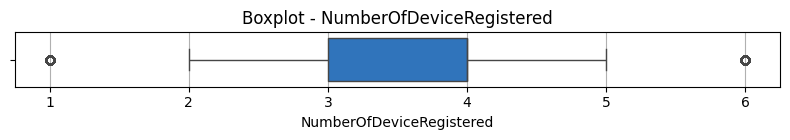


Column: NumberOfAddress
Outlier: 4


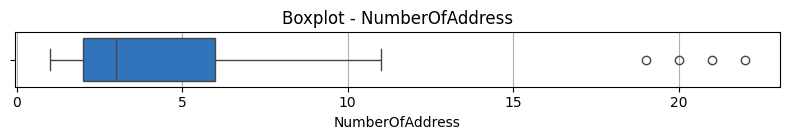


Column: OrderAmountHikeFromlastYear
Outlier: 33


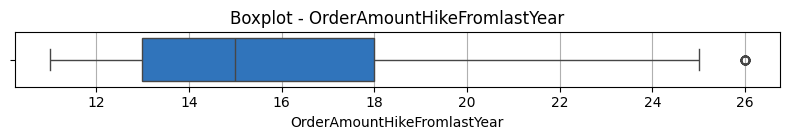


Column: CouponUsed
Outlier: 629


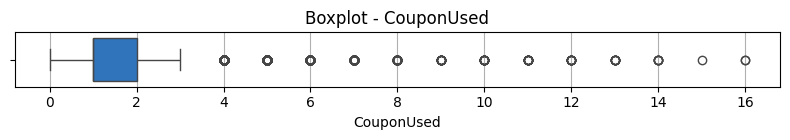


Column: OrderCount
Outlier: 703


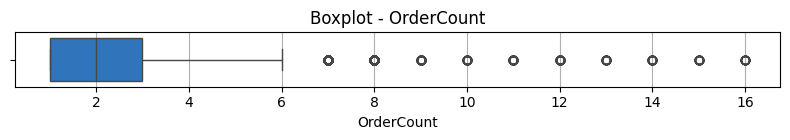


Column: DaySinceLastOrder
Outlier: 62


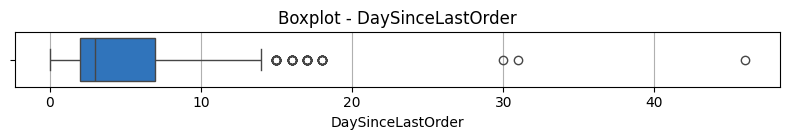


Column: CashbackAmount
Outlier: 438


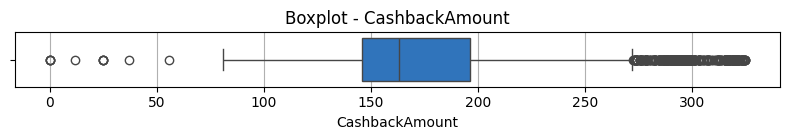

In [20]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nColumn: {col}")
    print(f"Outlier: {len(outliers)}")
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(data=df, x=col, color="#1974D2")
    plt.title(f"Boxplot - {col}")
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()

The outliers are still close to the boxplot line or may reflect important customer behavior, so they are kept.

#### Create New Column

In [21]:
df['CountOfAddress'] = pd.qcut(df['NumberOfAddress'], q=4)
df.head()

CustomerID Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
0      50001     1     4.0         Mobile Phone        3              6.0   
1      50002     1     NaN         Mobile Phone        1              8.0   
2      50003     1     NaN         Mobile Phone        1             30.0   
3      50004     1     0.0         Mobile Phone        3             15.0   
4      50005     1     0.0         Mobile Phone        1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4          Credit Card    Male             NaN                         3   

     PreferedOrderCat SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                 2        Single                9   
1        Mobile Phone                 3        Single                7   
2        Mobile Phone                 3        Single                6   
3  Laptop & Accessory                 5        Single                8   
4        Mobile Phone                 5        Single                3   

  Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0        1                         11.0         1.0         1.0   
1        1                         15.0         0.0         1.0   
2        1                         14.0         0.0         1.0   
3        0                         23.0         0.0         1.0   
4        0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount CountOfAddress  
0                5.0          159.93    (6.0, 22.0]  
1                0.0          120.90    (6.0, 22.0]  
2                3.0          120.28     (3.0, 6.0]  
3                3.0          134.07    (6.0, 22.0]  
4                3.0          129.60     (2.0, 3.0]

This makes it easier to visualize and compare patterns in a more understandable way.

In [22]:
df['CountOfAddress'].unique()

[(6.0, 22.0], (3.0, 6.0], (2.0, 3.0], (0.999, 2.0]]
Categories (4, interval[float64, right]): [(0.999, 2.0] < (2.0, 3.0] < (3.0, 6.0] < (6.0, 22.0]]

In [23]:
interval_to_label = {
    pd.Interval(0.999, 2.0, closed='right'): '1–2',
    pd.Interval(2.0, 3.0, closed='right'): '3',
    pd.Interval(3.0, 6.0, closed='right'): '4–6',
    pd.Interval(6.0, 22.0, closed='right'): '7+'
}

df['CountOfAddress'] = df['CountOfAddress'].map(interval_to_label)
df

CustomerID Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
0         50001     1     4.0         Mobile Phone        3              6.0   
1         50002     1     NaN         Mobile Phone        1              8.0   
2         50003     1     NaN         Mobile Phone        1             30.0   
3         50004     1     0.0         Mobile Phone        3             15.0   
4         50005     1     0.0         Mobile Phone        1             12.0   
...         ...   ...     ...                  ...      ...              ...   
5625      55626     0    10.0             Computer        1             30.0   
5626      55627     0    13.0         Mobile Phone        1             13.0   
5627      55628     0     1.0         Mobile Phone        1             11.0   
5628      55629     0    23.0             Computer        3              9.0   
5629      55630     0     8.0         Mobile Phone        1             15.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0              Debit Card  Female             3.0                         3   
1                     UPI    Male             3.0                         4   
2              Debit Card    Male             2.0                         4   
3              Debit Card    Male             2.0                         4   
4             Credit Card    Male             NaN                         3   
...                   ...     ...             ...                       ...   
5625          Credit Card    Male             3.0                         2   
5626          Credit Card    Male             3.0                         5   
5627           Debit Card    Male             3.0                         2   
5628          Credit Card    Male             4.0                         5   
5629          Credit Card    Male             3.0                         2   

        PreferedOrderCat SatisfactionScore MaritalStatus  NumberOfAddress  \
0     Laptop & Accessory                 2        Single                9   
1           Mobile Phone                 3        Single                7   
2           Mobile Phone                 3        Single                6   
3     Laptop & Accessory                 5        Single                8   
4           Mobile Phone                 5        Single                3   
...                  ...               ...           ...              ...   
5625  Laptop & Accessory                 1       Married                6   
5626             Fashion                 5       Married                6   
5627  Laptop & Accessory                 4       Married                3   
5628  Laptop & Accessory                 4       Married                4   
5629  Laptop & Accessory                 3       Married                4   

     Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0           1                         11.0         1.0         1.0   
1           1                         15.0         0.0         1.0   
2           1                         14.0         0.0         1.0   
3           0                         23.0         0.0         1.0   
4           0                         11.0         1.0         1.0   
...       ...                          ...         ...         ...   
5625        0                         18.0         1.0         2.0   
5626        0                         16.0         1.0         2.0   
5627        1                         21.0         1.0         2.0   
5628        0                         15.0         2.0         2.0   
5629        0                         13.0         2.0         2.0   

      DaySinceLastOrder  CashbackAmount CountOfAddress  
0                   5.0          159.93             7+  
1                   0.0          120.90             7+  
2                   3.0          120.28            4–6  
3                   3.0          134.07             7+  
4                   3.0          129.60     

##### Drop `NumberOfAddress`, because a binned version, called CountOfAddress, has already been created.

In [24]:
df.drop(columns='NumberOfAddress', inplace=True)
df['CountOfAddress'] = df['CountOfAddress'].astype(str)
df.head()

CustomerID Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
0      50001     1     4.0         Mobile Phone        3              6.0   
1      50002     1     NaN         Mobile Phone        1              8.0   
2      50003     1     NaN         Mobile Phone        1             30.0   
3      50004     1     0.0         Mobile Phone        3             15.0   
4      50005     1     0.0         Mobile Phone        1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4          Credit Card    Male             NaN                         3   

     PreferedOrderCat SatisfactionScore MaritalStatus Complain  \
0  Laptop & Accessory                 2        Single        1   
1        Mobile Phone                 3        Single        1   
2        Mobile Phone                 3        Single        1   
3  Laptop & Accessory                 5        Single        0   
4        Mobile Phone                 5        Single        0   

   OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                         11.0         1.0         1.0                5.0   
1                         15.0         0.0         1.0                0.0   
2                         14.0         0.0         1.0                3.0   
3                         23.0         0.0         1.0                3.0   
4                         11.0         1.0         1.0                3.0   

   CashbackAmount CountOfAddress  
0          159.93             7+  
1          120.90             7+  
2          120.28            4–6  
3          134.07             7+  
4          129.60              3

### Data Analysis

#### Churn Distribution

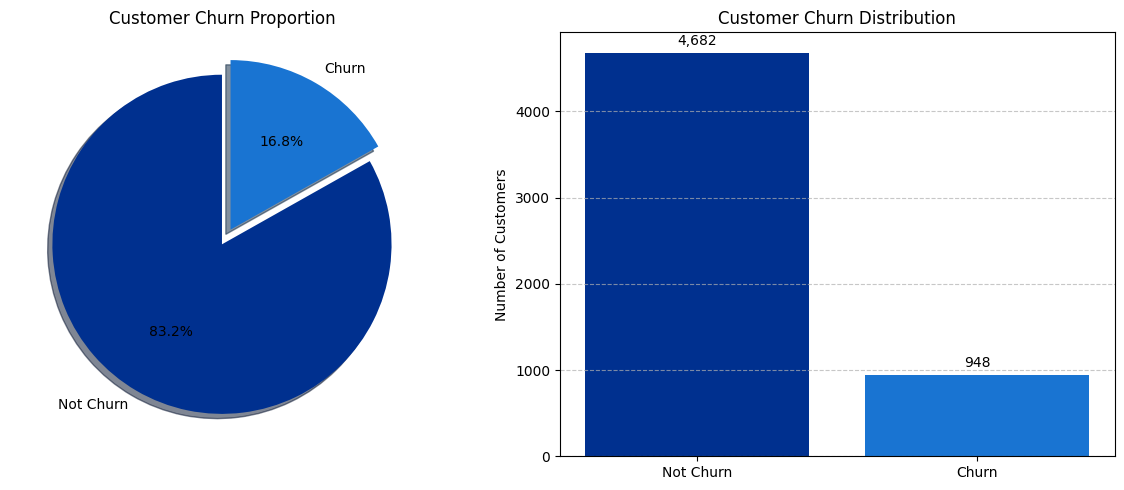

In [25]:
churn_counts = df['Churn'].value_counts()
labels = ['Not Churn', 'Churn']
colors = ['#00308F', '#1974D2']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(churn_counts, labels=labels, colors=colors, explode=(0, 0.1),
        autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Customer Churn Proportion')

plt.subplot(1, 2, 2)
bars = plt.bar(labels, churn_counts, color=colors)
plt.title('Customer Churn Distribution')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + max(churn_counts)*0.01,
        f'{yval:,}',                    
        ha='center',
        va='bottom',
        fontsize=10,
    )

plt.tight_layout()
plt.show()

The charts show that **16.8% of customers have churned**, while **83.2% not churn**. Although the churn rate is relatively low, it still represents a significant number of customers. This emphasizes the need for businesses to understand the causes of churn and take early action to retain at-risk customers.

#### Customer Demographics

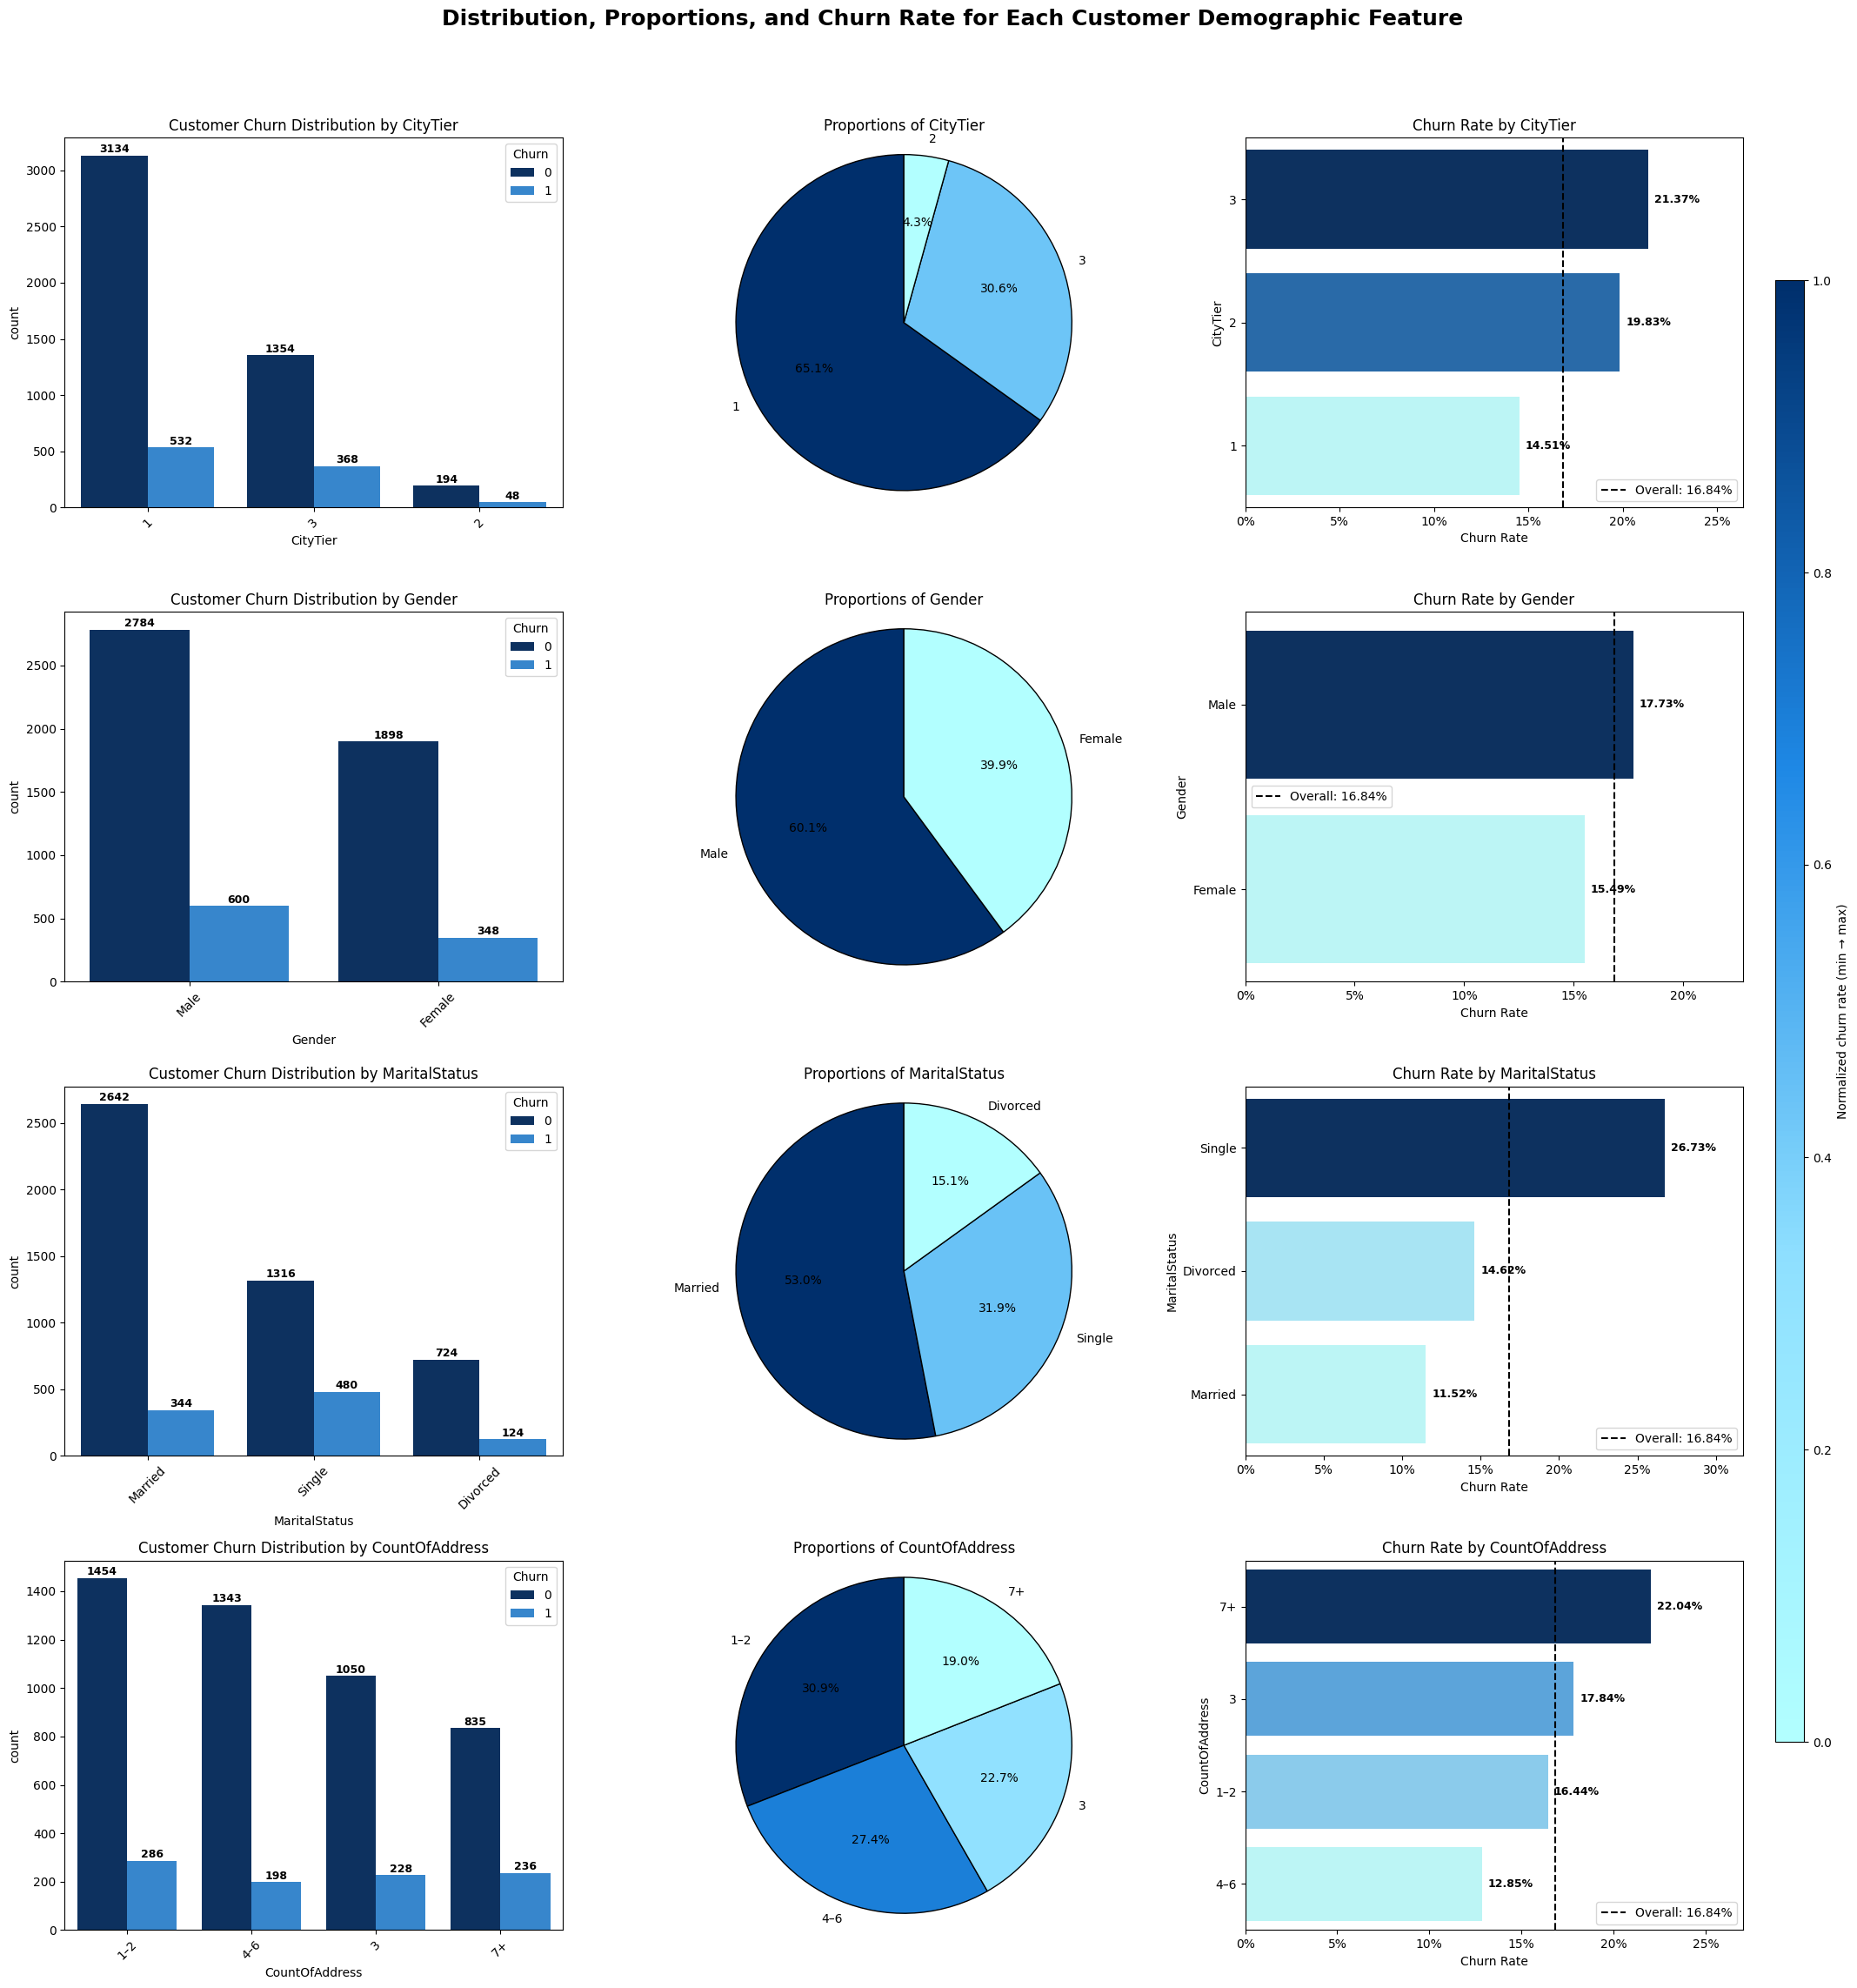

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LinearSegmentedColormap, Normalize
import matplotlib as mpl
import pandas as pd
import numpy as np

# pastikan churn numeric
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')

# Kolom demografis
demographics_cols = [
    'CityTier',
    'Gender',
    'MaritalStatus',
    'CountOfAddress',
]

# Palette dua warna untuk hue (countplot & pie)
# Not Churn -> dark navy, Churn -> bright blue (sesuai screenshot)
hue_colors = [
    '#002f6c',   # Not Churn (dark navy)
    '#1e88e5'    # Churn (bright blue)
]

# Gradien warna dari light -> dark (rendah -> tinggi)
grad_colors = [
    '#B2FFFF',   # very light blue (lowest)
    '#8EDFFF',
    '#1e88e5',
    '#002f6c'    # dark navy (highest)
]
cmap = LinearSegmentedColormap.from_list("blue_grad_light_to_dark", grad_colors)

# Figure layout
fig = plt.figure(figsize=(22, 6 * len(demographics_cols)))

for i, col in enumerate(demographics_cols):
    row_idx = i * 3

    # urut kategori berdasarkan frekuensi
    order = df[col].value_counts().sort_values(ascending=False).index

    # ---------------------------------------------------------
    # 1) Countplot (hue = Churn) - gunakan hue_colors
    # ---------------------------------------------------------
    ax1 = plt.subplot(len(demographics_cols), 3, row_idx + 1)
    ax = sns.countplot(
        data=df,
        x=col,
        hue='Churn',
        palette=hue_colors,
        order=order
    )
    plt.title(f'Customer Churn Distribution by {col}')
    plt.xticks(rotation=45)

    # annotate counts
    for p in ax.patches:
        count = int(p.get_height())
        if count > 0:
            ax.annotate(
                f'{count}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                color='black',
                fontsize=9, fontweight='bold'
            )

    # ---------------------------------------------------------
    # 2) Pie chart – proportional category distribution
    # ---------------------------------------------------------
    ax2 = plt.subplot(len(demographics_cols), 3, row_idx + 2)
    value_counts = df[col].value_counts()

    # Kalau value_counts kosong → tampilkan placeholder saja
    if len(value_counts) == 0:
        plt.text(0.5, 0.5, f"No data for {col}", ha='center', va='center')
        plt.axis('off')
    else:
        vals = value_counts.values

        # Normalisasi aman – jika max==min, semua warnanya sama
        if vals.max() - vals.min() < 1e-9:
            pie_norm = np.zeros_like(vals)
        else:
            pie_norm = (vals - vals.min()) / (vals.max() - vals.min())
    
        # Map ke warna gradien
        pie_colors = [cmap(v) for v in pie_norm]
    
        plt.pie(
            value_counts,
            labels=value_counts.index.astype(str),
            autopct='%1.1f%%',
            colors=pie_colors,
            startangle=90,
            wedgeprops={'edgecolor': 'black'}
        )
    
        plt.title(f'Proportions of {col}')
        plt.axis('equal')



    # ---------------------------------------------------------
    # 3) Barplot churn rate by category — pakai gradien light->dark
    # ---------------------------------------------------------
    ax3 = plt.subplot(len(demographics_cols), 3, row_idx + 3)

    data = df.groupby(df[col].astype(str), observed=False)['Churn'].mean().reset_index(name='Churn')
    data = data.sort_values(by='Churn', ascending=False)
    overall_churn_rate = df['Churn'].mean()

    # Normalisasi churn ke 0..1 (min -> 0 -> light, max -> 1 -> dark)
    if data['Churn'].max() - data['Churn'].min() < 1e-9:
        churn_norm = np.zeros_like(data['Churn'].values)  # edge case: semua sama
    else:
        churn_norm = (data['Churn'] - data['Churn'].min()) / (data['Churn'].max() - data['Churn'].min())

    # Map normalized values ke warna gradien (light -> dark)
    bar_colors = [cmap(v) for v in churn_norm]

    ax = sns.barplot(
        data=data,
        y=col,
        x='Churn',
        palette=bar_colors,
        orient='h'
    )

    # annotate percent labels on bars
    for p in ax.patches:
        ax.annotate(
            f'{p.get_width() * 100:.2f}%',
            (p.get_width(), p.get_y() + p.get_height() / 2),
            ha='left', va='center',
            xytext=(5, 0),
            textcoords='offset points',
            color='black',
            fontsize=9, fontweight='bold'
        )

    # overall churn line
    ax.axvline(
        x=overall_churn_rate,
        color='black',
        linestyle='--',
        label=f'Overall: {overall_churn_rate * 100:.2f}%'
    )

    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    plt.xlim(0, data['Churn'].max() + 0.05)
    plt.xlabel('Churn Rate')
    plt.title(f'Churn Rate by {col}')
    plt.legend()

# Tambahkan colorbar global di sisi kanan yang menjelaskan gradien (0 = lowest churn category, 1 = highest)
# create a scalar mappable for the colorbar
norm = Normalize(vmin=0, vmax=1)
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# place colorbar to the right
cbar_ax = fig.add_axes([0.93, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Normalized churn rate (min → max)')

plt.suptitle(
    'Distribution, Proportions, and Churn Rate for Each Customer Demographic Feature',
    fontsize=18, fontweight='bold',
    color='black'
)
plt.tight_layout(rect=[0, 0.03, 0.92, 0.95])
plt.show()

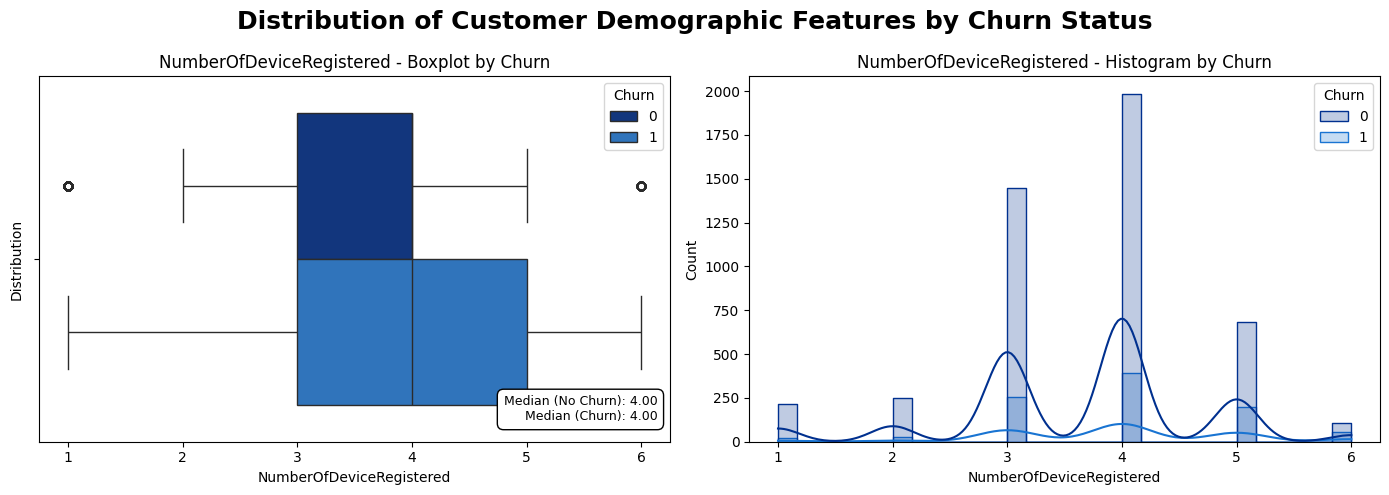

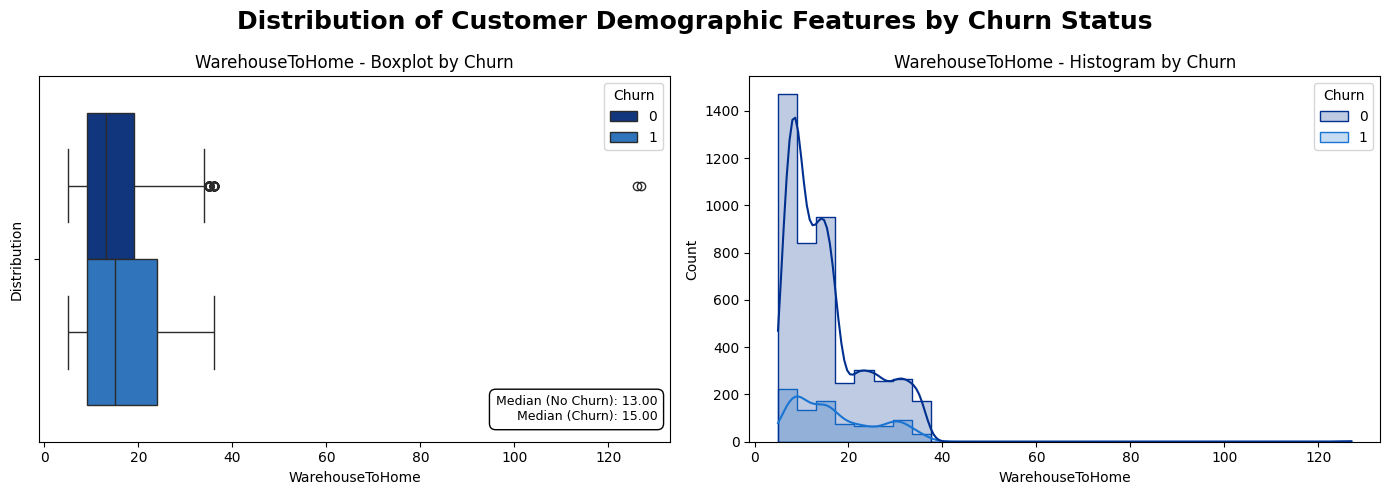

In [27]:
demographicnum_cols = [
    'NumberOfDeviceRegistered',
    'WarehouseToHome'
]

colors = ['#00308F', '#1974D2']


for col in demographicnum_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f"Distribution of Customer Demographic Features by Churn Status", fontsize=18, fontweight='bold', color='black')


    ax_box = axes[0]
    sns.boxplot(data=df, x=col, hue='Churn', palette= colors, ax=ax_box)
    ax_box.set_title(f"{col} - Boxplot by Churn", fontsize=12)
    ax_box.set_xlabel(col)
    ax_box.set_ylabel("Distribution")

    
    median_not_churn = df[df['Churn'] == 0][col].median()
    median_churn = df[df['Churn'] == 1][col].median()

    
    info_text = (
        f"Median (No Churn): {median_not_churn:.2f}\n"
        f"Median (Churn): {median_churn:.2f}"
    )
    ax_box.text(0.98, 0.05, info_text, transform=ax_box.transAxes, fontsize=9,
                verticalalignment='bottom', horizontalalignment='right',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    
    ax_hist = axes[1]
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette=colors, bins=30, element='step', ax=ax_hist)
    ax_hist.set_title(f"{col} - Histogram by Churn", fontsize=12)
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel("Count")

    
    plt.tight_layout()
    plt.show()

* City Tier : Most customers are from City Tier 1, followed by Tier 3, and then Tier 2. The churn rate in Tier 3 is over 50% higher than in Tier 1. Showing that customers in smaller or less developed cities are more likely to churn, possibly due to service accessibility, pricing sensitivity, or local alternatives.
  
* Gender : There are more male customers than female. The churn rate is slightly higher for male customers, but the difference is not large. This suggests that gender has limited influence on churn behavior.
  
* Marital Status : Most customers are married, followed by single and divorced. Single customers churn more often, while married customers are the most loyal.
  
* Count of Address: Most customers have 1–2 or 4–6 addresses, with fewer customers having 3 or 7+. The churn rate increases as the number of addresses increases, especially for those with 7+ addresses (22.04%), which is significantly above the overall churn rate of 16.84%. This may indicate that customers with frequent address changes are less stable and more likely to churn.

* Number of Devices Registered: The distribution is centered around 3 to 4 devices for both churned and retained customers. However, churn customers are less frequent across all device counts, and no strong pattern is observed, suggesting this feature may be less impactful for churn prediction.

* Warehouse To Home: This feature represents the distance between the warehouse and the customer's home. The median distance is slightly higher for churned customers (15) than for non-churned customers (13), as shown in the boxplot. The histogram shows that churned customers are somewhat more spread out across higher distance values. This suggests that longer distances may slightly increase the risk of churn, possibly due to delivery challenges or perceived inconvenience.

>City Tier, Marital Status, and Count of Address show strong relationships with churn and should be prioritized in modeling. Gender, Number of Devices Registered, and Warehouse To Home have weaker impact but may still add value when combined with other features.

#### Customer Behaviour/ App usage

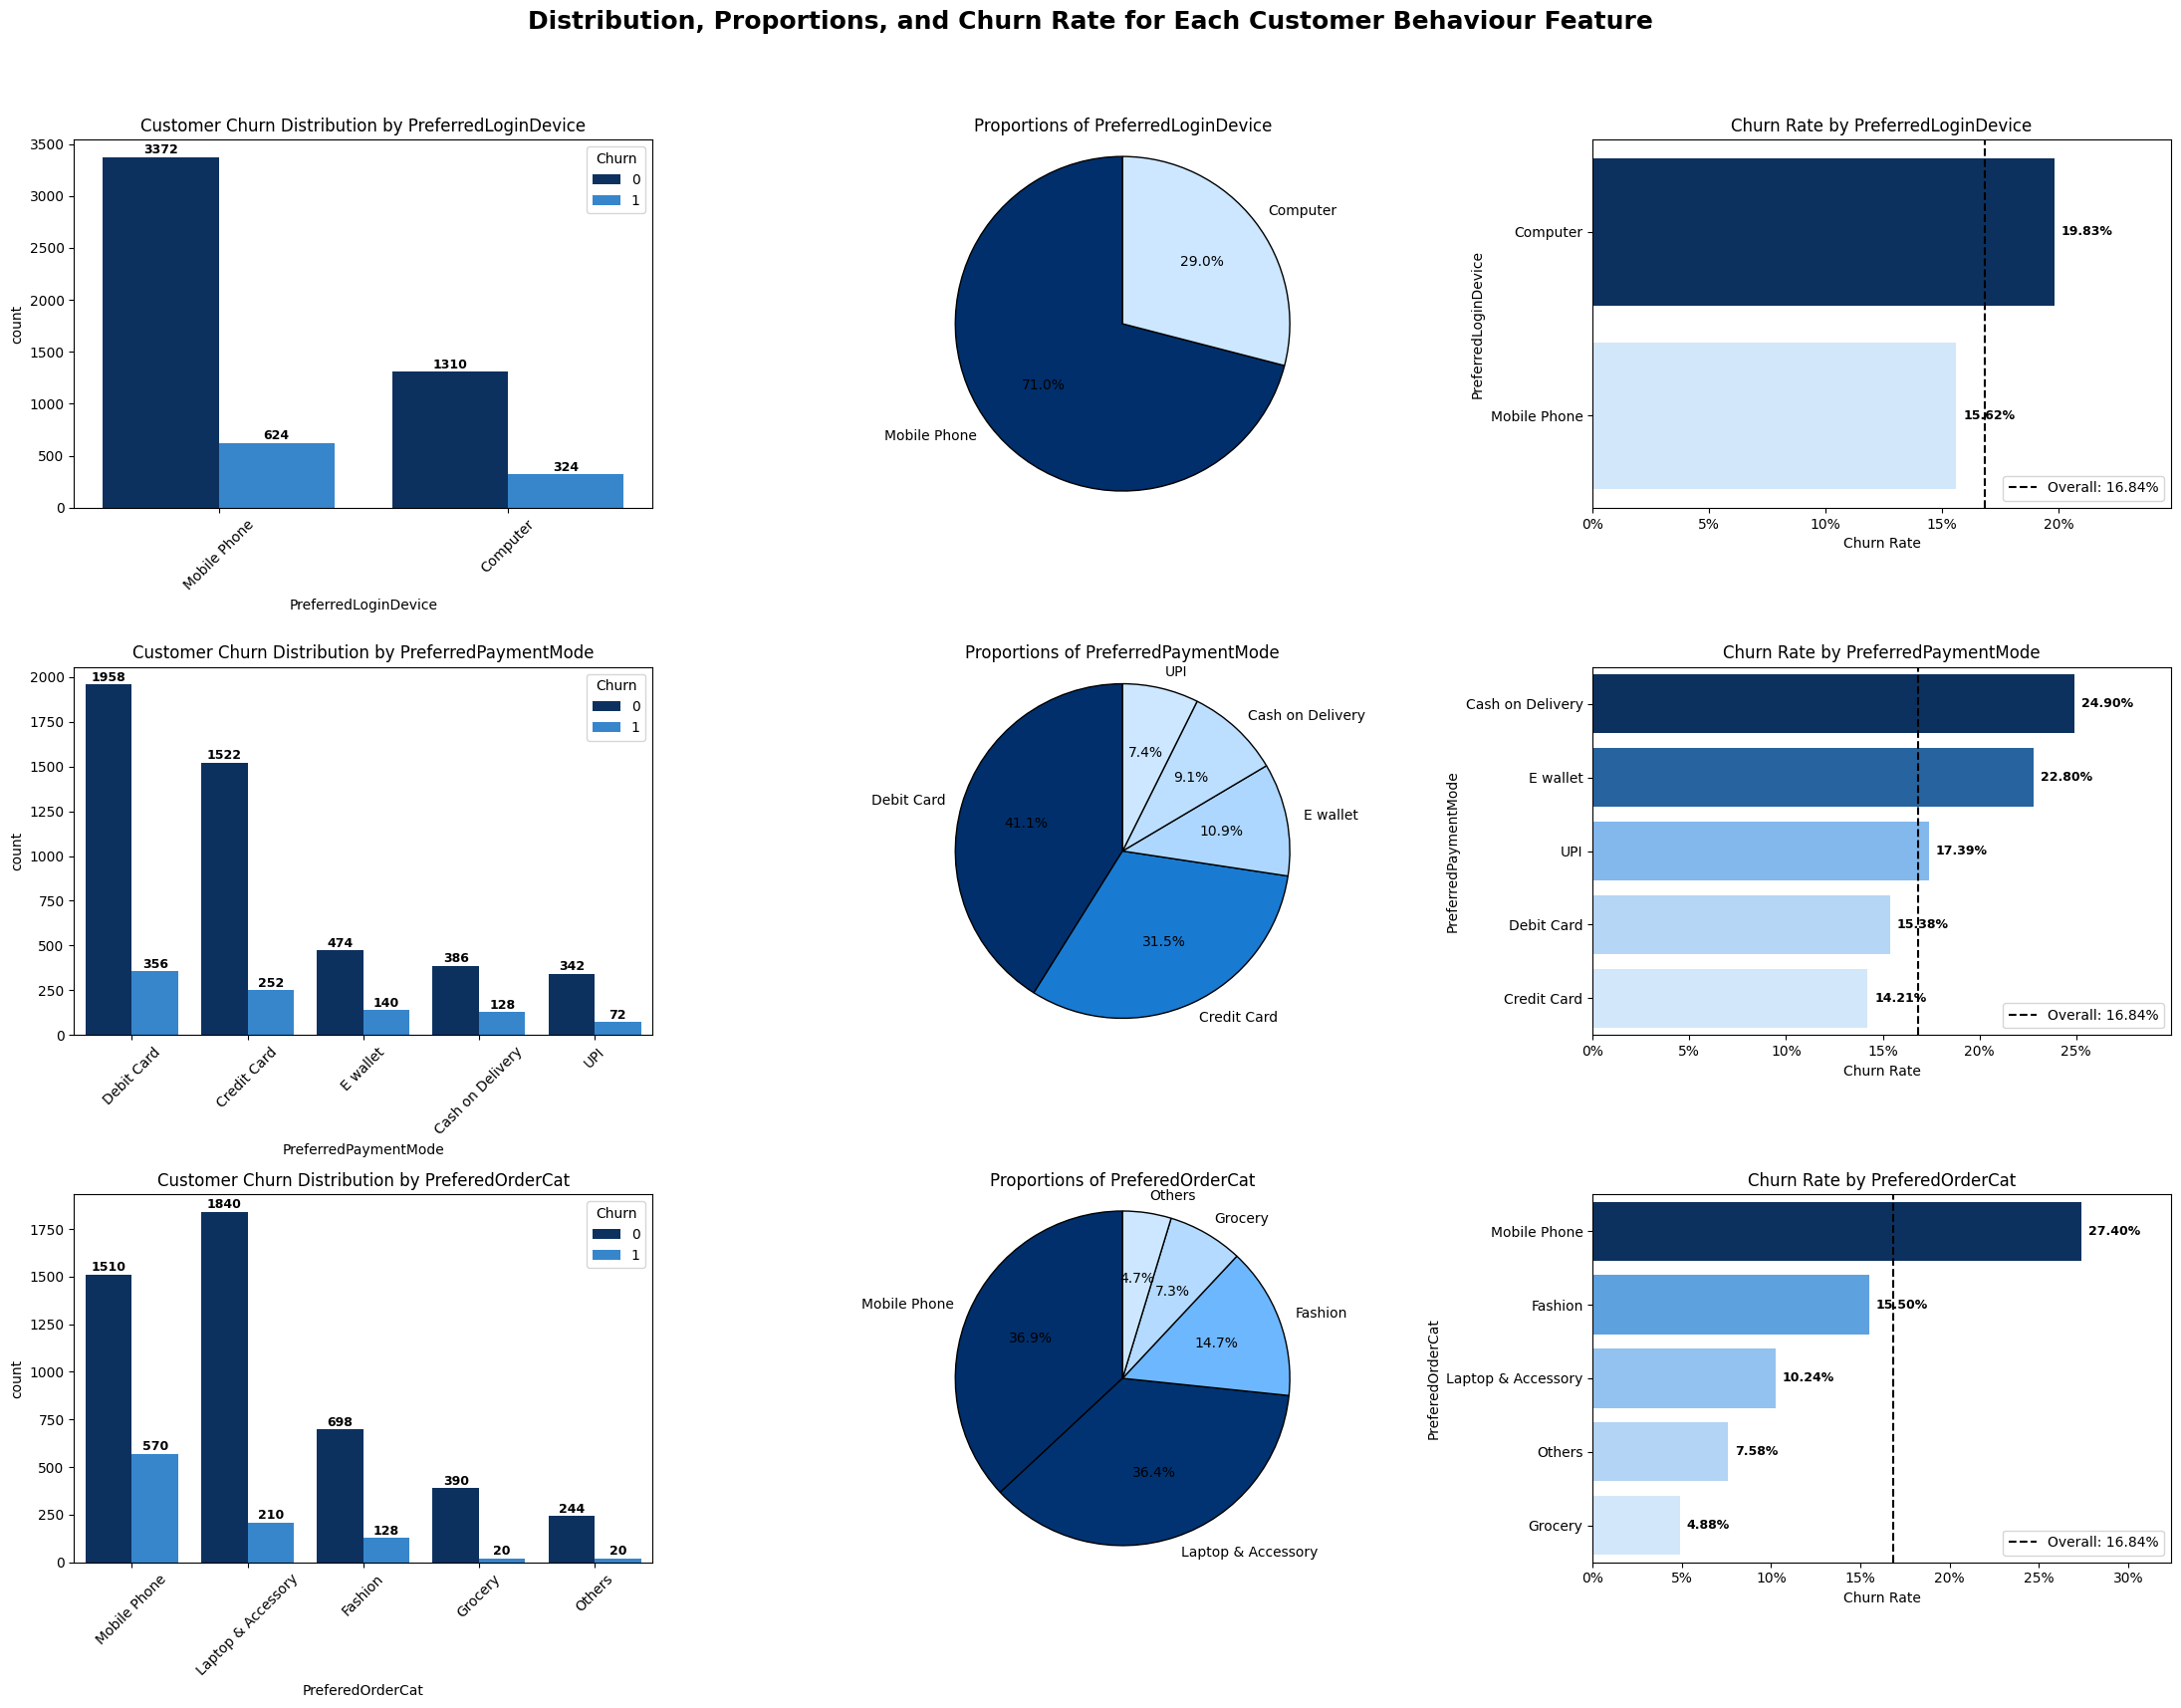

In [28]:
from matplotlib.colors import LinearSegmentedColormap, Normalize

df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')

behaviour_cols = [
    'PreferredLoginDevice',
    'PreferredPaymentMode',
    'PreferedOrderCat',
]

hue_colors = [
        '#002f6c',   # Not Churn (0)
        '#1e88e5'    # Churn (1)
    ]
    
cmap = LinearSegmentedColormap.from_list(
    "blue_grad",
    ['#cce7ff', '#66b3ff', '#1e88e5', '#002f6c']
)

plt.figure(figsize=(22, 6 * len(behaviour_cols)))

for i, col in enumerate(behaviour_cols):
    row_idx = i * 3
    
    order = df[col].value_counts().sort_values(ascending=False).index

    # ========================================================
    # 1) COUNT PLOT (update)
    # ========================================================
    plt.subplot(len(behaviour_cols), 3, row_idx + 1)
    ax = sns.countplot(
        data=df,
        x=col,
        hue='Churn',
        palette=hue_colors,
        order=order
    )
    plt.title(f'Customer Churn Distribution by {col}')
    plt.xticks(rotation=45)
    
    for p in ax.patches:
        count = int(p.get_height())
        if count > 0:
            ax.annotate(
                f'{count}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=9, fontweight='bold'
            )

    # ========================================================
    # 2) PIE CHART (gradient berdasarkan nilai)
    # ========================================================
    plt.subplot(len(behaviour_cols), 3, row_idx + 2)

    value_counts = df[col].value_counts()

    if len(value_counts) == 0:
        plt.text(0.5, 0.5, "No Data", ha='center')
        plt.axis('off')
    else:
        vals = value_counts.values
        
        if vals.max() - vals.min() < 1e-9:
            pie_norm = np.zeros_like(vals)
        else:
            pie_norm = (vals - vals.min()) / (vals.max() - vals.min())
        
        pie_colors = [cmap(v) for v in pie_norm]

        plt.pie(
            value_counts,
            labels=value_counts.index.astype(str),
            autopct='%1.1f%%',
            colors=pie_colors,
            startangle=90,
            wedgeprops={'edgecolor': 'black'}
        )
        plt.title(f'Proportions of {col}')
        plt.axis('equal')


    # ========================================================
    # 3) BARPLOT – churn rate (gradient sesuai nilai churn)
    # ========================================================
    plt.subplot(len(behaviour_cols), 3, row_idx + 3)

    data = df.groupby(df[col].astype(str), observed=False)['Churn'].mean().reset_index(name='Churn')
    
    if len(data) == 0:
        plt.text(0.5, 0.5, "No Data", ha='center')
        plt.axis('off')
        continue

    data = data.sort_values(by='Churn', ascending=False)
    overall_churn_rate = df['Churn'].mean()

    # gradasi: tinggi → biru tua, rendah → biru muda
    churn_norm = Normalize(vmin=data['Churn'].min(), vmax=data['Churn'].max())
    bar_colors = [cmap(churn_norm(x)) for x in data['Churn']]

    ax = sns.barplot(
        data=data,
        y=col,
        x='Churn',
        palette=bar_colors,
        orient='h'
    )

    for p in ax.patches:
        ax.annotate(
            f'{p.get_width() * 100:.2f}%',
            (p.get_width(), p.get_y() + p.get_height() / 2),
            ha='left', va='center',
            xytext=(5, 0),
            textcoords='offset points',
            fontsize=9, fontweight='bold'
        )

    ax.axvline(
        x=overall_churn_rate,
        color='black',
        linestyle='--',
        label=f'Overall: {overall_churn_rate * 100:.2f}%'
    )

    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    plt.xlim(0, data['Churn'].max() + 0.05)
    plt.xlabel('Churn Rate')
    plt.title(f'Churn Rate by {col}')
    plt.legend()

plt.suptitle(
    'Distribution, Proportions, and Churn Rate for Each Customer Behaviour Feature',
    fontsize=18, fontweight='bold',
    color='black'
)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

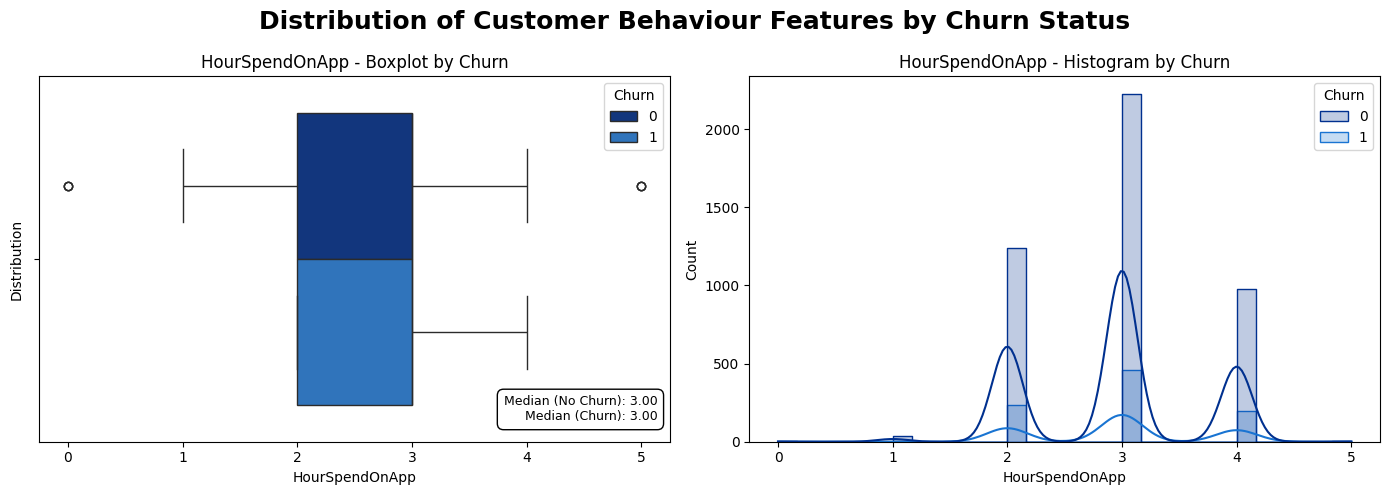

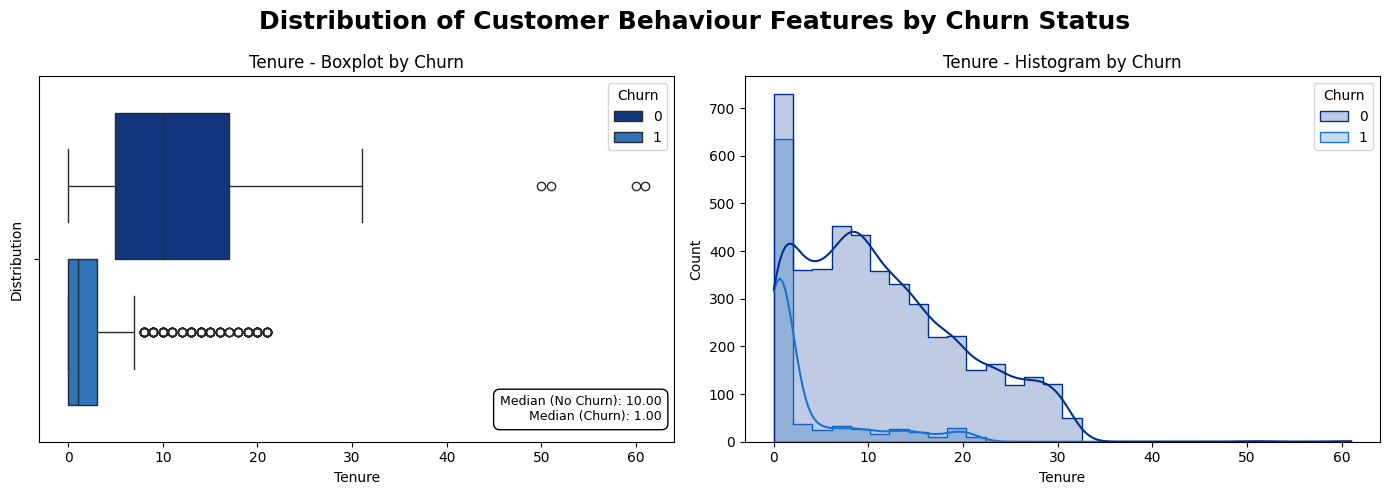

In [29]:
behaviournum_cols = [
    'HourSpendOnApp','Tenure'
]

colors = ['#00308F', '#1974D2']

for col in behaviournum_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f"Distribution of Customer Behaviour Features by Churn Status", fontsize=18, fontweight='bold', color='black')


    ax_box = axes[0]
    sns.boxplot(data=df, x=col, hue='Churn', palette= colors, ax=ax_box)
    ax_box.set_title(f"{col} - Boxplot by Churn", fontsize=12)
    ax_box.set_xlabel(col)
    ax_box.set_ylabel("Distribution")

    
    median_not_churn = df[df['Churn'] == 0][col].median()
    median_churn = df[df['Churn'] == 1][col].median()

    
    info_text = (
        f"Median (No Churn): {median_not_churn:.2f}\n"
        f"Median (Churn): {median_churn:.2f}"
    )
    ax_box.text(0.98, 0.05, info_text, transform=ax_box.transAxes, fontsize=9,
                verticalalignment='bottom', horizontalalignment='right',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    
    ax_hist = axes[1]
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette=colors, bins=30, element='step', ax=ax_hist)
    ax_hist.set_title(f"{col} - Histogram by Churn", fontsize=12)
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel("Count")

    
    plt.tight_layout()
    plt.show()

* Preferred Login Device : Most customers use a mobile phone to log in followed by computers. This difference is above the overall churn rate (13.2%), suggesting that customers logging in via computer are more likely to churn.

* Preferred Payment Mode : Most customers prefer debit cards and credit cards. However, cash on delivery (18.86%) and e-wallet (18.02%) users show higher churn rates, well above the average churn rate of 13.2%. Customers using convenient, flexible payment methods might be less loyal and easily switch platforms.

* Preferred Order Category :  Customers who mostly buy Mobile Phones churn the most (22.72%), far above the average. Those who buy Grocery (4.89%) or Laptop & Accessories (7.28%) churn far less. The large gaps between categories show this is a very strong signal of churn risk.

* Time Spent on App : Users spending 3–5 hours on the app have a higher churn rate.

* Tenure : Customers who churn tend to have significantly shorter tenure compared to those who stay. The boxplot shows that the median tenure for churned customers is only 1 month, while for non-churned customers it is 10 months. The histogram further confirms that customers with longer tenure are less likely to churn. This indicates that customer longevity is a strong signal of churn risk.

>Customers who use computers to log in, pay with cash or e-wallets, often buy mobile phones, or spend 3–5 hours on the app are more likely to churn. Those with shorter tenure (median of 1 month) also show significantly higher churn, emphasizing the importance of customer longevity. These differences are quite large, so they are important to include in a churn prediction model to help identify and retain high-risk customers.

#### Customer Purchase History

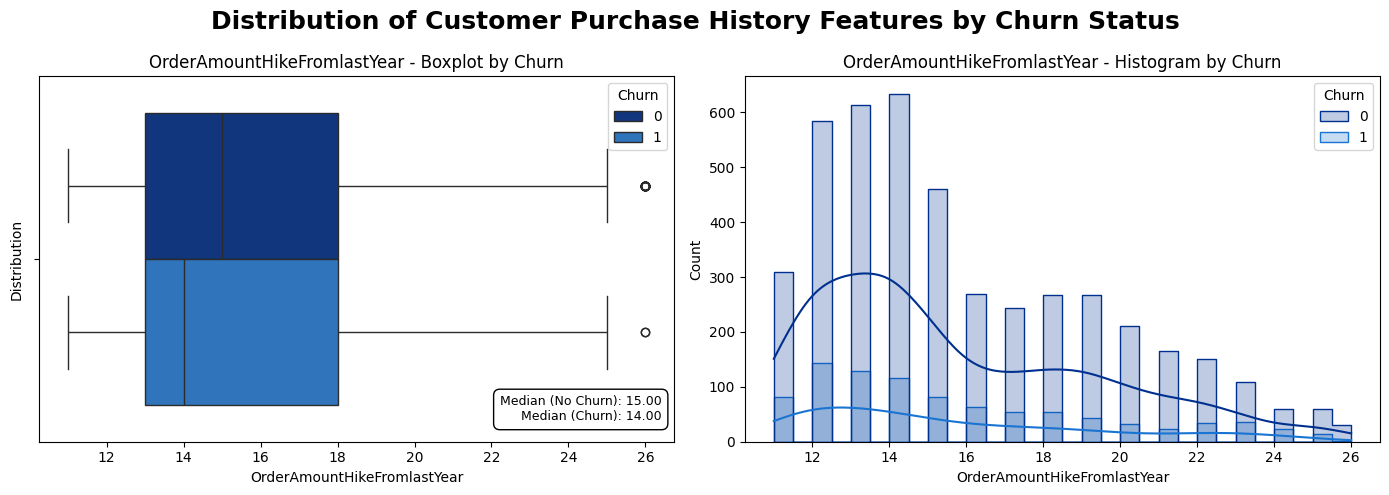

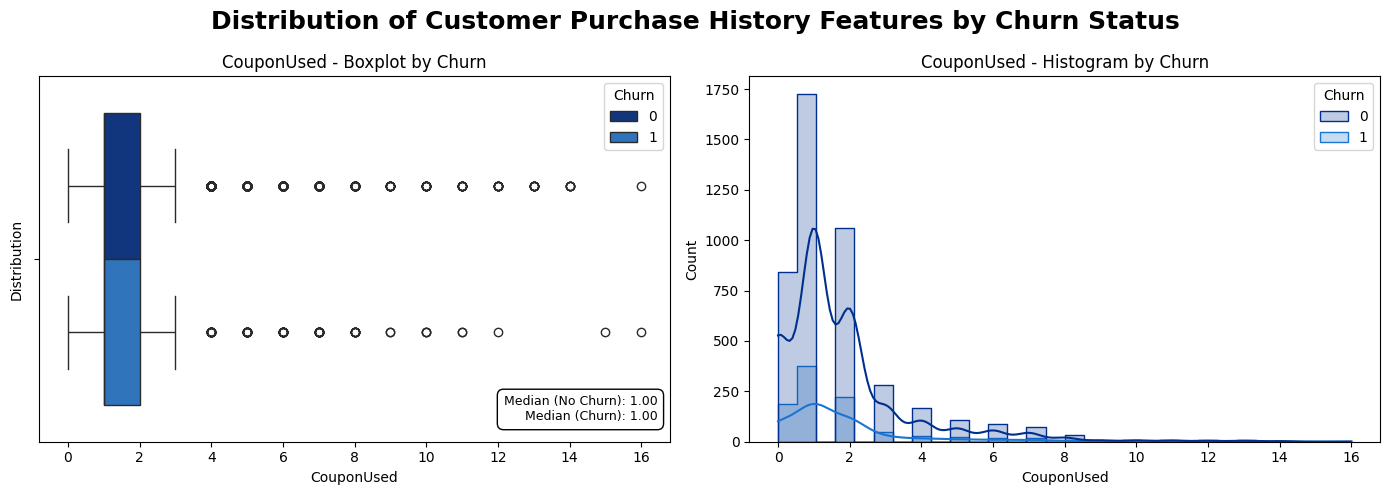

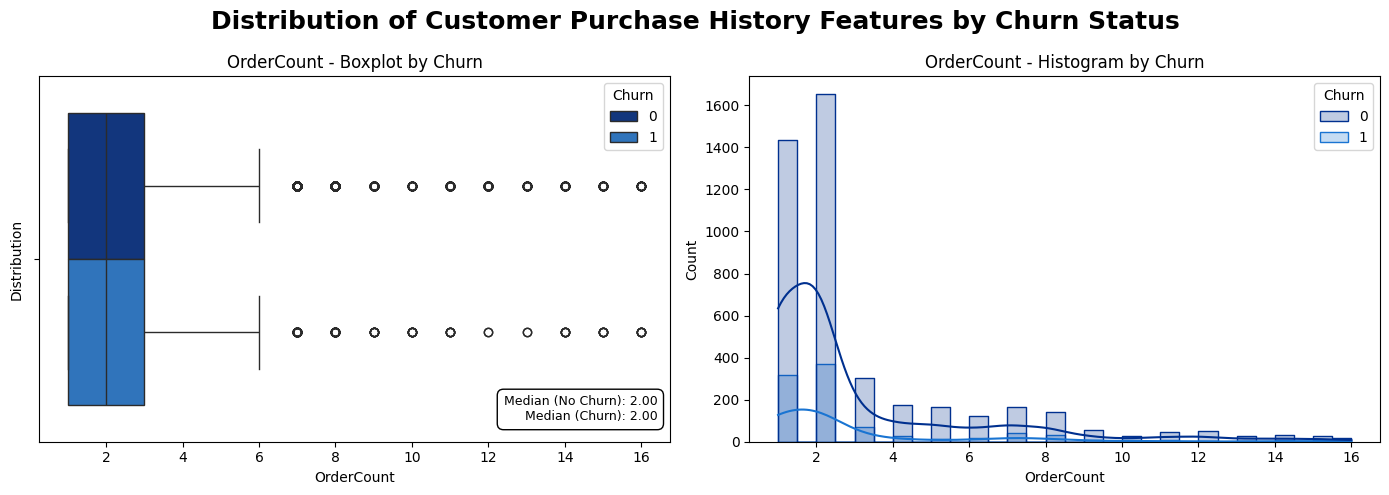

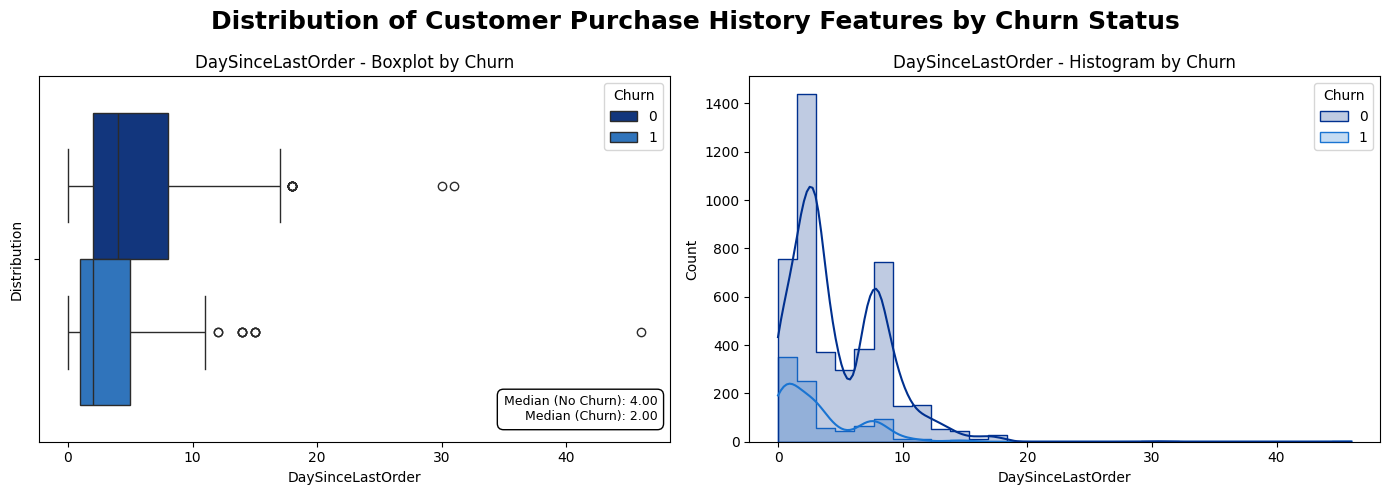

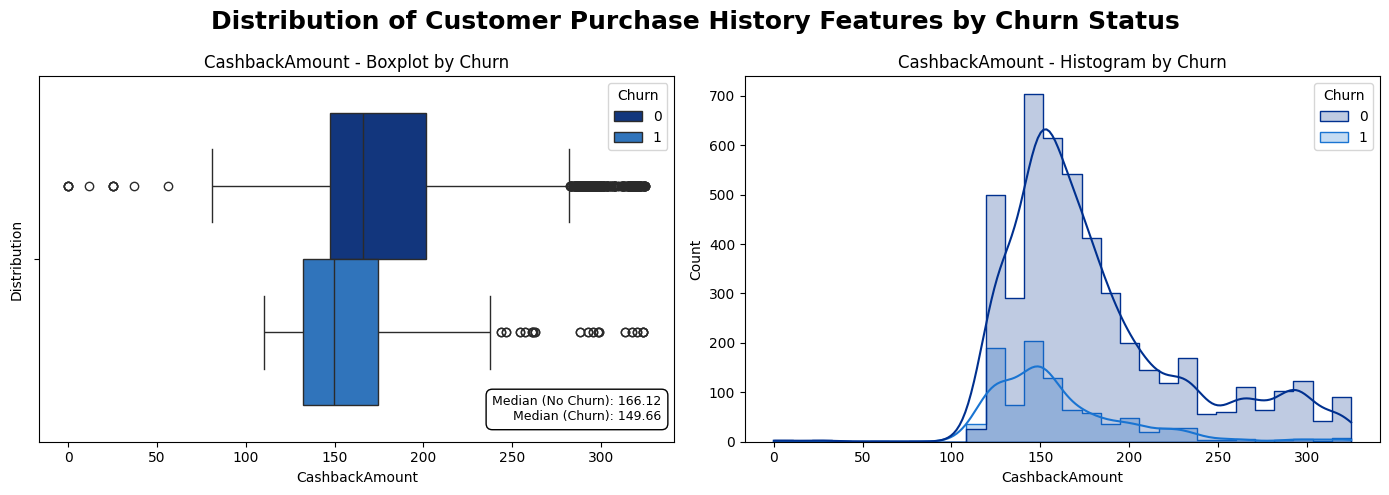

In [30]:
purchase_cols = [
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder',
    'CashbackAmount'
]

colors = ['#00308F', '#1974D2']

for col in purchase_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f"Distribution of Customer Purchase History Features by Churn Status", fontsize=18, fontweight='bold', color='black')


    ax_box = axes[0]
    sns.boxplot(data=df, x=col, hue='Churn', palette= colors, ax=ax_box)
    ax_box.set_title(f"{col} - Boxplot by Churn", fontsize=12)
    ax_box.set_xlabel(col)
    ax_box.set_ylabel("Distribution")

    
    median_not_churn = df[df['Churn'] == 0][col].median()
    median_churn = df[df['Churn'] == 1][col].median()

    
    info_text = (
        f"Median (No Churn): {median_not_churn:.2f}\n"
        f"Median (Churn): {median_churn:.2f}"
    )
    ax_box.text(0.98, 0.05, info_text, transform=ax_box.transAxes, fontsize=9,
                verticalalignment='bottom', horizontalalignment='right',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    
    ax_hist = axes[1]
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette=colors, bins=30, element='step', ax=ax_hist)
    ax_hist.set_title(f"{col} - Histogram by Churn", fontsize=12)
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel("Count")

    
    plt.tight_layout()
    plt.show()

* Order Amount Hike From Last Year: The median is similar for both churned and retained customers (15 vs. 14), with similar spread. This feature may not be very useful for predicting churn.
  
* Coupon Used: Churned customers tend to use slightly fewer coupons. Although the median is the same (1), the lower spread suggests that more engaged users (using more coupons) are less likely to churn.

* Order Count: Both groups have the same median number of orders (2), but churned customers have fewer high-order outliers. This may suggest that frequent buyers are more likely to stay.

* Days Since Last Order: Churned users usually made their last purchase more recently (median = 2) than retained ones (median = 4). This may indicate they churn shortly after their final order.

* Cashback Amount: Retained customers receive slightly more cashback (166 vs. 149), which may help reduce churn risk.

>Variables related to customer purchasing behavior—such as Coupon Used, Order Count, Cashback Amount, and Days Since Last Order—demonstrate strong differentiation between churned and retained customers, making them highly valuable for predictive modeling.

#### Customer Feedback/ Satisfaction

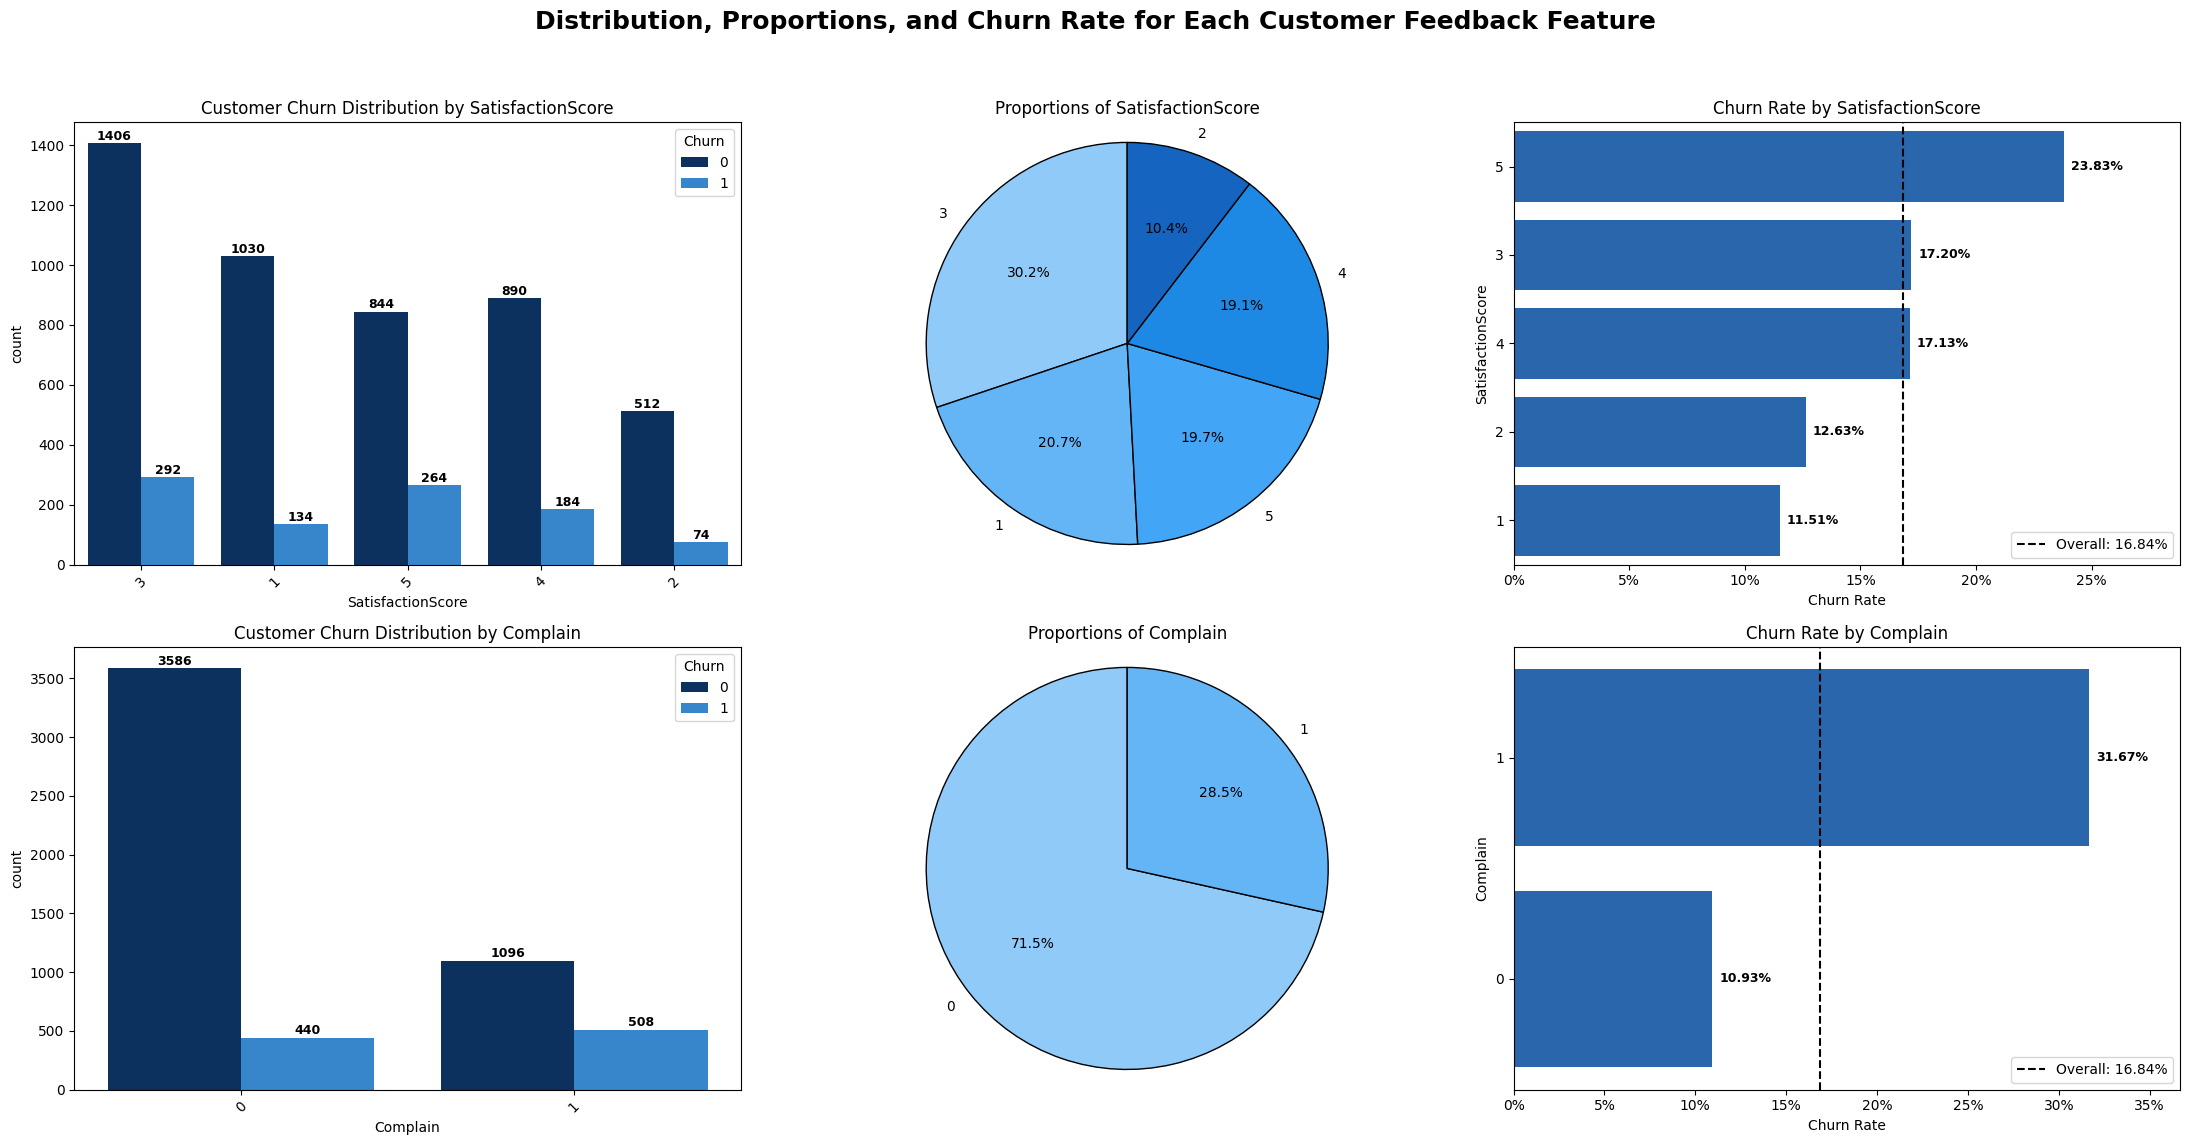

In [31]:
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')

feedback_cols = [
    'SatisfactionScore',
    'Complain'
]

# Warna untuk kategori Churn (0 & 1)
hue_colors = [
    '#002f6c',   # Not Churn
    '#1e88e5'    # Churn
]

# Palette biru untuk chart pie & bar
colors = ['#90caf9','#64b5f6','#42a5f5','#1e88e5','#1565c0','#0d47a1']

plt.figure(figsize=(22, 6 * len(feedback_cols)))  

for i, col in enumerate(feedback_cols):
    row_idx = i * 3
    
    order = df[col].value_counts().sort_values(ascending=False).index
    
    # ================================
    # 1️⃣ Countplot Distribusi vs Churn
    # ================================
    plt.subplot(len(feedback_cols), 3, row_idx + 1)
    ax = sns.countplot(
        data=df,
        x=col,
        hue='Churn',
        palette=hue_colors,
        order=order
    )
    plt.title(f'Customer Churn Distribution by {col}')
    plt.xticks(rotation=45)

    for p in ax.patches:
        count = int(p.get_height())
        if count > 0:
            ax.annotate(
                f'{count}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                color='black',
                fontsize=9,
                fontweight='bold'
            )

    # =======================
    # 2️⃣ Pie Chart
    # =======================
    plt.subplot(len(feedback_cols), 3, row_idx + 2)
    value_counts = df[col].value_counts()
    plt.pie(
        value_counts,
        labels=value_counts.index.astype(str),
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title(f'Proportions of {col}')
    plt.axis('equal')

    # =======================
    # 3️⃣ Churn Rate by Feature
    # =======================
    plt.subplot(len(feedback_cols), 3, row_idx + 3)
    data = (
        df.groupby(df[col].astype(str), observed=False)['Churn']
        .mean()
        .reset_index(name='Churn')
        .sort_values(by='Churn', ascending=False)
    )
    overall_churn_rate = df['Churn'].mean()
    
    ax = sns.barplot(
        data=data,
        y=col,
        x='Churn',
        color='#1565c0',
        orient='h'
    )

    for p in ax.patches:
        ax.annotate(
            f'{p.get_width()*100:.2f}%',
            (p.get_width(), p.get_y() + p.get_height() / 2),
            ha='left', va='center',
            xytext=(5, 0),
            textcoords='offset points',
            color='black',
            fontsize=9,
            fontweight='bold'
        )

    ax.axvline(
        x=overall_churn_rate,
        color='black',
        linestyle='--',
        label=f'Overall: {overall_churn_rate*100:.2f}%'
    )
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    plt.xlim(0, data['Churn'].max() + 0.05)
    plt.xlabel('Churn Rate')
    plt.title(f'Churn Rate by {col}')
    plt.legend()

plt.suptitle(
    'Distribution, Proportions, and Churn Rate for Each Customer Feedback Feature',
    fontsize=18,
    fontweight='bold',
    color='Black'
)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

* Satisfaction Score : Customers with higher satisfaction scores tend to churn more, especially those with a score of 5, where the churn rate reaches 18.51%, well above the overall churn rate of 13.20%. Meanwhile, those with low satisfaction scores (like 1 or 2) have churn rates below 10%.
  
* Complain : Customers who filed complaints (Complain = 1) show a churn rate of 26.17%, double the overall churn rate. Meanwhile, those who did not complain have a churn rate of only 8.27%. This indicates that complaint are a clear warning sign of potential churn.

>Customers who complain or have very high satisfaction scores are more likely to churn. These factors are significant and should be considered in churn prediction models to help businesses respond early and reduce customer loss.

### Correlation Matrix

Based on the previous exploratory analysis, the data does not follow a normal distribution. Therefore, a non-parametric test was selected as it is more appropriate for this type of distribution.

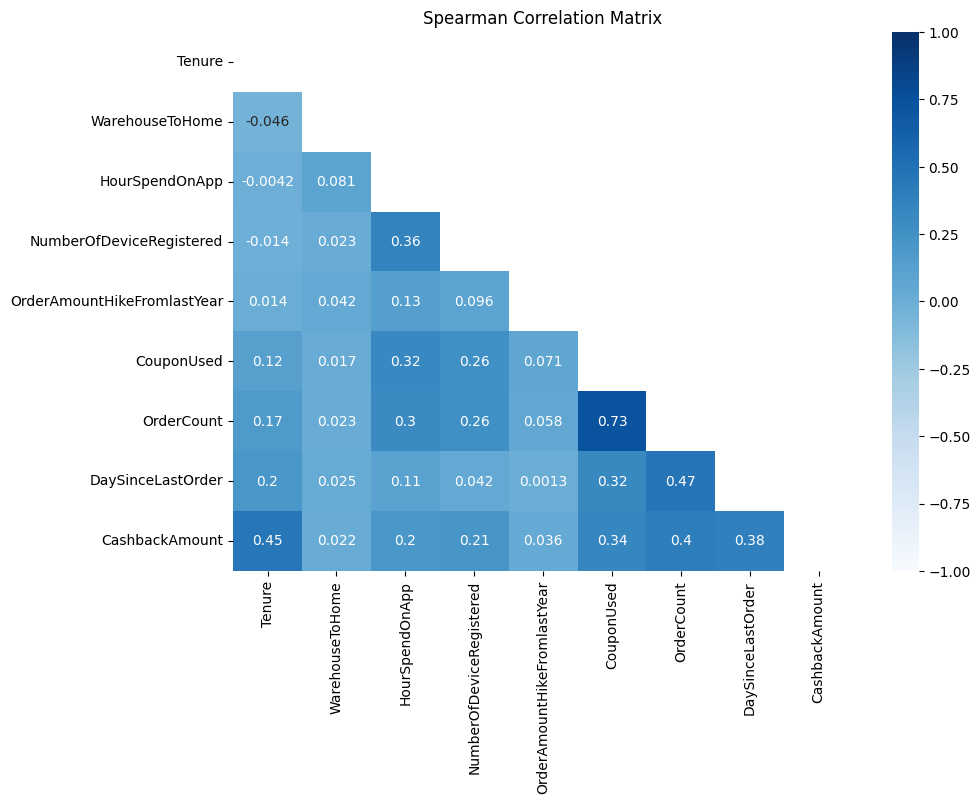

In [32]:
X = df.drop(columns='Churn').select_dtypes(include='number')

corr = X.corr(method='spearman')

plt.figure(figsize=(10, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='Blues', mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title('Spearman Correlation Matrix')
plt.show()

>The Spearman correlation matrix shows no strong multicollinearity among numerical features, which is favorable for modeling. However, there is a moderate correlations to note like Order Count and Coupon Used with correlation value 0.7. These suggest some relationship but not enough to warrant immediate feature removal. Overall, all numerical features can be safely used in modeling without major concerns for multicollinearity.

In [33]:
features = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
    'NumberOfDeviceRegistered',
    'OrderAmountHikeFromlastYear', 'CouponUsed',
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

results = []

for feature in features:
    churned = df[df['Churn'] == 1][feature].dropna()
    not_churned = df[df['Churn'] == 0][feature].dropna()
    
    stat, p = mannwhitneyu(churned, not_churned, alternative='two-sided')
    
    results.append({
        'Feature': feature,
        'U-Statistic': stat,
        'p-value': p,
        'Significance': 'Significant' if p < 0.05 else 'Not Significant'
    })

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by='p-value')

results_df

Feature  U-Statistic        p-value     Significance
0                       Tenure     714994.0  5.680524e-193      Significant
7            DaySinceLastOrder    1412515.0   2.954664e-42      Significant
8               CashbackAmount    1628505.0   2.518464e-38      Significant
3     NumberOfDeviceRegistered    2546899.0   3.054189e-14      Significant
1              WarehouseToHome    2198913.5   2.676543e-09      Significant
6                   OrderCount    1979607.0   3.636439e-02      Significant
4  OrderAmountHikeFromlastYear    2004453.0   1.298518e-01  Not Significant
2               HourSpendOnApp    2042784.0   2.267954e-01  Not Significant
5                   CouponUsed    2038042.5   2.674033e-01  Not Significant

>The goal of this test is to identify which features show statistically significant differences between churned and non-churned customers. The results of the Mann-Whitney U test indicate that several features show statistically significant differences between churned and non-churned customers, making them valuable for predictive modeling. Tenure, Day Since Last Order, Cashback Amount, Number Of Device Registered, Warehouse To Home, and Order Count have p-values below 0.05, suggesting a meaningful relationship with customer churn. These features are strong candidates to be included in churn prediction models. On the other hand, Order Amount Hike From Last Year, Hour Spend On App, and Coupon Used did not show significant differences between the two groups, implying they may have limited predictive power for churn in this context and could be deprioritized or excluded during feature selection. Overall, the statistically significant features identified can help enhance the accuracy and interpretability of churn models.

In [34]:
cat_features = [
    'PreferredLoginDevice', 'CityTier',
    'PreferredPaymentMode', 'Gender',
    'PreferedOrderCat', 'SatisfactionScore',
    'Complain', 'CountOfAddress'
]

results = []

for col in cat_features:
    table = pd.crosstab(df[col], df['Churn'])
    chi2, p, _, _ = chi2_contingency(table)
    
    significance = "Significant" if p < 0.05 else "Not Significant"
    
    results.append({
        'Feature': col,
        'Chi²': chi2,
        'p-value': p,
        'Significance': significance
    })

chi2_df = pd.DataFrame(results)
chi2_df = chi2_df.sort_values(by='p-value')

chi2_df

Feature        Chi²       p-value Significance
6              Complain  350.925455  2.664461e-78  Significant
4      PreferedOrderCat  288.597786  3.119243e-61  Significant
5     SatisfactionScore   69.865388  2.423335e-14  Significant
2  PreferredPaymentMode   51.828960  1.497857e-10  Significant
1              CityTier   40.982404  1.261200e-09  Significant
7        CountOfAddress   39.290703  1.506179e-08  Significant
0  PreferredLoginDevice   14.401253  1.477040e-04  Significant
3                Gender    4.662908  3.082094e-02  Significant

>The Chi-square test shows that all categorical features are significantly associated with churn. Key drivers include Complain, Preferred Order Cat, and Satisfaction Score, which have the strongest impact. Other relevant features are Preferred Payment Mode, City Tier, Count Of Address, Preferred LoginDevice, and Gender. All should be considered for churn modeling.

In [35]:
df.to_csv('e_comm_cleaned.csv', index=False)

## Build Model

#### Flowchart: End-to-End Modeling Process

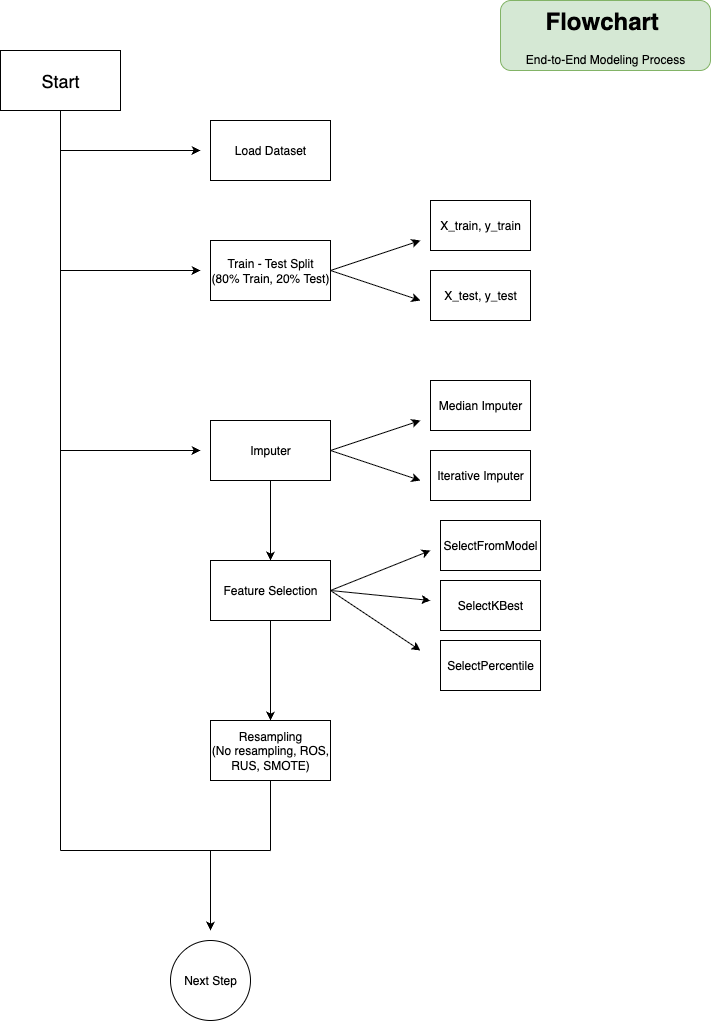
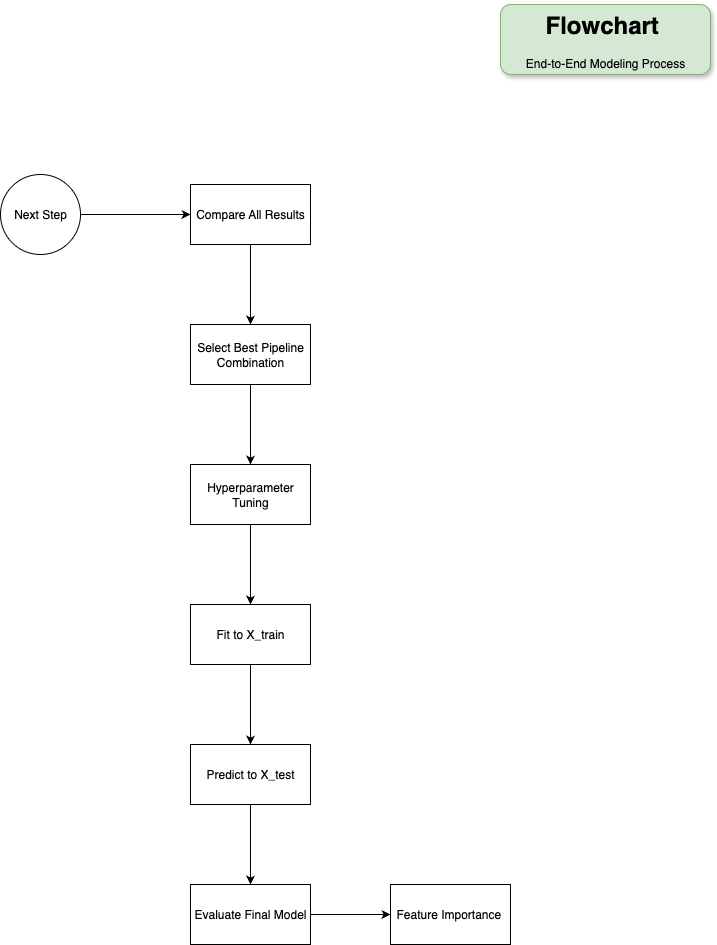

#### Modeling Flowchart

This end-to-end modeling flow starts by **loading the dataset** and **splitting it into training and testing sets (80/20)**. Missing values are handled using either **Median Imputer** or **Iterative Imputer**. **Feature selection** is performed using methods like **SelectFromModel**, **SelectKBest**, or **SelectPercentile** to reduce dimensionality. To address **class imbalance**, **resampling techniques** such as **Random Over Sampling (ROS)**, **Random Under Sampling (RUS)**, and **SMOTE** are applied within the modeling pipeline. All **preprocessing model combinations** are evaluated, and the **best pipeline** is selected.   **Hyperparameter tuning** is then performed to **optimize model performance**. The optimized model is **fitted on the training set** and **evaluated on the test set**. The final step involves analyzing **performance metrics** and **feature importance** to assess the model’s **effectiveness** and **interpretability**.

### Modeling

In [36]:
X = df.drop(columns=["CustomerID", "Churn"])
y = df["Churn"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=79)

### Feature Selection (SelectFromModel) + Median Imputer + With & Without Sampling

In [38]:
binary_encode_cols = ['PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus','CountOfAddress']
onehot_encode_cols = ['PreferredLoginDevice', 'Gender']
numeric_cols = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
    'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
    'DaySinceLastOrder', 'CashbackAmount'
]


preprocessor = ColumnTransformer(
    transformers=[

        ('Numerical 1',
         ImbPipeline([
             ('Imputer 1', SimpleImputer(strategy='median')),
             ('Scaler', RobustScaler())
         ]),
         numeric_cols),

        ('Categorical 1',
         ImbPipeline([
             ('Encoder 1', ce.BinaryEncoder())
         ]),
         binary_encode_cols),

         ('Categorical 2',
         ImbPipeline([
             ('Encoder 2', OneHotEncoder(drop="first"))
         ]),
         onehot_encode_cols),

        ('Categorical 3',
         ImbPipeline([
             ('Encoder 3', OrdinalEncoder(categories=[['1','2','3','4','5']]))
         ]),
         ['SatisfactionScore']),

         ('Categorical 4',
         ImbPipeline([
             ('Encoder 4', OrdinalEncoder(categories=[['3','2','1']]))
         ]),
         ['CityTier']),
    ],
    remainder='drop' 
)


tree = DecisionTreeClassifier(random_state=79)
logreg = LogisticRegression(random_state=79)
xgb = XGBClassifier(random_state=79)
rf = RandomForestClassifier(random_state=79)
knn = KNeighborsClassifier() 
lgbm = LGBMClassifier(random_state=79)
svm = SVC(probability=True, random_state=79)

sampling_strategies = {
    "No Resampling": None,
    "SMOTE": SMOTE(random_state=79),
    "RandomOverSampler": RandomOverSampler(random_state=79),
    "RandomUnderSampler": RandomUnderSampler(random_state=79),
}


for sampler_name, sampler in sampling_strategies.items():
    print(f"Running pipeline with: {sampler_name}")

    steps = [('preprocessor', preprocessor)]

    if sampler is not None:
        steps.append(('sampler', sampler))

    steps += [
        
        ('feature_selection', SelectFromModel(estimator=XGBClassifier())),
        ('classifier', rf)]  

    imbpipeline = ImbPipeline(steps=steps)

Running pipeline with: No Resampling
Running pipeline with: SMOTE
Running pipeline with: RandomOverSampler
Running pipeline with: RandomUnderSampler


In [39]:
imbpipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical 1',
                                                  Pipeline(steps=[('Imputer 1',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'HourSpendOnApp',
                                                   'NumberOfDeviceRegistered',
                                                   'OrderAmountHikeFromlastYear',
                                                   'CouponUsed', 'OrderCount',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('Categorical 1'...
                                                         interaction_constraints=None,
                                                         learning_rate=None,
                                                         max_bin=None,
                                                         max_cat_threshold=None,
                                                         max_cat_to_onehot=None,
                                                         max_delta_step=None,
                                                         max_depth=None,
                                                         max_leaves=None,
                                                         min_child_weight=None,
                                                         missing=nan,
                                                         monotone_constraints=None,
                                                         multi_strategy=None,
                                                         n_estimators=None,
                                                         n_jobs=None,
                                                         num_parallel_tree=None, ...))),
                ('classifier', RandomForestClassifier(random_state=79))])

In [40]:
tree = DecisionTreeClassifier(random_state=79)
logreg = LogisticRegression(random_state=79)
xgb = XGBClassifier(random_state=79)
rf = RandomForestClassifier(random_state=79)
knn = KNeighborsClassifier()
lgbm = LGBMClassifier(random_state=79)
svm = SVC(probability=True, random_state=79)

list_model = [tree, logreg, xgb, rf, knn, lgbm, svm]
nama_model = ['Decision Tree', 'Logistic Regression', 'XGBoost', 'Random Forest', 'K-Nearest Neighbors', 'LGBMClassifier', 'SVC']

sampling_strategies = {
    "No Resampling": None,
    "SMOTE": SMOTE(random_state=79),
    "RandomOverSampler": RandomOverSampler(random_state=79),
    "RandomUnderSampler": RandomUnderSampler(random_state=79),
}

results_fromModel = []

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=79)
f2 = make_scorer(fbeta_score, beta=2)

for sampler_name, sampler in sampling_strategies.items():
    for i in range(len(list_model)):
        model = list_model[i]
        model_name = nama_model[i]

        steps = [('preprocessor', preprocessor)]

        if sampler is not None:
            steps.append(('sampler', sampler))

        steps += [
            ('feature_selection', SelectFromModel(estimator=xgb)),
            ('classifier', model)
        ]

        pipeline = ImbPipeline(steps=steps)

        result = cross_validate(pipeline, X_train, y_train,
                                scoring=f2,
                                cv=skfold,
                                return_train_score=False)

        results_fromModel.append({
            'Sampler': sampler_name,
            'Model': model_name,
            'Avg F2 Score': result['test_score'].mean(),
            'F2 Score Std': result['test_score'].std(),
            'Avg Fit Time': result['fit_time'].mean(),
            'Avg Score Time': result['score_time'].mean()
        })

df_result = pd.DataFrame(results_fromModel)
df_result = df_result.sort_values(by='Avg F2 Score', ascending=False).reset_index(drop=True)
display(df_result)

[LightGBM] [Info] Number of positive: 607, number of negative: 2996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168471 -> initscore=-1.596505
[LightGBM] [Info] Start training from score -1.596505
[LightGBM] [Info] Number of positive: 606, number of negative: 2997
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 6
[LightGBM] [Info] [binary:BoostF

Sampler                Model  Avg F2 Score  F2 Score Std  \
0    RandomOverSampler       LGBMClassifier      0.689362      0.030348   
1    RandomOverSampler              XGBoost      0.688588      0.025788   
2   RandomUnderSampler        Random Forest      0.686939      0.015489   
3   RandomUnderSampler              XGBoost      0.686334      0.017181   
4   RandomUnderSampler       LGBMClassifier      0.685884      0.015313   
5    RandomOverSampler        Random Forest      0.683896      0.023859   
6    RandomOverSampler        Decision Tree      0.678768      0.021702   
7   RandomUnderSampler        Decision Tree      0.675693      0.022774   
8    RandomOverSampler                  SVC      0.646463      0.029141   
9   RandomUnderSampler                  SVC      0.630549      0.015927   
10               SMOTE                  SVC      0.627926      0.021406   
11               SMOTE  Logistic Regression      0.624826      0.025576   
12  RandomUnderSampler  Logistic Regression      0.619040      0.011459   
13   RandomOverSampler  Logistic Regression      0.616854      0.033608   
14               SMOTE       LGBMClassifier      0.610512      0.026094   
15               SMOTE              XGBoost      0.610188      0.029597   
16               SMOTE        Random Forest      0.596278      0.037914   
17               SMOTE        Decision Tree      0.584852      0.036595   
18               SMOTE  K-Nearest Neighbors      0.536007      0.032619   
19   RandomOverSampler  K-Nearest Neighbors      0.519497      0.066784   
20  RandomUnderSampler  K-Nearest Neighbors      0.515652      0.101820   
21       No Resampling        Random Forest      0.512939      0.134584   
22       No Resampling              XGBoost      0.507607      0.121531   
23       No Resampling       LGBMClassifier      0.501529      0.094803   
24       No Resampling        Decision Tree      0.500930      0.132844   
25       No Resampling  K-Nearest Neighbors      0.497350      0.029553   
26       No Resampling  Logistic Regression      0.287762      0.085165   
27       No Resampling                  SVC      0.238438      0.032795   

    Avg Fit Time  Avg Score Time  
0       1.001806        0.064236  
1       0.609425        0.052613  
2       0.758307        0.080906  
3       0.532659        0.050602  
4       0.671058        0.051670  
5       1.074947        0.077816  
6       0.429105        0.050312  
7       0.342903        0.046473  
8      13.366511        0.624931  
9       0.915107        0.175237  
10     12.533813        0.596884  
11      0.555219        0.040221  
12      0.379598        0.042874  
13      0.444493        0.046660  
14      0.945245        0.052073  
15      0.780354        0.051260  
16      1.535533        0.081633  
17      0.604764        0.048279  
18      0.558024        0.163834  
19      0.426348        0.179995  
20      0.353944        0.164166  
21      0.944551        0.081632  
22      0.613964        0.053708  
23      0.848279        0.055426  
24      0.389998        0.051909  
25      0.398858        0.164779  
26      0.409008        0.043061  
27      3.693969        0.292168

#### Top 3 Model Performance with Feature Selection SelectFromModel + Median Imputer

| Sampler              | Model          | Avg F2 Score | F2 Score Std | Avg Fit Time | Avg Score Time |
|----------------------|----------------|--------------|---------------|---------------|----------------|
| RandomOverSampler    | LGBMClassifier | **0.6893**   | 0.0303        | 0.1287        | 0.011         |
| RandomOverSampler    | XGBoost        | **0.6885**   | 0.0257        | 0.1487        | 0.010         |
| RandomUnderSampler   | Random Forest  | **0.6866**   | 0.0157        | 0.2681        | 0.036         |

#### Insights

- **LGBMClassifier with RandomOverSampler** achieved the **highest average F2 score (0.6893)**, suggesting it slightly outperforms others in capturing the positive class.
- **XGBoost** follows closely, also using **RandomOverSampler**, and provides a good balance between F2 score.
- **Random Forest with RandomUnderSampler** showed the **most stable results** (lowest F2 score std: 0.0157), indicating consistent behavior across cross-validation folds.
- Overall, **RandomOverSampler combinations dominated the top results**, reaffirming that oversampling may be more effective than undersampling for this dataset.

### Feature Selection (SelectKBest) + Median Imputer + With & Without Sampling

In [41]:
for k in [5, 10, 15, 18, 21, 24]:
    for sampler_name, sampler in sampling_strategies.items():
        print(f"Running: {sampler_name} | k={k}")

        steps = [('preprocessor', preprocessor)]

        if sampler is not None:
            steps.append(('sampler', sampler))

        steps += [
            ('feature_selection', SelectKBest(score_func=f_classif, k=k)),
            ('classifier', rf)
        ]

        imbpipeline = ImbPipeline(steps=steps)

Running: No Resampling | k=5
Running: SMOTE | k=5
Running: RandomOverSampler | k=5
Running: RandomUnderSampler | k=5
Running: No Resampling | k=10
Running: SMOTE | k=10
Running: RandomOverSampler | k=10
Running: RandomUnderSampler | k=10
Running: No Resampling | k=15
Running: SMOTE | k=15
Running: RandomOverSampler | k=15
Running: RandomUnderSampler | k=15
Running: No Resampling | k=18
Running: SMOTE | k=18
Running: RandomOverSampler | k=18
Running: RandomUnderSampler | k=18
Running: No Resampling | k=21
Running: SMOTE | k=21
Running: RandomOverSampler | k=21
Running: RandomUnderSampler | k=21
Running: No Resampling | k=24
Running: SMOTE | k=24
Running: RandomOverSampler | k=24
Running: RandomUnderSampler | k=24


In [42]:
imbpipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical 1',
                                                  Pipeline(steps=[('Imputer 1',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'HourSpendOnApp',
                                                   'NumberOfDeviceRegistered',
                                                   'OrderAmountHikeFromlastYear',
                                                   'CouponUsed', 'OrderCount',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('Categorical 1'...
                                                  Pipeline(steps=[('Encoder 3',
                                                                   OrdinalEncoder(categories=[['1',
                                                                                               '2',
                                                                                               '3',
                                                                                               '4',
                                                                                               '5']]))]),
                                                  ['SatisfactionScore']),
                                                 ('Categorical 4',
                                                  Pipeline(steps=[('Encoder 4',
                                                                   OrdinalEncoder(categories=[['3',
                                                                                               '2',
                                                                                               '1']]))]),
                                                  ['CityTier'])])),
                ('sampler', RandomUnderSampler(random_state=79)),
                ('feature_selection', SelectKBest(k=24)),
                ('classifier', RandomForestClassifier(random_state=79))])

In [43]:
len(imbpipeline.named_steps['preprocessor'].get_feature_names_out())

24

The pipeline has generated 24 final features after all preprocessing steps (including encoding, imputation, scaling). These 24 are the features actually passed into the model.

In [44]:
results_kbest = []

for k in [5, 10, 15, 18, 21, 24]:
    for sampler_name, sampler in sampling_strategies.items():
        for i in range(len(list_model)):
            model = list_model[i]
            model_name = nama_model[i]

            steps = [('preprocessor', preprocessor)]

            if sampler is not None:
                steps.append(('sampler', sampler))

            steps += [
                ('feature_selection', SelectKBest(score_func=f_classif, k=k)),
                ('classifier', model)
            ]

            pipeline = ImbPipeline(steps=steps)

            result = cross_validate(pipeline, X_train, y_train,
                                    scoring=f2,
                                    cv=skfold,
                                    return_train_score=False)

            results_kbest.append({
                'K Features': k,
                'Sampler': sampler_name,
                'Model': model_name,
                'Avg F2 Score': result['test_score'].mean(),
                'F2 Score Std': result['test_score'].std(),
                'Avg Fit Time': result['fit_time'].mean(),
                'Avg Score Time': result['score_time'].mean()
            })

df_kbest = pd.DataFrame(results_kbest)
df_kbest = df_kbest.sort_values(by='Avg F2 Score', ascending=False).reset_index(drop=True)
display(df_kbest.head(30))

[LightGBM] [Info] Number of positive: 607, number of negative: 2996
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168471 -> initscore=-1.596505
[LightGBM] [Info] Start training from score -1.596505
[LightGBM] [Info] Number of positive: 606, number of negative: 2997
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 313
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168193 -> initscore=-1.598487
[LightGBM] [In

K Features             Sampler           Model  Avg F2 Score  \
0           24   RandomOverSampler  LGBMClassifier      0.851406   
1           24   RandomOverSampler         XGBoost      0.850021   
2           21   RandomOverSampler         XGBoost      0.842573   
3           18   RandomOverSampler         XGBoost      0.837780   
4           21   RandomOverSampler  LGBMClassifier      0.834746   
5           18   RandomOverSampler   Random Forest      0.832360   
6           21   RandomOverSampler   Random Forest      0.831292   
7           24   RandomOverSampler   Random Forest      0.826269   
8           15   RandomOverSampler         XGBoost      0.824020   
9           15   RandomOverSampler  LGBMClassifier      0.822953   
10          18   RandomOverSampler  LGBMClassifier      0.822375   
11          24  RandomUnderSampler  LGBMClassifier      0.821725   
12          24               SMOTE         XGBoost      0.820119   
13          24  RandomUnderSampler         XGBoost      0.818983   
14          21               SMOTE         XGBoost      0.814296   
15          21  RandomUnderSampler   Random Forest      0.812238   
16          24  RandomUnderSampler   Random Forest      0.810829   
17          24       No Resampling         XGBoost      0.810586   
18          21  RandomUnderSampler  LGBMClassifier      0.805037   
19          18  RandomUnderSampler         XGBoost      0.803726   
20          18  RandomUnderSampler   Random Forest      0.802283   
21          21  RandomUnderSampler         XGBoost      0.800969   
22          21       No Resampling         XGBoost      0.798576   
23          18               SMOTE         XGBoost      0.797246   
24          18       No Resampling         XGBoost      0.797062   
25          18  RandomUnderSampler  LGBMClassifier      0.796201   
26          15  RandomUnderSampler   Random Forest      0.795189   
27          15  RandomUnderSampler         XGBoost      0.792569   
28          15   RandomOverSampler   Random Forest      0.792271   
29          10   RandomOverSampler         XGBoost      0.790161   

    F2 Score Std  Avg Fit Time  Avg Score Time  
0       0.010308      0.696062        0.063139  
1       0.015545      0.469735        0.064317  
2       0.021620      0.378725        0.044807  
3       0.025307      0.459699        0.060771  
4       0.011327      0.544166        0.049971  
5       0.014887      1.288199        0.078686  
6       0.012391      1.318239        0.080309  
7       0.018718      1.304812        0.079297  
8       0.019948      0.461264        0.054913  
9       0.027336      0.653280        0.057861  
10      0.014502      0.676561        0.059257  
11      0.010384      0.602032        0.064464  
12      0.012706      0.540076        0.048221  
13      0.018235      0.417763        0.061498  
14      0.018836      0.636687        0.066017  
15      0.009721      0.683133        0.091212  
16      0.022509      0.634874        0.082452  
17      0.012136      0.359982        0.045614  
18      0.017832      0.609034        0.063316  
19      0.014405      0.416519        0.058952  
20      0.014570      0.640263        0.077797  
21      0.014475      0.431281        0.062251  
22      0.016515      0.363930        0.052121  
23      0.017428      0.594923        0.061843  
24      0.015967      0.431370        0.058435  
25      0.009610      0.620091        0.064292  
26      0.018400      0.612784        0.079204  
27      0.023605      0.411686        0.067711  
28      0.026506      1.179839        0.074746  
29      0.015453      0.360089        0.048169

#### Top 3 Model Performance with Feature Selection SelectKBest + Median Imputer  

| K Features | Sampler            | Model         | Avg F2 Score | F2 Score Std | Avg Fit Time | Avg Score Time |
|------------|--------------------|---------------|--------------|---------------|----------------|------------------|
| 24         | RandomOverSampler  | LGBMClassifier| **0.8514**   | 0.0103        | 0.128         | 0.0111           |
| 24         | RandomOverSampler  | XGBoost       | **0.8500**   | 0.0155        | 0.185        | 0.0162           |
| 21         | RandomOverSampler  | XGBoost       | **0.8425**   | 0.0216        | 0.215         | 0.0177           |


#### Insights

- **LGBMClassifier with 24 features and RandomOverSampler** achieved the **highest average F2 score (0.8514)**, making it the best performer in this configuration.
- **XGBoost** also showed strong performance at `k=24`, nearly matching LGBM’s F2 score.
- Reducing the number of features to 21 for XGBoost led to a **small drop in performance (0.8425)**, but with a **higher training time**, suggesting that fewer features didn’t necessarily improve efficiency.
- LGBMClassifier not only topped the chart in F2 score, but also had the **lowest standard deviation (0.0103)**, indicating highly stable results across validation folds.
- All top models used **RandomOverSampler**, reinforcing its consistent advantage in handling class imbalance effectively.

### Feature Selection (SelectPercentile) + Median Imputer + With & Without Sampling

In [45]:
for p in [30, 50, 70, 90, 95]:
    for sampler_name, sampler in sampling_strategies.items():
        print(f"Running: {sampler_name} | percentile={p}%")

        steps = [('preprocessor', preprocessor)]

        if sampler is not None:
            steps.append(('sampler', sampler))

        steps += [
            ('feature_selection', SelectPercentile(score_func=f_classif, percentile=p)),
            ('classifier', rf)
        ]

        imbpipeline = ImbPipeline(steps=steps)

Running: No Resampling | percentile=30%
Running: SMOTE | percentile=30%
Running: RandomOverSampler | percentile=30%
Running: RandomUnderSampler | percentile=30%
Running: No Resampling | percentile=50%
Running: SMOTE | percentile=50%
Running: RandomOverSampler | percentile=50%
Running: RandomUnderSampler | percentile=50%
Running: No Resampling | percentile=70%
Running: SMOTE | percentile=70%
Running: RandomOverSampler | percentile=70%
Running: RandomUnderSampler | percentile=70%
Running: No Resampling | percentile=90%
Running: SMOTE | percentile=90%
Running: RandomOverSampler | percentile=90%
Running: RandomUnderSampler | percentile=90%
Running: No Resampling | percentile=95%
Running: SMOTE | percentile=95%
Running: RandomOverSampler | percentile=95%
Running: RandomUnderSampler | percentile=95%


In [46]:
imbpipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical 1',
                                                  Pipeline(steps=[('Imputer 1',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'HourSpendOnApp',
                                                   'NumberOfDeviceRegistered',
                                                   'OrderAmountHikeFromlastYear',
                                                   'CouponUsed', 'OrderCount',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('Categorical 1'...
                                                  Pipeline(steps=[('Encoder 3',
                                                                   OrdinalEncoder(categories=[['1',
                                                                                               '2',
                                                                                               '3',
                                                                                               '4',
                                                                                               '5']]))]),
                                                  ['SatisfactionScore']),
                                                 ('Categorical 4',
                                                  Pipeline(steps=[('Encoder 4',
                                                                   OrdinalEncoder(categories=[['3',
                                                                                               '2',
                                                                                               '1']]))]),
                                                  ['CityTier'])])),
                ('sampler', RandomUnderSampler(random_state=79)),
                ('feature_selection', SelectPercentile(percentile=95)),
                ('classifier', RandomForestClassifier(random_state=79))])

In [47]:
results_percentile = []


for p in [30, 50, 70, 90, 95]:
    for sampler_name, sampler in sampling_strategies.items():
        for i in range(len(list_model)):
            model = list_model[i]
            model_name = nama_model[i]

            steps = [('preprocessor', preprocessor)]

            if sampler is not None:
                steps.append(('sampler', sampler))

            steps += [
                ('feature_selection', SelectPercentile(score_func=f_classif, percentile=p)),
                ('classifier', model)
            ]

            pipeline = ImbPipeline(steps=steps)

         
            result = cross_validate(pipeline, X_train, y_train,
                                    scoring=f2,
                                    cv=skfold,
                                    return_train_score=False)

            results_percentile.append({
                'Percentile': p,
                'Sampler': sampler_name,
                'Model': model_name,
                'Avg F2 Score': result['test_score'].mean(),
                'F2 Score Std': result['test_score'].std(),
                'Avg Fit Time': result['fit_time'].mean(),
                'Avg Score Time': result['score_time'].mean()
            })


df_percentile = pd.DataFrame(results_percentile)
df_percentile = df_percentile.sort_values(by='Avg F2 Score', ascending=False).reset_index(drop=True)
display(df_percentile.head(30))

[LightGBM] [Info] Number of positive: 607, number of negative: 2996
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168471 -> initscore=-1.596505
[LightGBM] [Info] Start training from score -1.596505
[LightGBM] [Info] Number of positive: 606, number of negative: 2997
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168193 -> initscore=-1.598487
[LightGBM] [In

Percentile             Sampler           Model  Avg F2 Score  \
0           90   RandomOverSampler         XGBoost      0.842573   
1           95   RandomOverSampler         XGBoost      0.839744   
2           90   RandomOverSampler  LGBMClassifier      0.834746   
3           95   RandomOverSampler  LGBMClassifier      0.831835   
4           90   RandomOverSampler   Random Forest      0.831292   
5           70   RandomOverSampler  LGBMClassifier      0.829674   
6           95   RandomOverSampler   Random Forest      0.829033   
7           70   RandomOverSampler         XGBoost      0.828707   
8           70   RandomOverSampler   Random Forest      0.826812   
9           50   RandomOverSampler         XGBoost      0.815392   
10          95       No Resampling         XGBoost      0.814862   
11          90               SMOTE         XGBoost      0.814296   
12          90  RandomUnderSampler   Random Forest      0.812238   
13          95  RandomUnderSampler   Random Forest      0.812053   
14          95  RandomUnderSampler         XGBoost      0.811908   
15          95  RandomUnderSampler  LGBMClassifier      0.810304   
16          90  RandomUnderSampler  LGBMClassifier      0.805037   
17          70  RandomUnderSampler   Random Forest      0.803710   
18          50   RandomOverSampler  LGBMClassifier      0.802268   
19          70  RandomUnderSampler  LGBMClassifier      0.801247   
20          90  RandomUnderSampler         XGBoost      0.800969   
21          95               SMOTE         XGBoost      0.800645   
22          90       No Resampling         XGBoost      0.798576   
23          70       No Resampling         XGBoost      0.794010   
24          70  RandomUnderSampler         XGBoost      0.792973   
25          70               SMOTE         XGBoost      0.791092   
26          50  RandomUnderSampler   Random Forest      0.786961   
27          50   RandomOverSampler   Random Forest      0.786359   
28          70   RandomOverSampler   Decision Tree      0.785784   
29          90               SMOTE   Random Forest      0.778043   

    F2 Score Std  Avg Fit Time  Avg Score Time  
0       0.021620      0.466885        0.059729  
1       0.024624      0.398126        0.054081  
2       0.011327      0.554940        0.048119  
3       0.008691      0.761378        0.062721  
4       0.012391      1.321315        0.074210  
5       0.014594      0.684914        0.060973  
6       0.010699      1.320694        0.083623  
7       0.019472      0.455751        0.062124  
8       0.020986      1.287843        0.073342  
9       0.018957      0.454678        0.061116  
10      0.018548      0.351254        0.048749  
11      0.018836      0.609669        0.055534  
12      0.009721      0.634256        0.080691  
13      0.012106      0.652031        0.076527  
14      0.016359      0.350919        0.047427  
15      0.016252      0.646867        0.070719  
16      0.017832      0.452550        0.046865  
17      0.017583      0.637159        0.072894  
18      0.019870      0.693861        0.063113  
19      0.016971      0.581129        0.066032  
20      0.014475      0.325207        0.042687  
21      0.020126      0.564713        0.048493  
22      0.016515      0.448149        0.064242  
23      0.012075      0.435140        0.057735  
24      0.021783      0.413683        0.057698  
25      0.026604      0.587699        0.060203  
26      0.014237      0.609374        0.078255  
27      0.011722      1.208232        0.077313  
28      0.044952      0.174260        0.041914  
29      0.021447    431.550544        0.090185

#### Top 3 Model Performance with Feature Selection SelectPercentile + Median Imputer  

| Percentile | Sampler            | Model          | Avg F2 Score | F2 Score Std | Avg Fit Time | Avg Score Time |
|------------|--------------------|----------------|--------------|---------------|----------------|------------------|
| 90        | RandomOverSampler  | XGBoost         | **0.8425**   | 0.0216        | 0.165         | 0.0139           |
| 95        | RandomOverSampler  | XGBoost         | **0.8397**   | 0.0246        | 0.190         | 0.0161           |
| 90         | RandomOverSampler  | LGBMClassifier | **0.8347**   | 0.0113        | 0.127        | 0.0114           |


#### Insights

- **XGBoost with 90% percentile features** achieved the **highest F2 score (0.8425)** with strong consistency (std: 0.0216), making it the top performer in this configuration.
- **LGBMClassifier with 90% features** showed a **drop in performance (0.8347)** but achieved **lowest std result (0.0113)** across folds, although it required significantly more training time.
- Once again, **RandomOverSampler** was used in all top models, reinforcing its effectiveness in handling class imbalance.

### Feature Selection (SelectFromModel) + Iterative Imputer + With & Without Sampling

In [48]:
binary_encode_cols = ['PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus','CountOfAddress']
onehot_encode_cols = ['PreferredLoginDevice', 'Gender']
numeric_cols = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
    'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
    'DaySinceLastOrder', 'CashbackAmount'
]


preprocessor_iterative = ColumnTransformer(
    transformers=[

        ('Numerical 1',
         ImbPipeline([
             ('Imputer 1', IterativeImputer(random_state=79)),
             ('Scaler', RobustScaler())
         ]),
         numeric_cols),

        ('Categorical 1',
         ImbPipeline([
             ('Encoder 1', ce.BinaryEncoder())
         ]),
         binary_encode_cols),

         ('Categorical 2',
         ImbPipeline([
             ('Encoder 2', OneHotEncoder(drop="first"))
         ]),
         onehot_encode_cols),

        ('Categorical 3',
         ImbPipeline([
             ('Encoder 3', OrdinalEncoder(categories=[['1','2','3','4','5']]))
         ]),
         ['SatisfactionScore']),

         ('Categorical 4',
         ImbPipeline([
             ('Encoder 4', OrdinalEncoder(categories=[['3','2','1']]))
         ]),
         ['CityTier']),
    ],
    remainder='drop' 
)


tree = DecisionTreeClassifier(random_state=79)
logreg = LogisticRegression(random_state=79)
xgb = XGBClassifier(random_state=79)
rf = RandomForestClassifier(random_state=79)
knn = KNeighborsClassifier() 
lgbm = LGBMClassifier(random_state=79)
svm = SVC(probability=True, random_state=79)

sampling_strategies = {
    "No Resampling": None,
    "SMOTE": SMOTE(random_state=79),
    "RandomOverSampler": RandomOverSampler(random_state=79),
    "RandomUnderSampler": RandomUnderSampler(random_state=79),
}


for sampler_name, sampler in sampling_strategies.items():
    print(f"Running pipeline with: {sampler_name}")

    steps = [('preprocessor', preprocessor_iterative)]

    if sampler is not None:
        steps.append(('sampler', sampler))

    steps += [
        ('feature_selection', SelectFromModel(estimator=XGBClassifier())),
        ('classifier', rf)
    ]

    imbpipeline = ImbPipeline(steps=steps)

Running pipeline with: No Resampling
Running pipeline with: SMOTE
Running pipeline with: RandomOverSampler
Running pipeline with: RandomUnderSampler


In [49]:
imbpipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical 1',
                                                  Pipeline(steps=[('Imputer 1',
                                                                   IterativeImputer(random_state=79)),
                                                                  ('Scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'HourSpendOnApp',
                                                   'NumberOfDeviceRegistered',
                                                   'OrderAmountHikeFromlastYear',
                                                   'CouponUsed', 'OrderCount',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('Categorical 1...
                                                         interaction_constraints=None,
                                                         learning_rate=None,
                                                         max_bin=None,
                                                         max_cat_threshold=None,
                                                         max_cat_to_onehot=None,
                                                         max_delta_step=None,
                                                         max_depth=None,
                                                         max_leaves=None,
                                                         min_child_weight=None,
                                                         missing=nan,
                                                         monotone_constraints=None,
                                                         multi_strategy=None,
                                                         n_estimators=None,
                                                         n_jobs=None,
                                                         num_parallel_tree=None, ...))),
                ('classifier', RandomForestClassifier(random_state=79))])

In [50]:
tree = DecisionTreeClassifier(random_state=79)
logreg = LogisticRegression(random_state=79)
xgb = XGBClassifier(random_state=79)
rf = RandomForestClassifier(random_state=79)
knn = KNeighborsClassifier()
lgbm = LGBMClassifier(random_state=79)
svm = SVC(probability=True, random_state=79)

list_model = [tree, logreg, xgb, rf, knn, lgbm, svm]
nama_model = ['Decision Tree', 'Logistic Regression', 'XGBoost', 'Random Forest', 'K-Nearest Neighbors', 'LGBMClassifier', 'SVC']


sampling_strategies = {
    "No Resampling": None,
    "SMOTE": SMOTE(random_state=79),
    "RandomOverSampler": RandomOverSampler(random_state=79),
    "RandomUnderSampler": RandomUnderSampler(random_state=79),
}


results_fromModel_iterative = []


skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=79)
f2 = make_scorer(fbeta_score, beta=2)


for sampler_name, sampler in sampling_strategies.items():
    for i in range(len(list_model)):
        model = list_model[i]
        model_name = nama_model[i]

        steps = [('preprocessor', preprocessor_iterative)]

        if sampler is not None:
            steps.append(('sampler', sampler))

        steps += [
            ('feature_selection', SelectFromModel(estimator=xgb)),
            ('classifier', model)
        ]

        pipeline = ImbPipeline(steps=steps)

     
        result = cross_validate(pipeline, X_train, y_train,
                                scoring=f2,
                                cv=skfold,
                                return_train_score=False)

        results_fromModel_iterative.append({
            'Sampler': sampler_name,
            'Model': model_name,
            'Avg F2 Score': result['test_score'].mean(),
            'F2 Score Std': result['test_score'].std(),
            'Avg Fit Time': result['fit_time'].mean(),
            'Avg Score Time': result['score_time'].mean()
        })


df_result_IterativeSelectFromModel = pd.DataFrame(results_fromModel_iterative)
df_result_IterativeSelectFromModel = df_result_IterativeSelectFromModel.sort_values(by='Avg F2 Score', ascending=False).reset_index(drop=True)
display(df_result_IterativeSelectFromModel)

[LightGBM] [Info] Number of positive: 607, number of negative: 2996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168471 -> initscore=-1.596505
[LightGBM] [Info] Start training from score -1.596505
[LightGBM] [Info] Number of positive: 606, number of negative: 2997
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 155
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 7
[LightGBM] [Info] [binary:Boos

Sampler                Model  Avg F2 Score  F2 Score Std  \
0    RandomOverSampler       LGBMClassifier      0.725469      0.015585   
1   RandomUnderSampler              XGBoost      0.718115      0.021447   
2   RandomUnderSampler       LGBMClassifier      0.716501      0.018790   
3   RandomUnderSampler        Random Forest      0.714146      0.017456   
4    RandomOverSampler              XGBoost      0.710481      0.021569   
5    RandomOverSampler        Random Forest      0.703191      0.024316   
6   RandomUnderSampler        Decision Tree      0.700781      0.016446   
7    RandomOverSampler        Decision Tree      0.700599      0.016628   
8    RandomOverSampler                  SVC      0.673406      0.029444   
9   RandomUnderSampler                  SVC      0.652759      0.015499   
10               SMOTE  Logistic Regression      0.643269      0.018849   
11               SMOTE                  SVC      0.636702      0.011139   
12   RandomOverSampler  Logistic Regression      0.635712      0.013612   
13  RandomUnderSampler  Logistic Regression      0.632259      0.025187   
14               SMOTE              XGBoost      0.624687      0.006567   
15               SMOTE       LGBMClassifier      0.624149      0.015924   
16               SMOTE        Random Forest      0.619537      0.025391   
17               SMOTE        Decision Tree      0.599161      0.019422   
18   RandomOverSampler  K-Nearest Neighbors      0.597303      0.027283   
19       No Resampling              XGBoost      0.579879      0.036113   
20  RandomUnderSampler  K-Nearest Neighbors      0.577274      0.076492   
21       No Resampling        Random Forest      0.568664      0.052399   
22       No Resampling       LGBMClassifier      0.566783      0.028806   
23       No Resampling        Decision Tree      0.555806      0.057098   
24               SMOTE  K-Nearest Neighbors      0.530265      0.023925   
25       No Resampling  K-Nearest Neighbors      0.501920      0.061839   
26       No Resampling  Logistic Regression      0.347188      0.053652   
27       No Resampling                  SVC      0.209682      0.073877   

    Avg Fit Time  Avg Score Time  
0       1.194928        0.070161  
1       0.948638        0.073231  
2       1.208215        0.070015  
3       1.182001        0.089467  
4       1.119327        0.073280  
5       1.548426        0.091156  
6       0.772429        0.070039  
7       0.865950        0.073629  
8      12.879863        0.642392  
9       1.319884        0.205424  
10      1.087379        0.054950  
11     12.580353        0.605350  
12      0.849232        0.056227  
13      0.770164        0.060909  
14      1.185348        0.066834  
15      1.257896        0.060854  
16      1.835655        0.091374  
17      0.566078        0.033569  
18      0.763101        0.168821  
19      1.129846        0.076926  
20      0.715941        0.170825  
21      1.398806        0.096156  
22      1.414277        0.082020  
23      0.802337        0.067018  
24      0.899869        0.179148  
25      0.764286        0.186493  
26      0.846840        0.057537  
27      4.036092        0.352991

#### Top 3 Model Performance with SelectFromModel + Iterative Imputer  

| Sampler            | Model          | Avg F2 Score | F2 Score Std | Avg Fit Time | Avg Score Time |
|--------------------|----------------|--------------|---------------|----------------|------------------|
| RandomOverSampler  | LGBMClassifier | **0.7255**   | 0.0155        | 0.6456         | 0.0187           |
| RandomUnderSampler | XGBoost        | **0.7181**   | 0.0214        | 0.3763         | 0.0125           |
| RandomUnderSampler | LGBMClassifier | **0.7165**   | 0.0187        | 0.4401         | 0.0170           |


#### Insights

- **LGBMClassifier with RandomOverSampler** achieved the **highest F2 score (0.7255)** in this setup, but also had the **longest training time**.
- **XGBoost with RandomUnderSampler** was the **most efficient**, offering faster training (0.3763s) and scoring (0.0125s), with only a slight drop in F2 performance.
- **LGBMClassifier with RandomUnderSampler** had the lowest F2 among the three (0.7165), but still maintained strong stability across folds.
- Overall, models with **RandomUnderSampler** performed slightly lower in F2 but were more computationally efficient.
- This suggests a trade-off in this configuration: **RandomOverSampler provides better F2,** while **RandomUnderSampler offers speed and simplicity.**

### Feature Selection (SelectKBest) + Iterative Imputer + With & Without Sampling

In [51]:
for k in [5, 10, 15, 18, 21, 24]:
    for sampler_name, sampler in sampling_strategies.items():
        print(f"Running pipeline with: {sampler_name} | k={k}")
    
        steps = [('preprocessor', preprocessor_iterative)]
    
        if sampler is not None:
            steps.append(('sampler', sampler))
    
        steps += [
            ('feature_selection', SelectKBest(score_func=f_classif, k=k)),
            ('classifier', rf)
        ]
    
        imbpipeline = ImbPipeline(steps=steps)

Running pipeline with: No Resampling | k=5
Running pipeline with: SMOTE | k=5
Running pipeline with: RandomOverSampler | k=5
Running pipeline with: RandomUnderSampler | k=5
Running pipeline with: No Resampling | k=10
Running pipeline with: SMOTE | k=10
Running pipeline with: RandomOverSampler | k=10
Running pipeline with: RandomUnderSampler | k=10
Running pipeline with: No Resampling | k=15
Running pipeline with: SMOTE | k=15
Running pipeline with: RandomOverSampler | k=15
Running pipeline with: RandomUnderSampler | k=15
Running pipeline with: No Resampling | k=18
Running pipeline with: SMOTE | k=18
Running pipeline with: RandomOverSampler | k=18
Running pipeline with: RandomUnderSampler | k=18
Running pipeline with: No Resampling | k=21
Running pipeline with: SMOTE | k=21
Running pipeline with: RandomOverSampler | k=21
Running pipeline with: RandomUnderSampler | k=21
Running pipeline with: No Resampling | k=24
Running pipeline with: SMOTE | k=24
Running pipeline with: RandomOverSample

In [52]:
imbpipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical 1',
                                                  Pipeline(steps=[('Imputer 1',
                                                                   IterativeImputer(random_state=79)),
                                                                  ('Scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'HourSpendOnApp',
                                                   'NumberOfDeviceRegistered',
                                                   'OrderAmountHikeFromlastYear',
                                                   'CouponUsed', 'OrderCount',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('Categorical 1...
                                                  Pipeline(steps=[('Encoder 3',
                                                                   OrdinalEncoder(categories=[['1',
                                                                                               '2',
                                                                                               '3',
                                                                                               '4',
                                                                                               '5']]))]),
                                                  ['SatisfactionScore']),
                                                 ('Categorical 4',
                                                  Pipeline(steps=[('Encoder 4',
                                                                   OrdinalEncoder(categories=[['3',
                                                                                               '2',
                                                                                               '1']]))]),
                                                  ['CityTier'])])),
                ('sampler', RandomUnderSampler(random_state=79)),
                ('feature_selection', SelectKBest(k=24)),
                ('classifier', RandomForestClassifier(random_state=79))])

In [53]:
results_kbest_iterative = []

for k in [5, 10, 15, 18, 21, 24]:
    for sampler_name, sampler in sampling_strategies.items():
        for i in range(len(list_model)):
            model = list_model[i]
            model_name = nama_model[i]

            steps = [('preprocessor', preprocessor_iterative)]

            if sampler is not None:
                steps.append(('sampler', sampler))

            steps += [
                ('feature_selection', SelectKBest(score_func=f_classif, k=k)),
                ('classifier', model)
            ]

            pipeline = ImbPipeline(steps=steps)

            result = cross_validate(pipeline, X_train, y_train,
                                    scoring=f2,
                                    cv=skfold,
                                    return_train_score=False)

            results_kbest_iterative.append({
                'K Features': k,
                'Sampler': sampler_name,
                'Model': model_name,
                'Avg F2 Score': result['test_score'].mean(),
                'F2 Score Std': result['test_score'].std(),
                'Avg Fit Time': result['fit_time'].mean(),
                'Avg Score Time': result['score_time'].mean()
            })

df_kbest_iterative = pd.DataFrame(results_kbest_iterative)
df_kbest_iterative = df_kbest_iterative.sort_values(by='Avg F2 Score', ascending=False).reset_index(drop=True)
display(df_kbest_iterative.head(30))

[LightGBM] [Info] Number of positive: 607, number of negative: 2996
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168471 -> initscore=-1.596505
[LightGBM] [Info] Start training from score -1.596505
[LightGBM] [Info] Number of positive: 606, number of negative: 2997
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 475
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168193 -> initscore=-1.598487
[LightGBM] [Info] Start training from score -1.598487
[LightGBM] [Info] Number

K Features             Sampler           Model  Avg F2 Score  \
0           24   RandomOverSampler         XGBoost      0.854529   
1           24   RandomOverSampler  LGBMClassifier      0.850655   
2           21   RandomOverSampler         XGBoost      0.841208   
3           21   RandomOverSampler  LGBMClassifier      0.837577   
4           15   RandomOverSampler         XGBoost      0.837132   
5           18   RandomOverSampler  LGBMClassifier      0.833874   
6           18   RandomOverSampler         XGBoost      0.832314   
7           24   RandomOverSampler   Random Forest      0.825319   
8           24  RandomUnderSampler         XGBoost      0.824445   
9           21   RandomOverSampler   Random Forest      0.822497   
10          24  RandomUnderSampler  LGBMClassifier      0.822139   
11          18   RandomOverSampler   Random Forest      0.821824   
12          24  RandomUnderSampler   Random Forest      0.821788   
13          15   RandomOverSampler  LGBMClassifier      0.820963   
14          24       No Resampling         XGBoost      0.820292   
15          24               SMOTE         XGBoost      0.814826   
16          21  RandomUnderSampler         XGBoost      0.812607   
17          21               SMOTE         XGBoost      0.810934   
18          21  RandomUnderSampler   Random Forest      0.810916   
19          18  RandomUnderSampler         XGBoost      0.810160   
20          21  RandomUnderSampler  LGBMClassifier      0.808702   
21          18  RandomUnderSampler   Random Forest      0.808604   
22          18       No Resampling         XGBoost      0.807697   
23          15  RandomUnderSampler   Random Forest      0.802828   
24          15   RandomOverSampler   Random Forest      0.802204   
25          18  RandomUnderSampler  LGBMClassifier      0.800811   
26          15  RandomUnderSampler         XGBoost      0.800498   
27          18               SMOTE         XGBoost      0.798246   
28          10   RandomOverSampler         XGBoost      0.797399   
29          18       No Resampling   Decision Tree      0.796717   

    F2 Score Std  Avg Fit Time  Avg Score Time  
0       0.007492      0.760931        0.063738  
1       0.019459      0.898110        0.061078  
2       0.020285      0.756026        0.060701  
3       0.012288      0.956502        0.061552  
4       0.027130      0.752788        0.067383  
5       0.024336      0.855617        0.058022  
6       0.025869      0.811522        0.070032  
7       0.025887      2.169260        0.110321  
8       0.011966      0.711614        0.060032  
9       0.016534      1.684101        0.088260  
10      0.014728      0.790499        0.061484  
11      0.021732      1.639017        0.081121  
12      0.019565      1.004047        0.088599  
13      0.020280      0.903924        0.066080  
14      0.013842      0.761813        0.061414  
15      0.024790      0.911077        0.062862  
16      0.016967      0.704619        0.056472  
17      0.019884      0.899462        0.061207  
18      0.020280      0.947678        0.072337  
19      0.017541      0.763876        0.075019  
20      0.015864      0.788342        0.065602  
21      0.012881      0.947557        0.080068  
22      0.022568      0.783851        0.070187  
23      0.023760      0.960358        0.095486  
24      0.015782      1.558321        0.081914  
25      0.021396      0.866501        0.067479  
26      0.029905      0.750828        0.072896  
27      0.022244      0.831837        0.059940  
28      0.030223      0.698092        0.058004  
29      0.012897      0.564695        0.059133

#### Top 3 Model Performance with SelectKBest + Iterative Imputer

| K Features | Sampler           | Model          | Avg F2 Score | F2 Score Std | Avg Fit Time | Avg Score Time |
|------------|-------------------|----------------|--------------|---------------|----------------|------------------|
| 24         | RandomOverSampler | XGBoost        | **0.8545**   | 0.0074        | 0.402         | 0.0157           |
| 24         | RandomOverSampler | LGBMClassifier | **0.8506**   | 0.0194        | 0.530         | 0.0165           |
| 21         | RandomOverSampler | XGBoost        | **0.8412**   | 0.0202        | 0.520         | 0.0172           |

#### Insights

- **XGBoost with 24 features** (RandomOverSampler) yields the **best F2 score overall (0.8545)** and shows excellent stability (lowest std).
- **LGBMClassifier** with the same 24 features is just slightly behind, with a small trade-off in F2 (0.8506).
- Reducing features from 24 to **21 causes a drop in F2** for XGBoost (to 0.8412).
- RandomOverSampler again proves to be highly effective in boosting F2 performance across models.
- Overall, **keeping 24 features + ROS + XGBoost** is the **best combo so far**, balancing performance and time cost effectively.

### Feature Selection (SelectPercentile) + Iterative Imputer + With & Without Sampling

In [54]:
for p in [30, 50, 70, 90, 95]:
    for sampler_name, sampler in sampling_strategies.items():
        print(f"Running: {sampler_name} | percentile={p}%")

        steps = [('preprocessor', preprocessor_iterative)]

        if sampler is not None:
            steps.append(('sampler', sampler))

        steps += [
            ('feature_selection', SelectPercentile(score_func=f_classif, percentile=p)),
            ('classifier', rf)
        ]

        imbpipeline = ImbPipeline(steps=steps)

Running: No Resampling | percentile=30%
Running: SMOTE | percentile=30%
Running: RandomOverSampler | percentile=30%
Running: RandomUnderSampler | percentile=30%
Running: No Resampling | percentile=50%
Running: SMOTE | percentile=50%
Running: RandomOverSampler | percentile=50%
Running: RandomUnderSampler | percentile=50%
Running: No Resampling | percentile=70%
Running: SMOTE | percentile=70%
Running: RandomOverSampler | percentile=70%
Running: RandomUnderSampler | percentile=70%
Running: No Resampling | percentile=90%
Running: SMOTE | percentile=90%
Running: RandomOverSampler | percentile=90%
Running: RandomUnderSampler | percentile=90%
Running: No Resampling | percentile=95%
Running: SMOTE | percentile=95%
Running: RandomOverSampler | percentile=95%
Running: RandomUnderSampler | percentile=95%


In [55]:
imbpipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical 1',
                                                  Pipeline(steps=[('Imputer 1',
                                                                   IterativeImputer(random_state=79)),
                                                                  ('Scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'HourSpendOnApp',
                                                   'NumberOfDeviceRegistered',
                                                   'OrderAmountHikeFromlastYear',
                                                   'CouponUsed', 'OrderCount',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('Categorical 1...
                                                  Pipeline(steps=[('Encoder 3',
                                                                   OrdinalEncoder(categories=[['1',
                                                                                               '2',
                                                                                               '3',
                                                                                               '4',
                                                                                               '5']]))]),
                                                  ['SatisfactionScore']),
                                                 ('Categorical 4',
                                                  Pipeline(steps=[('Encoder 4',
                                                                   OrdinalEncoder(categories=[['3',
                                                                                               '2',
                                                                                               '1']]))]),
                                                  ['CityTier'])])),
                ('sampler', RandomUnderSampler(random_state=79)),
                ('feature_selection', SelectPercentile(percentile=95)),
                ('classifier', RandomForestClassifier(random_state=79))])

In [56]:
results_percentile_iterative = []

for p in [30, 50, 70, 90, 95]:
    for sampler_name, sampler in sampling_strategies.items():
        for i in range(len(list_model)):
            model = list_model[i]
            model_name = nama_model[i]

            steps = [('preprocessor', preprocessor_iterative)]

            if sampler is not None:
                steps.append(('sampler', sampler))

            steps += [
                ('feature_selection', SelectPercentile(score_func=f_classif, percentile=p)),
                ('classifier', model)
            ]

            pipeline = ImbPipeline(steps=steps)

            # Evaluasi
            result = cross_validate(pipeline, X_train, y_train,
                                    scoring=f2,
                                    cv=skfold,
                                    return_train_score=False)

            results_percentile_iterative.append({
                'Percentile': p,
                'Sampler': sampler_name,
                'Model': model_name,
                'Avg F2 Score': result['test_score'].mean(),
                'F2 Score Std': result['test_score'].std(),
                'Avg Fit Time': result['fit_time'].mean(),
                'Avg Score Time': result['score_time'].mean()
            })


df_percentile_iterative = pd.DataFrame(results_percentile_iterative)
df_percentile_iterative = df_percentile_iterative.sort_values(by='Avg F2 Score', ascending=False).reset_index(drop=True)
display(df_percentile_iterative.head(50))

[LightGBM] [Info] Number of positive: 607, number of negative: 2996
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168471 -> initscore=-1.596505
[LightGBM] [Info] Start training from score -1.596505
[LightGBM] [Info] Number of positive: 606, number of negative: 2997
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168193 -> initscore=-1.598487
[LightGBM] [In

Percentile             Sampler                Model  Avg F2 Score  \
0           90   RandomOverSampler              XGBoost      0.841208   
1           90   RandomOverSampler       LGBMClassifier      0.837577   
2           95   RandomOverSampler              XGBoost      0.837268   
3           70   RandomOverSampler              XGBoost      0.835197   
4           95   RandomOverSampler       LGBMClassifier      0.833327   
5           95   RandomOverSampler        Random Forest      0.830274   
6           95  RandomUnderSampler              XGBoost      0.825385   
7           70   RandomOverSampler        Random Forest      0.825355   
8           90   RandomOverSampler        Random Forest      0.822497   
9           70   RandomOverSampler       LGBMClassifier      0.820571   
10          95  RandomUnderSampler        Random Forest      0.816195   
11          50   RandomOverSampler              XGBoost      0.814983   
12          95  RandomUnderSampler       LGBMClassifier      0.812852   
13          90  RandomUnderSampler              XGBoost      0.812607   
14          50   RandomOverSampler       LGBMClassifier      0.811610   
15          90               SMOTE              XGBoost      0.810934   
16          90  RandomUnderSampler        Random Forest      0.810916   
17          90  RandomUnderSampler       LGBMClassifier      0.808702   
18          70  RandomUnderSampler        Random Forest      0.806825   
19          95               SMOTE              XGBoost      0.805039   
20          70  RandomUnderSampler              XGBoost      0.804338   
21          70       No Resampling              XGBoost      0.804313   
22          95       No Resampling              XGBoost      0.801284   
23          50   RandomOverSampler        Random Forest      0.800670   
24          70  RandomUnderSampler       LGBMClassifier      0.795956   
25          70               SMOTE              XGBoost      0.795124   
26          50  RandomUnderSampler        Random Forest      0.795121   
27          70       No Resampling        Decision Tree      0.794365   
28          90       No Resampling              XGBoost      0.792945   
29          50  RandomUnderSampler              XGBoost      0.786064   
30          50  RandomUnderSampler       LGBMClassifier      0.783952   
31          70   RandomOverSampler        Decision Tree      0.778209   
32          95               SMOTE        Random Forest      0.777075   
33          90               SMOTE        Random Forest      0.774067   
34          95   RandomOverSampler        Decision Tree      0.774009   
35          70               SMOTE        Random Forest      0.773192   
36          90               SMOTE  K-Nearest Neighbors      0.771368   
37          90   RandomOverSampler  K-Nearest Neighbors      0.771150   
38          95       No Resampling       LGBMClassifier      0.770295   
39          50       No Resampling        Decision Tree      0.770174   
40          90   RandomOverSampler        Decision Tree      0.768694   
41          50   RandomOverSampler        Decision Tree      0.768612   
42          95       No Resampling        Decision Tree      0.767946   
43          30   RandomOverSampler              XGBoost      0.766220   
44          90               SMOTE        Decision Tree      0.763877   
45          95               SMOTE  K-Nearest Neighbors      0.761797   
46          95       No Resampling        Random Forest      0.761481   
47          90       No Resampling        Decision Tree      0.758624   
48          95   RandomOverSampler  K-Nearest Neighbors      0.757276   
49          30   RandomOverSampler       LGBMClassifier      0.754681   

    F2 Score Std  Avg Fit Time  Avg Score Time  
0       0.020285      0.757112        0.059803  
1       0.012288      0.942361        0.061010  
2       0.017851      0.810397        0.059882  
3       0.022172      0.819450        0.066156  
4       0.025518      0.961230     

### Top 3 Model Performance with SelectPercentile + Iterative Imputer

| Percentile | Sampler           | Model          | Avg F2 Score | F2 Score Std | Avg Fit Time | Avg Score Time |
|------------|-------------------|----------------|--------------|---------------|----------------|------------------|
| 90         | RandomOverSampler | XGBoost        | **0.8412**   | 0.0202        | 0.4557         | 0.0191           |
| 90         | RandomOverSampler | LGBMClassifier | **0.8375**   | 0.0122        | 0.5061         | 0.0173           |
| 95         | RandomOverSampler | XGBoost        | **0.8372**   | 0.0178        | 0.4223         | 0.0121           |
  
#### Insights

- Using SelectPercentile with all features (90%) and RandomOverSampler, XGBoost outperforms all with the highest and most stable F2 score (0.8412).
- LGBMClassifier follows closely with 0.8375, though with slightly more long in training time.

### Summary Feature Selection 

In [57]:
top3_selectFromModel_median = df_result.head(3)
top3_selectKBest_median = df_kbest.head(3)
top3_selectPercentile_median = df_percentile.head(3)

combined_all_feature_selection_median = pd.concat([top3_selectFromModel_median, top3_selectKBest_median, 
                                             top3_selectPercentile_median], ignore_index=True)


combined_all_feature_selection_median = combined_all_feature_selection_median.sort_values(
    by='Avg F2 Score', ascending=False
).reset_index(drop=True)


display(Markdown("**Top Models from Each Feature Selection Method (Median Imputer)**"))
display(combined_all_feature_selection_median)



top3_selectFromModel_iterative = df_result_IterativeSelectFromModel.head(3)
top3_selectKBest_iterative = df_kbest_iterative.head(3)
top3_selectPercentile_iterative = df_percentile_iterative.head(3)


combined_all_feature_selections_iterative = pd.concat([top3_selectFromModel_iterative,
                                            top3_selectKBest_iterative, top3_selectPercentile_iterative], ignore_index=True)

combined_all_feature_selections_iterative = combined_all_feature_selections_iterative.sort_values(
    by='Avg F2 Score', ascending=False
).reset_index(drop=True)

display(Markdown("**Top Models from Each Feature Selection Method (Iterative Imputer)**"))
display(combined_all_feature_selections_iterative)

**Top Models from Each Feature Selection Method (Median Imputer)**

Sampler           Model  Avg F2 Score  F2 Score Std  \
0   RandomOverSampler  LGBMClassifier      0.851406      0.010308   
1   RandomOverSampler         XGBoost      0.850021      0.015545   
2   RandomOverSampler         XGBoost      0.842573      0.021620   
3   RandomOverSampler         XGBoost      0.842573      0.021620   
4   RandomOverSampler         XGBoost      0.839744      0.024624   
5   RandomOverSampler  LGBMClassifier      0.834746      0.011327   
6   RandomOverSampler  LGBMClassifier      0.689362      0.030348   
7   RandomOverSampler         XGBoost      0.688588      0.025788   
8  RandomUnderSampler   Random Forest      0.686939      0.015489   

   Avg Fit Time  Avg Score Time  K Features  Percentile  
0      0.696062        0.063139        24.0         NaN  
1      0.469735        0.064317        24.0         NaN  
2      0.378725        0.044807        21.0         NaN  
3      0.466885        0.059729         NaN        90.0  
4      0.398126        0.054081         NaN        95.0  
5      0.554940        0.048119         NaN        90.0  
6      1.001806        0.064236         NaN         NaN  
7      0.609425        0.052613         NaN         NaN  
8      0.758307        0.080906         NaN         NaN

**Top Models from Each Feature Selection Method (Iterative Imputer)**

Sampler           Model  Avg F2 Score  F2 Score Std  \
0   RandomOverSampler         XGBoost      0.854529      0.007492   
1   RandomOverSampler  LGBMClassifier      0.850655      0.019459   
2   RandomOverSampler         XGBoost      0.841208      0.020285   
3   RandomOverSampler         XGBoost      0.841208      0.020285   
4   RandomOverSampler  LGBMClassifier      0.837577      0.012288   
5   RandomOverSampler         XGBoost      0.837268      0.017851   
6   RandomOverSampler  LGBMClassifier      0.725469      0.015585   
7  RandomUnderSampler         XGBoost      0.718115      0.021447   
8  RandomUnderSampler  LGBMClassifier      0.716501      0.018790   

   Avg Fit Time  Avg Score Time  K Features  Percentile  
0      0.760931        0.063738        24.0         NaN  
1      0.898110        0.061078        24.0         NaN  
2      0.756026        0.060701        21.0         NaN  
3      0.757112        0.059803         NaN        90.0  
4      0.942361        0.061010         NaN        90.0  
5      0.810397        0.059882         NaN        95.0  
6      1.194928        0.070161         NaN         NaN  
7      0.948638        0.073231         NaN         NaN  
8      1.208215        0.070015         NaN         NaN

### Final Model Selection 

After extensive experimentation with various models, imputers, feature selection techniques, and sampling strategies, we selected the following configuration as our final model:

- **Model**: `LGBMClassifier`
- **Imputer**: `Median Imputer`
- **Feature Selection**: `SelectKBest` with `k=24` 
- **Sampling Strategy**: `RandomOverSampler`

This choice was made based on a holistic evaluation of model performance, stability, and computational efficiency, such as:

#### Strong Classification Performance

- The combination of `LGBMClassifier` and `Median Imputer` achieved an **average F2 Score of 0.8514**.
- We chose **F2 Score** as the main evaluation metric to prioritize **minimizing false negatives**, which is critical in churn prediction to avoid overlooking high-risk customers.

#### Sufficient Model Stability

- The **F2 Score standard deviation** for `LGBM + Median Imputer` is **0.0103**, which indicates stable performance across different cross-validation folds.

#### Superior Computational Efficiency

- `Median Imputer` is **much faster and simpler** than `Iterative Imputer`, leading to:
  - **Avg Fit Time**: 0.12s for LGBM (vs 0.42–0.64s for Iterative).
  - **Avg Score Time**: 0.011s (vs 0.016–0.018s for Iterative).
- This makes the model pipeline **easier to maintain and deploy**, especially for regular retraining or hyperparameter tuning in production.

#### Simplicity and Interpretability

- Using `SelectKBest` with the **top 24 features** ensures the model remains **concise and interpretable** without being overwhelmed by irrelevant variables.
- LGBM provides easy access to **feature importance**, which supports explainability to stakeholders and domain experts.


The selected configuration, **LGBMClassifier + Median Imputer + SelectKBest + RandomOverSampler**, delivers the best trade-off between:

- **High classification performance (F2 Score)**
- **Model consistency (low standard deviation)**
- **Computational efficiency (low training and scoring time)**
- **Simplicity and deployment readiness**

For these reasons, it was chosen as the **final model** for our churn prediction task.

### Hyperparameter Tuning

In [58]:
sampler_tuning = RandomOverSampler(random_state=79)

pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),  
    ('sampler', sampler_tuning),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', LGBMClassifier())])

param_distributions = [

    # LGBM
    {
        'feature_selection__k': [24],  
        'classifier': [LGBMClassifier(random_state=79)],
        'classifier__n_estimators': randint(100, 400),
        'classifier__max_depth': randint(3, 12),
        'classifier__learning_rate': uniform(0.01, 0.2),
        'classifier__subsample': uniform(0.6, 0.4),
        'classifier__colsample_bytree': uniform(0.6, 0.4),
    }
]

randomcv = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=30,                
    scoring=f2,               
    cv=skfold,                
    n_jobs=-1,
    verbose=2,
    random_state=79
)

start_time = time.time()
randomcv.fit(X_train, y_train)
end_time = time.time()

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 3746, number of negative: 3746
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 436
[LightGBM] [Info] Number of data points in the train set: 7492, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [59]:
print(f"Fitting Time: {end_time - start_time:.2f} seconds")
print("Best Params:")
display(randomcv.best_params_)
print(f"Best F2 Score: {randomcv.best_score_:.4f}")

Fitting Time: 107.15 seconds
Best Params:


{'classifier': LGBMClassifier(random_state=79),
 'classifier__colsample_bytree': 0.8161348129309896,
 'classifier__learning_rate': 0.10959464974004883,
 'classifier__max_depth': 11,
 'classifier__n_estimators': 232,
 'classifier__subsample': 0.9316380972911361,
 'feature_selection__k': 24}

Best F2 Score: 0.8625


In [60]:
randomcv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical 1',
                                                  Pipeline(steps=[('Imputer 1',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'HourSpendOnApp',
                                                   'NumberOfDeviceRegistered',
                                                   'OrderAmountHikeFromlastYear',
                                                   'CouponUsed', 'OrderCount',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('Categorical 1'...
                                                  Pipeline(steps=[('Encoder 4',
                                                                   OrdinalEncoder(categories=[['3',
                                                                                               '2',
                                                                                               '1']]))]),
                                                  ['CityTier'])])),
                ('sampler', RandomOverSampler(random_state=79)),
                ('feature_selection', SelectKBest(k=24)),
                ('classifier',
                 LGBMClassifier(colsample_bytree=0.8161348129309896,
                                learning_rate=0.10959464974004883, max_depth=11,
                                n_estimators=232, random_state=79,
                                subsample=0.9316380972911361))])

In [61]:
randomcv.best_params_

{'classifier': LGBMClassifier(random_state=79),
 'classifier__colsample_bytree': 0.8161348129309896,
 'classifier__learning_rate': 0.10959464974004883,
 'classifier__max_depth': 11,
 'classifier__n_estimators': 232,
 'classifier__subsample': 0.9316380972911361,
 'feature_selection__k': 24}

In [62]:
pd.DataFrame(randomcv.cv_results_).sort_values('rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
15       5.746595      0.480741         0.042498        0.001726   
26       8.310764      0.637822         0.044006        0.004856   
2       15.276821      0.946738         0.080235        0.005906   
5       10.585933      0.295437         0.064217        0.016363   
29       7.216706      0.725020         0.047382        0.003901   
0       13.003319      1.004536         0.088027        0.005325   
13       3.485097      0.253082         0.041314        0.001635   
3       13.004121      1.634028         0.074087        0.004461   
16       9.007081      0.864843         0.044801        0.003153   
8        7.150242      0.498649         0.041643        0.001084   
24       4.238682      0.734818         0.049793        0.005765   
25       9.088543      0.650322         0.048235        0.007453   
28       9.411186      0.180189         0.046981        0.003453   
27       6.773378      0.397713         0.042505        0.003759   
6        5.881878      0.123040         0.061170        0.014486   
21       4.193606      0.185974         0.041484        0.000697   
14       5.760912      0.284927         0.042873        0.001332   
18       4.582877      0.376139         0.040377        0.002225   
11       7.331405      0.495251         0.043717        0.001971   
9        3.865698      0.301002         0.045029        0.005269   
1        5.961853      0.320231         0.086243        0.005591   
12       2.747526      0.136703         0.041521        0.001037   
4       12.368576      1.093767         0.070693        0.013713   
10       3.679139      0.217034         0.039964        0.001150   
23       1.852377      0.184275         0.040781        0.002526   
19       1.434911      0.058620         0.040719        0.002332   
7        6.755474      0.532865         0.044439        0.002493   
17       6.792430      0.512188         0.043797        0.002698   
22       6.425004      0.490140         0.052968        0.015661   
20       1.474014      0.070865         0.039935        0.000977   

                   param_classifier  param_classifier__colsample_bytree  \
15  LGBMClassifier(random_state=79)                            0.816135   
26  LGBMClassifier(random_state=79)                            0.866714   
2   LGBMClassifier(random_state=79)                            0.999295   
5   LGBMClassifier(random_state=79)                            0.844221   
29  LGBMClassifier(random_state=79)                            0.975739   
0   LGBMClassifier(random_state=79)                            0.800267   
13  LGBMClassifier(random_state=79)                            0.890666   
3   LGBMClassifier(random_state=79)                            0.865641   
16  LGBMClassifier(random_state=79)                            0.684215   
8   LGBMClassifier(random_state=79)                            0.929958   
24  LGBMClassifier(random_state=79)                            0.809863   
25  LGBMClassifier(random_state=79)                            0.794702   
28  LGBMClassifier(random_state=79)                            0.766895   
27  LGBMClassifier(random_state=79)                            0.678631   
6   LGBMClassifier(random_state=79)                            0.962761   
21  LGBMClassifier(random_state=79)                            0.735188   
14  LGBMClassifier(random_state=79)                            0.843501   
18  LGBMClassifier(random_state=79)                            0.959994   
11  LGBMClassifier(random_state=79)                            0.919410   
9   LGBMClassifier(random_state=79)                            0.916232   
1   LGBMClassifier(random_state=79)                            0.928111   
12  LGBMClassifier(random_state=79)                            0.623964   
4   LGBMClassifier(random_state=79)                            0.719490   
10  LGBMClassifier(random_state=79)                            0.907923   
23  LGBMClassifier(r

In [63]:
y_pred_test=randomcv.best_estimator_.predict(X_test)
f2_test = fbeta_score(y_test, y_pred_test, beta=2)

df_eval = pd.DataFrame({
    'Data': ['Test'],
    'F2 Score': [f2_test]
})

display(df_eval)

Data  F2 Score
0  Test  0.912447

#### Post-Tuning Performance

After hyperparameter tuning, the final model achieved an **F2 Score of 91% on the test set**, indicating a significant performance boost from the validation stage. This result confirms that the chosen pipeline generalizes well to unseen data and is highly effective in minimizing false negatives, which is crucial for churn prediction tasks.

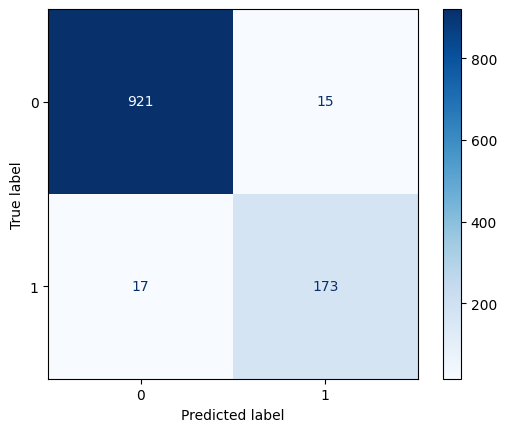

In [71]:
cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

#### Insights
##### Actual vs Predicted:

**1. Actual Non-Churn (0)**:

- Correctly Predicted as Non-Churn (TN): 921

- Wrongly Predicted as Churn (FP): 15

**2. Actual Churn (1)**:

- Correctly Predicted as Churn (TP): 173

- Wrongly Predicted as Non-Churn (FN): 17

* This Means:
    - Model is good at spotting Non-Churn customers (921 correct).
    - But misses 17 Churn cases (predicted as Non-Churn when they actually left).
    - 15 False Alarms (predicted as Churn but actually stayed).

### Feature Importance 

In [65]:
best_pipeline = randomcv.best_estimator_

feature_names = best_pipeline.named_steps['preprocessor'].get_feature_names_out()

mask = best_pipeline.named_steps['feature_selection'].get_support()

selected_features = feature_names[mask]

importances = best_pipeline.named_steps['classifier'].feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

display(feat_imp_df)

Feature  Importance
8                        Numerical 1__CashbackAmount        1161
1                       Numerical 1__WarehouseToHome         869
4           Numerical 1__OrderAmountHikeFromlastYear         697
0                                Numerical 1__Tenure         631
7                     Numerical 1__DaySinceLastOrder         513
22                  Categorical 3__SatisfactionScore         472
6                            Numerical 1__OrderCount         297
3              Numerical 1__NumberOfDeviceRegistered         250
23                           Categorical 4__CityTier         223
5                            Numerical 1__CouponUsed         187
11             Categorical 1__PreferredPaymentMode_2         164
20  Categorical 2__PreferredLoginDevice_Mobile Phone         158
15                    Categorical 1__MaritalStatus_0         156
17                   Categorical 1__CountOfAddress_0         154
21                        Categorical 2__Gender_Male         148
2                        Numerical 1__HourSpendOnApp         145
10             Categorical 1__PreferredPaymentMode_1         144
18                   Categorical 1__CountOfAddress_1         122
13                 Categorical 1__PreferedOrderCat_1         106
9              Categorical 1__PreferredPaymentMode_0         105
19                   Categorical 1__CountOfAddress_2          82
14                 Categorical 1__PreferedOrderCat_2          75
16                    Categorical 1__MaritalStatus_1          66
12                 Categorical 1__PreferedOrderCat_0          35

In [66]:
feat_imp_df.to_csv("feature_importance.csv", index=False)

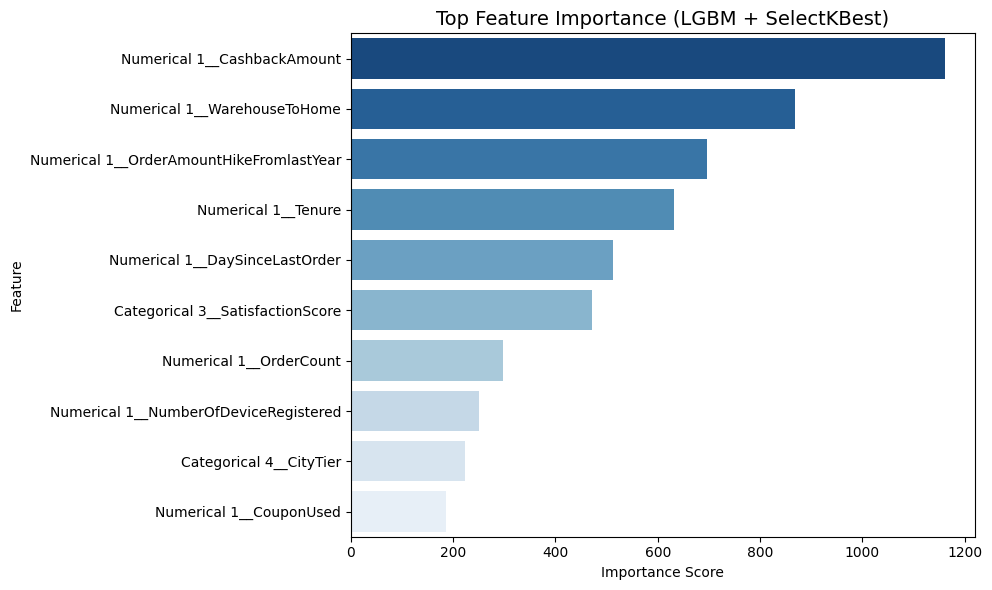

In [73]:
top_features = feat_imp_df.head(10) 

colors = sns.color_palette("Blues_r", n_colors=len(top_features))

# 3. Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_features,
    y='Feature',
    x='Importance',
    palette=colors, 
    edgecolor=None   
)

plt.title('Top Feature Importance (LGBM + SelectKBest)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### Insights from Feature Importance Analysis:
**1.Top Influential Features**:

- `CashbackAmount` (1161) is the most important feature, indicating that customers are highly sensitive to cashback offers. This suggests that financial incentives play a crucial role in customer behavior.

- `WarehouseToHome` (869) and `OrderAmountHikeFromlastYear` (697) are also significant, highlighting the importance of delivery efficiency and changes in spending habits.

**2.Customer Loyalty and Engagement**:

- `Tenure` (631) and `DaySinceLastOrder` (513) reflect customer retention and activity. Longer tenure and recent orders correlate strongly with positive outcomes, emphasizing the need to maintain engagement.

**3. Behavioral and Demographic Factors**:

- `SatisfactionScore` (472) and `CityTier` (223) show that customer satisfaction and location impact decisions. Urban customers (higher city tiers) may have different expectations.

- `Gender_Male` (148) and `MaritalStatus_0` (156) suggest demographic targeting could be refined, though their influence is moderate compared to numerical features.

**4. Less Impactful Features**:

- Payment modes, order categories (`PreferredOrderCat_0` at 35), and address counts have minimal impact. These may be deprioritized in model optimization or marketing strategies.

## Model Constraint

In [68]:
X_train.describe()

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
count  4284.000000      4302.000000     4300.000000               4504.000000   
mean     10.240896        15.650628        2.932791                  3.687611   
std       8.604949         8.435980        0.721448                  1.027651   
min       0.000000         5.000000        0.000000                  1.000000   
25%       2.000000         9.000000        2.000000                  3.000000   
50%       9.000000        14.000000        3.000000                  4.000000   
75%      16.000000        21.000000        3.000000                  4.000000   
max      61.000000       126.000000        5.000000                  6.000000   

       OrderAmountHikeFromlastYear   CouponUsed   OrderCount  \
count                  4294.000000  4297.000000  4293.000000   
mean                     15.730321     1.750524     3.012346   
std                       3.677030     1.889435     2.958487   
min                      11.000000     0.000000     1.000000   
25%                      13.000000     1.000000     1.000000   
50%                      15.000000     1.000000     2.000000   
75%                      18.000000     2.000000     3.000000   
max                      26.000000    16.000000    16.000000   

       DaySinceLastOrder  CashbackAmount  
count        4275.000000     4504.000000  
mean            4.559532      177.008357  
std             3.677754       49.140971  
min             0.000000        0.000000  
25%             2.000000      145.587500  
50%             3.000000      162.910000  
75%             7.000000      195.960000  
max            46.000000      324.990000

In [69]:
pd.set_option('display.max_colwidth', None)


columns = X_train.select_dtypes(exclude='number').columns
values = []
nunique_list = []
for i in columns:
    value = X_train[i].unique()
    nunique = X_train[i].nunique()
    nunique_list.append(nunique)
    values.append(value)

display(
    pd.DataFrame({
    "columns" : columns,
    "values" : values,
    "nunique": nunique_list
})
       )
pd.reset_option('display.max_colwidth')

columns  \
0  PreferredLoginDevice   
1              CityTier   
2  PreferredPaymentMode   
3                Gender   
4      PreferedOrderCat   
5     SatisfactionScore   
6         MaritalStatus   
7              Complain   
8        CountOfAddress   

                                                         values  nunique  
0                                      [Mobile Phone, Computer]        2  
1                                                     [1, 3, 2]        3  
2    [Debit Card, Credit Card, E wallet, Cash on Delivery, UPI]        5  
3                                                [Female, Male]        2  
4  [Mobile Phone, Laptop & Accessory, Grocery, Fashion, Others]        5  
5                                               [3, 4, 5, 1, 2]        5  
6                                   [Single, Married, Divorced]        3  
7                                                        [0, 1]        2  
8                                             [1–2, 3, 4–6, 7+]        4

#### **Numerical Features – Valid Value Ranges**

| Feature Name                    | Data Type | Min   | Max     |
|--------------------------------|-----------|-------|---------|
| `Tenure`                       | Integer   | 0     | 61      |
| `WarehouseToHome`              | Integer   | 5     | 126     |
| `HourSpendOnApp`               | Float     | 0.0   | 5.0     |
| `NumberOfDeviceRegistered`     | Integer   | 1     | 6       |
| `OrderAmountHikeFromlastYear`  | Integer   | 11    | 26      |
| `CouponUsed`                   | Integer   | 0     | 16      |
| `OrderCount`                   | Integer   | 1     | 16      |
| `DaySinceLastOrder`            | Integer   | 0     | 46      |
| `CashbackAmount`               | Float     | 0.00  | 324.99  |


#### **Categorical Features – Allowed Values**

| Feature Name            | Categories                                                                 |
|-------------------------|----------------------------------------------------------------------------|
| `PreferredLoginDevice`  | `Mobile Phone`, `Computer`                                                 |
| `CityTier`              | `1`, `2`, `3`                                                  |
| `PreferredPaymentMode`  | `Debit Card`, `Credit Card`, `E wallet`, `Cash on Delivery`, `UPI`         |
| `Gender`                | `Female`, `Male`                                                           |
| `PreferedOrderCat`      | `Mobile Phone`, `Laptop & Accessory`, `Grocery`, `Fashion`, `Others`       |
| `SatisfactionScore`     | `1`, `2`, `3`, `4`, `5`                                  |
| `MaritalStatus`         | `Single`, `Married`, `Divorced`                                           |
| `Complain`              | `0`, `1` *(0 = not complain, 1 = complain)*                             |
| `CountOfAddress`        | `1–2`, `3`, `4–6`, `7+` 


This model was developed and trained using historical data with the specific features listed above. **Each feature has a defined valid range (for numerical variables) or a fixed set of categories (for categorical variables)** based on the training dataset.

Therefore:

1. **If future data contains values outside of these ranges** or **new/unseen categories**, then:
  - The model may **fail to recognize or handle** those inputs properly.
  - Predictions may become **inaccurate or unreliable**.

2. To maintain reliable and consistent performance, it is crucial to:
  - **Ensure incoming data remains within the defined constraints**.
  - **Continuously monitor for distribution shifts or emerging values** in production data.
  - **Retrain or update the model** whenever significant deviations are observed.

In summary, **this model is not fully general-purpose**, and periodic updates or retraining will be necessary **if new patterns or values emerge in the future** that were not present during training.

## Conclusion and Recommendation

#### Conclusion
- This project successfully developed a robust and interpretable machine learning pipeline to predict customer churn in an e-commerce platform. By prioritizing the F2 Score, the modeling process emphasized minimizing false negatives, a critical factor for ensuring high-risk customers are not overlooked. The final model, a **LightGBM classifier** combined with **Median Imputer**, **SelectKBest** `k=24` feature selection, and **RandomOverSampler**, demonstrated outstanding performance with a **91% F2 Score** on the test set. This configuration not only delivered high predictive power but also showed stable results across folds and superior computational efficiency, making it suitable for future deployment and retraining.
- Key drivers of churn include financial incentives, behavioral patterns, and demographic factors. Customers with **low cashback received**, **short tenure**, or who have recently **lodged complaints** are **significantly more likely to churn**. Interestingly, even customers reporting very high satisfaction scores (score of 5) exhibit elevated churn rates—potentially **indicating a mismatch** between satisfaction and loyalty. Additionally, churn is more prevalent among customers from lower-tier cities, highlighting geographic and service-level disparities that may affect churn.
- Overall, this predictive model equips the **Customer Marketing Team** with the ability to proactively identify and engage high-risk customers. By leveraging both machine learning predictions and feature importance insights, the company can optimize retention campaigns, reduce marketing waste, and improve long-term customer loyalty.

#### Business Recommendation 

**1. CashbackAmount**
- **Insight**: This is the most influential feature in the model. Retained customers consistently receive more cashback compared to those who churn.
- **Reasoning**: Cashback acts as a financial incentive that strengthens customer retention. Churned customers tend to have shorter tenure and longer time since last order, suggesting they did not experience enough value early in the customer journey.
- **Recommendation**:
  - Introduce targeted cashback programs for new users or high-risk customers with low tenure.
  - Implement tiered cashback schemes to reward loyalty and encourage repeat purchases.

**2. WarehouseToHome**
- **Insight**: Customers located farther from the warehouse show a slightly higher churn rate.
- **Reasoning**: Longer delivery distances may result in slower fulfillment and reduced satisfaction, especially in more remote areas.
- **Recommendation**:
  - Offer free shipping or delivery discounts for customers beyond a certain distance threshold.
  - Optimize logistics for Tier 3 cities or remote locations to reduce churn caused by fulfillment delays.

**3. Satisfaction Score**
- **Insight**:
Surprisingly, customers with the highest satisfaction scores (score of 5) churn more frequently than those with lower scores.
**Reasoning**:
This counterintuitive pattern may be attributed to:
  - Survey bias, such as default 5-star submissions without genuine feedback.
  - Bot-generated reviews or vendor manipulation, where sellers may inflate ratings to appear credible while providing subpar service.
  - Data quality issues, including mislabeling, outdated records, or inconsistencies between satisfaction data and churn labels.
- **Recommendation**:
  - Conduct a qualitative audit on high-satisfaction churners to investigate signs of fraudulent behavior or data entry automation.
  - Evaluate whether certain vendors exploit the rating system for visibility while causing customer churn.
  - Reassess the current satisfaction scoring system’s validity and granularity—consider adopting a more robust approach like a multi-question NPS or post-interaction feedback surveys.

**4. Order Count**
- **Insight**: Churned customers generally have fewer repeat orders, especially in high-value categories like mobile phones.
- **Reasoning**: Low order count reflects limited engagement and a higher likelihood of one-time use behavior.
- **Recommendation**:
  - Target low-order customers with personalized reminders, post-purchase surveys, or "win-back" offers.
  - Set thresholds (e.g., <2 orders in 60 days) to activate churn prevention campaigns.

**5. Complain**
- **Insight**: Customers who file complaints show a noticeably elevated churn tendency.
- **Reasoning**: Complaint submission indicates a friction point or dissatisfaction moment that wasn't resolved effectively.
- **Recommendation**:
  - Enhance complaint resolution speed and track post-resolution satisfaction.
  - Audit complaint types to find UI/UX or product-level pain points and fix root causes.
  - Reward feedback with discount vouchers or service upgrades to rebuild trust.

#### Model Recommendations
To ensure long-term model effectiveness and business adaptability, the following recommendations are proposed:

**1. Regular Monitoring of Model Performance** 
- Continuously track performance metrics—especially the F2 Score and False Negative Rate—to ensure the model still captures churn risk accurately. High false negatives may lead to lost opportunities in retaining valuable customers.

**2. Set a periodic model evaluation schedule**
- If the model’s predictive power significantly drops or business dynamics shift (e.g., new customer behavior trends, product updates), retrain or update the model using the latest data.

**3. Implement a Feedback Loop**
- Establish a feedback system where actual churn outcomes are fed back into the system. This allows for incremental learning or model fine-tuning based on real-world results.

**4. Build a Versioning System**
- Maintain version control of different model iterations to compare performance over time and ensure traceability.

### Save Model

In [70]:
model_filename = "final_tuned_lightgbm_ros_selectkbest.pkl"

with open(model_filename, "wb") as file:
    pickle.dump(randomcv.best_estimator_, file)

print(f"Model saved to {model_filename}")

Model saved to final_tuned_lightgbm_ros_selectkbest.pkl
